# Capstone 1-9 In Work

- Capstone 1-9: Final version
- Capstone 1-8: borro lo que no necesito
- Capstone 1-7 a partir del anterior
- Capstone 1-6-2 copiado de ibm ndpy
- Capstone 1-5 (from ffy). Guardado como versión
- Capstone 1-4
- Capstone 1-3

combinación de Casptone 1-2 (borrado) y Capstone 1 (ffy)
Casptone 1-2; Capstone1 (ndpy) y Capstone 1 (ffy)

Problema de configuración de memoria

Problema(x): Hay que aumentar la spark.rpc.message.maxSize <br>
[Crear DF] (#CrearPdDf) <br>
[Another Cell](#another_cell)<br>
[escribirDatosEnCloud](#escribirDatosEnCloud) <br>
[Leer datos IBM](#LeerDatosEnCloud)<br>
- Modificar tamaño spark.rpc.message.maxSize
    - Descargar datos de NASA y descomprimir
    - Crear un dataframe
    - Convertirlo en spark y guardarlo en ibmCloud
    - [] Cargar datos desde iCloud
    - [] Analizar
    - [] Extraer info

## Starting

In [1]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext()
#spark=pyspark.sql.SparkSession(sc)
spark = pyspark.sql.SparkSession.builder.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [2]:
#Import data
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
#import ibmos2spark
import shutil
# Analisis de datos
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.fft import fft, ifft
from datetime import time, tzinfo, timedelta
import os

In [ ]:
spark.stop()
sc.stop()


## Load dataset from internet

In [2]:
!wget https://ti.arc.nasa.gov/c/18
    #Importante: https://ti.arc.nasa.gov/c/18/ => no funciona por la barra final

--2020-01-24 15:01:42--  https://ti.arc.nasa.gov/c/18
Resolving ti.arc.nasa.gov (ti.arc.nasa.gov)... 128.102.105.66, 2001:4d0:6311:2227:14b6:372b:2078:2a94
Connecting to ti.arc.nasa.gov (ti.arc.nasa.gov)|128.102.105.66|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://ti.arc.nasa.gov/c/18/ [following]
--2020-01-24 15:01:43--  https://ti.arc.nasa.gov/c/18/
Reusing existing connection to ti.arc.nasa.gov:443.
HTTP request sent, awaiting response... 302 FOUND
Location: https://ti.arc.nasa.gov/m/project/prognostic-repository/FEMTOBearingDataSet.zip [following]
--2020-01-24 15:01:43--  https://ti.arc.nasa.gov/m/project/prognostic-repository/FEMTOBearingDataSet.zip
Reusing existing connection to ti.arc.nasa.gov:443.
HTTP request sent, awaiting response... 200 OK
Length: 1156828748 (1.1G) [application/zip]
Saving to: '18'

100%[====================================>] 1,156,828,748 61.0MB/s   in 40s    

2020-01-24 15:02:24 (27.3 MB/s) - '18' saved [115682874

In [3]:
!ls
!unzip 18

18  conda  logs  spark-events  user-libs
Archive:  18
  inflating: Test_set.zip            
  inflating: Training_set.zip        
  inflating: Validation_Set.zip      


In [6]:
!ls

Caps 1.ipynb
Capstone 1-8.ipynb
Capstone 2-2.ipynb
Capstone 2-3.ipynb
Capstone 2-4.ipynb
Capstone 3-4-1.ipynb
Capstone 3-4-2.ipynb
Capstone 3-4-3 Autoencoder.ipynb
Capstone PHM2012.ipynb
Capstone_1-7.ipynb
DCOILBRENTEU.csv
DSP - Conceptos básicos y pruebas.ipynb
Ejemplos MatLab.ipynb
Ejemplos matLab 3 - Kurtogram.ipynb
EjemplosMatLab2.ipynb
FEMTOBearingDataSet
Ibm ndpy
Kurtogram - MatLab.ipynb
Kurtogram.ipynb
LSTM Prediction.ipynb
Plantillas - Mapas de calor.ipynb
PySpark.ipynb
Untitled.ipynb
Untitled.ipynb copia
Untitled2.ipynb
Usando PySpark en iMac.ipynb
Waveloc.ipynb
__pycache__
b11b12_2_nnorm
b13.parquet
b13a.parquet
b14.parquet
b14a.parquet
b15.parquet
b15a.parquet
b16.parquet
b16a.parquet
b17.parquet
b17a.parquet
b23.parquet
b23a.parquet
b24.parquet
b24a.parquet
b25.parquet
b25a.parquet
b26.parquet
b26a.parquet
b27.parquet
b27a.parquet
b33.parquet
b33a.parquet
eggs.csv
eggs2.csv
energy.parquet
energy2.parquet
energy3.parquet
energy4.parquet
energy4Parquet.parquet
energyParquet_

In [5]:
#Unzip files:
#!unzip 18
!unzip Test_set.zip
!unzip Training_set.zip

Archive:  Training_set.zip
   creating: Learning_set/
   creating: Learning_set/Bearing1_1/
  inflating: Learning_set/Bearing1_1/acc_00001.csv  
  inflating: Learning_set/Bearing1_1/acc_00002.csv  
  inflating: Learning_set/Bearing1_1/acc_00003.csv  
  inflating: Learning_set/Bearing1_1/acc_00004.csv  
  inflating: Learning_set/Bearing1_1/acc_00005.csv  
  inflating: Learning_set/Bearing1_1/acc_00006.csv  
  inflating: Learning_set/Bearing1_1/acc_00007.csv  
  inflating: Learning_set/Bearing1_1/acc_00008.csv  
  inflating: Learning_set/Bearing1_1/acc_00009.csv  
  inflating: Learning_set/Bearing1_1/acc_00010.csv  
  inflating: Learning_set/Bearing1_1/acc_00011.csv  
  inflating: Learning_set/Bearing1_1/acc_00012.csv  
  inflating: Learning_set/Bearing1_1/acc_00013.csv  
  inflating: Learning_set/Bearing1_1/acc_00014.csv  
  inflating: Learning_set/Bearing1_1/acc_00015.csv  
  inflating: Learning_set/Bearing1_1/acc_00016.csv  
  inflating: Learning_set/Bearing1_1/acc_00017.csv  
  infla

  inflating: Learning_set/Bearing1_1/acc_00156.csv  
  inflating: Learning_set/Bearing1_1/acc_00157.csv  
  inflating: Learning_set/Bearing1_1/acc_00158.csv  
  inflating: Learning_set/Bearing1_1/acc_00159.csv  
  inflating: Learning_set/Bearing1_1/acc_00160.csv  
  inflating: Learning_set/Bearing1_1/acc_00161.csv  
  inflating: Learning_set/Bearing1_1/acc_00162.csv  
  inflating: Learning_set/Bearing1_1/acc_00163.csv  
  inflating: Learning_set/Bearing1_1/acc_00164.csv  
  inflating: Learning_set/Bearing1_1/acc_00165.csv  
  inflating: Learning_set/Bearing1_1/acc_00166.csv  
  inflating: Learning_set/Bearing1_1/acc_00167.csv  
  inflating: Learning_set/Bearing1_1/acc_00168.csv  
  inflating: Learning_set/Bearing1_1/acc_00169.csv  
  inflating: Learning_set/Bearing1_1/acc_00170.csv  
  inflating: Learning_set/Bearing1_1/acc_00171.csv  
  inflating: Learning_set/Bearing1_1/acc_00172.csv  
  inflating: Learning_set/Bearing1_1/acc_00173.csv  
  inflating: Learning_set/Bearing1_1/acc_00174

  inflating: Learning_set/Bearing1_1/acc_00314.csv  
  inflating: Learning_set/Bearing1_1/acc_00315.csv  
  inflating: Learning_set/Bearing1_1/acc_00316.csv  
  inflating: Learning_set/Bearing1_1/acc_00317.csv  
  inflating: Learning_set/Bearing1_1/acc_00318.csv  
  inflating: Learning_set/Bearing1_1/acc_00319.csv  
  inflating: Learning_set/Bearing1_1/acc_00320.csv  
  inflating: Learning_set/Bearing1_1/acc_00321.csv  
  inflating: Learning_set/Bearing1_1/acc_00322.csv  
  inflating: Learning_set/Bearing1_1/acc_00323.csv  
  inflating: Learning_set/Bearing1_1/acc_00324.csv  
  inflating: Learning_set/Bearing1_1/acc_00325.csv  
  inflating: Learning_set/Bearing1_1/acc_00326.csv  
  inflating: Learning_set/Bearing1_1/acc_00327.csv  
  inflating: Learning_set/Bearing1_1/acc_00328.csv  
  inflating: Learning_set/Bearing1_1/acc_00329.csv  
  inflating: Learning_set/Bearing1_1/acc_00330.csv  
  inflating: Learning_set/Bearing1_1/acc_00331.csv  
  inflating: Learning_set/Bearing1_1/acc_00332

  inflating: Learning_set/Bearing1_1/acc_00474.csv  
  inflating: Learning_set/Bearing1_1/acc_00475.csv  
  inflating: Learning_set/Bearing1_1/acc_00476.csv  
  inflating: Learning_set/Bearing1_1/acc_00477.csv  
  inflating: Learning_set/Bearing1_1/acc_00478.csv  
  inflating: Learning_set/Bearing1_1/acc_00479.csv  
  inflating: Learning_set/Bearing1_1/acc_00480.csv  
  inflating: Learning_set/Bearing1_1/acc_00481.csv  
  inflating: Learning_set/Bearing1_1/acc_00482.csv  
  inflating: Learning_set/Bearing1_1/acc_00483.csv  
  inflating: Learning_set/Bearing1_1/acc_00484.csv  
  inflating: Learning_set/Bearing1_1/acc_00485.csv  
  inflating: Learning_set/Bearing1_1/acc_00486.csv  
  inflating: Learning_set/Bearing1_1/acc_00487.csv  
  inflating: Learning_set/Bearing1_1/acc_00488.csv  
  inflating: Learning_set/Bearing1_1/acc_00489.csv  
  inflating: Learning_set/Bearing1_1/acc_00490.csv  
  inflating: Learning_set/Bearing1_1/acc_00491.csv  
  inflating: Learning_set/Bearing1_1/acc_00492

  inflating: Learning_set/Bearing1_1/acc_00633.csv  
  inflating: Learning_set/Bearing1_1/acc_00634.csv  
  inflating: Learning_set/Bearing1_1/acc_00635.csv  
  inflating: Learning_set/Bearing1_1/acc_00636.csv  
  inflating: Learning_set/Bearing1_1/acc_00637.csv  
  inflating: Learning_set/Bearing1_1/acc_00638.csv  
  inflating: Learning_set/Bearing1_1/acc_00639.csv  
  inflating: Learning_set/Bearing1_1/acc_00640.csv  
  inflating: Learning_set/Bearing1_1/acc_00641.csv  
  inflating: Learning_set/Bearing1_1/acc_00642.csv  
  inflating: Learning_set/Bearing1_1/acc_00643.csv  
  inflating: Learning_set/Bearing1_1/acc_00644.csv  
  inflating: Learning_set/Bearing1_1/acc_00645.csv  
  inflating: Learning_set/Bearing1_1/acc_00646.csv  
  inflating: Learning_set/Bearing1_1/acc_00647.csv  
  inflating: Learning_set/Bearing1_1/acc_00648.csv  
  inflating: Learning_set/Bearing1_1/acc_00649.csv  
  inflating: Learning_set/Bearing1_1/acc_00650.csv  
  inflating: Learning_set/Bearing1_1/acc_00651

  inflating: Learning_set/Bearing1_1/acc_00794.csv  
  inflating: Learning_set/Bearing1_1/acc_00795.csv  
  inflating: Learning_set/Bearing1_1/acc_00796.csv  
  inflating: Learning_set/Bearing1_1/acc_00797.csv  
  inflating: Learning_set/Bearing1_1/acc_00798.csv  
  inflating: Learning_set/Bearing1_1/acc_00799.csv  
  inflating: Learning_set/Bearing1_1/acc_00800.csv  
  inflating: Learning_set/Bearing1_1/acc_00801.csv  
  inflating: Learning_set/Bearing1_1/acc_00802.csv  
  inflating: Learning_set/Bearing1_1/acc_00803.csv  
  inflating: Learning_set/Bearing1_1/acc_00804.csv  
  inflating: Learning_set/Bearing1_1/acc_00805.csv  
  inflating: Learning_set/Bearing1_1/acc_00806.csv  
  inflating: Learning_set/Bearing1_1/acc_00807.csv  
  inflating: Learning_set/Bearing1_1/acc_00808.csv  
  inflating: Learning_set/Bearing1_1/acc_00809.csv  
  inflating: Learning_set/Bearing1_1/acc_00810.csv  
  inflating: Learning_set/Bearing1_1/acc_00811.csv  
  inflating: Learning_set/Bearing1_1/acc_00812

  inflating: Learning_set/Bearing1_1/acc_00951.csv  
  inflating: Learning_set/Bearing1_1/acc_00952.csv  
  inflating: Learning_set/Bearing1_1/acc_00953.csv  
  inflating: Learning_set/Bearing1_1/acc_00954.csv  
  inflating: Learning_set/Bearing1_1/acc_00955.csv  
  inflating: Learning_set/Bearing1_1/acc_00956.csv  
  inflating: Learning_set/Bearing1_1/acc_00957.csv  
  inflating: Learning_set/Bearing1_1/acc_00958.csv  
  inflating: Learning_set/Bearing1_1/acc_00959.csv  
  inflating: Learning_set/Bearing1_1/acc_00960.csv  
  inflating: Learning_set/Bearing1_1/acc_00961.csv  
  inflating: Learning_set/Bearing1_1/acc_00962.csv  
  inflating: Learning_set/Bearing1_1/acc_00963.csv  
  inflating: Learning_set/Bearing1_1/acc_00964.csv  
  inflating: Learning_set/Bearing1_1/acc_00965.csv  
  inflating: Learning_set/Bearing1_1/acc_00966.csv  
  inflating: Learning_set/Bearing1_1/acc_00967.csv  
  inflating: Learning_set/Bearing1_1/acc_00968.csv  
  inflating: Learning_set/Bearing1_1/acc_00969

  inflating: Learning_set/Bearing1_1/acc_01110.csv  
  inflating: Learning_set/Bearing1_1/acc_01111.csv  
  inflating: Learning_set/Bearing1_1/acc_01112.csv  
  inflating: Learning_set/Bearing1_1/acc_01113.csv  
  inflating: Learning_set/Bearing1_1/acc_01114.csv  
  inflating: Learning_set/Bearing1_1/acc_01115.csv  
  inflating: Learning_set/Bearing1_1/acc_01116.csv  
  inflating: Learning_set/Bearing1_1/acc_01117.csv  
  inflating: Learning_set/Bearing1_1/acc_01118.csv  
  inflating: Learning_set/Bearing1_1/acc_01119.csv  
  inflating: Learning_set/Bearing1_1/acc_01120.csv  
  inflating: Learning_set/Bearing1_1/acc_01121.csv  
  inflating: Learning_set/Bearing1_1/acc_01122.csv  
  inflating: Learning_set/Bearing1_1/acc_01123.csv  
  inflating: Learning_set/Bearing1_1/acc_01124.csv  
  inflating: Learning_set/Bearing1_1/acc_01125.csv  
  inflating: Learning_set/Bearing1_1/acc_01126.csv  
  inflating: Learning_set/Bearing1_1/acc_01127.csv  
  inflating: Learning_set/Bearing1_1/acc_01128

  inflating: Learning_set/Bearing1_1/acc_01267.csv  
  inflating: Learning_set/Bearing1_1/acc_01268.csv  
  inflating: Learning_set/Bearing1_1/acc_01269.csv  
  inflating: Learning_set/Bearing1_1/acc_01270.csv  
  inflating: Learning_set/Bearing1_1/acc_01271.csv  
  inflating: Learning_set/Bearing1_1/acc_01272.csv  
  inflating: Learning_set/Bearing1_1/acc_01273.csv  
  inflating: Learning_set/Bearing1_1/acc_01274.csv  
  inflating: Learning_set/Bearing1_1/acc_01275.csv  
  inflating: Learning_set/Bearing1_1/acc_01276.csv  
  inflating: Learning_set/Bearing1_1/acc_01277.csv  
  inflating: Learning_set/Bearing1_1/acc_01278.csv  
  inflating: Learning_set/Bearing1_1/acc_01279.csv  
  inflating: Learning_set/Bearing1_1/acc_01280.csv  
  inflating: Learning_set/Bearing1_1/acc_01281.csv  
  inflating: Learning_set/Bearing1_1/acc_01282.csv  
  inflating: Learning_set/Bearing1_1/acc_01283.csv  
  inflating: Learning_set/Bearing1_1/acc_01284.csv  
  inflating: Learning_set/Bearing1_1/acc_01285

  inflating: Learning_set/Bearing1_1/acc_01426.csv  
  inflating: Learning_set/Bearing1_1/acc_01427.csv  
  inflating: Learning_set/Bearing1_1/acc_01428.csv  
  inflating: Learning_set/Bearing1_1/acc_01429.csv  
  inflating: Learning_set/Bearing1_1/acc_01430.csv  
  inflating: Learning_set/Bearing1_1/acc_01431.csv  
  inflating: Learning_set/Bearing1_1/acc_01432.csv  
  inflating: Learning_set/Bearing1_1/acc_01433.csv  
  inflating: Learning_set/Bearing1_1/acc_01434.csv  
  inflating: Learning_set/Bearing1_1/acc_01435.csv  
  inflating: Learning_set/Bearing1_1/acc_01436.csv  
  inflating: Learning_set/Bearing1_1/acc_01437.csv  
  inflating: Learning_set/Bearing1_1/acc_01438.csv  
  inflating: Learning_set/Bearing1_1/acc_01439.csv  
  inflating: Learning_set/Bearing1_1/acc_01440.csv  
  inflating: Learning_set/Bearing1_1/acc_01441.csv  
  inflating: Learning_set/Bearing1_1/acc_01442.csv  
  inflating: Learning_set/Bearing1_1/acc_01443.csv  
  inflating: Learning_set/Bearing1_1/acc_01444

  inflating: Learning_set/Bearing1_1/acc_01586.csv  
  inflating: Learning_set/Bearing1_1/acc_01587.csv  
  inflating: Learning_set/Bearing1_1/acc_01588.csv  
  inflating: Learning_set/Bearing1_1/acc_01589.csv  
  inflating: Learning_set/Bearing1_1/acc_01590.csv  
  inflating: Learning_set/Bearing1_1/acc_01591.csv  
  inflating: Learning_set/Bearing1_1/acc_01592.csv  
  inflating: Learning_set/Bearing1_1/acc_01593.csv  
  inflating: Learning_set/Bearing1_1/acc_01594.csv  
  inflating: Learning_set/Bearing1_1/acc_01595.csv  
  inflating: Learning_set/Bearing1_1/acc_01596.csv  
  inflating: Learning_set/Bearing1_1/acc_01597.csv  
  inflating: Learning_set/Bearing1_1/acc_01598.csv  
  inflating: Learning_set/Bearing1_1/acc_01599.csv  
  inflating: Learning_set/Bearing1_1/acc_01600.csv  
  inflating: Learning_set/Bearing1_1/acc_01601.csv  
  inflating: Learning_set/Bearing1_1/acc_01602.csv  
  inflating: Learning_set/Bearing1_1/acc_01603.csv  
  inflating: Learning_set/Bearing1_1/acc_01604

  inflating: Learning_set/Bearing1_1/acc_01741.csv  
  inflating: Learning_set/Bearing1_1/acc_01742.csv  
  inflating: Learning_set/Bearing1_1/acc_01743.csv  
  inflating: Learning_set/Bearing1_1/acc_01744.csv  
  inflating: Learning_set/Bearing1_1/acc_01745.csv  
  inflating: Learning_set/Bearing1_1/acc_01746.csv  
  inflating: Learning_set/Bearing1_1/acc_01747.csv  
  inflating: Learning_set/Bearing1_1/acc_01748.csv  
  inflating: Learning_set/Bearing1_1/acc_01749.csv  
  inflating: Learning_set/Bearing1_1/acc_01750.csv  
  inflating: Learning_set/Bearing1_1/acc_01751.csv  
  inflating: Learning_set/Bearing1_1/acc_01752.csv  
  inflating: Learning_set/Bearing1_1/acc_01753.csv  
  inflating: Learning_set/Bearing1_1/acc_01754.csv  
  inflating: Learning_set/Bearing1_1/acc_01755.csv  
  inflating: Learning_set/Bearing1_1/acc_01756.csv  
  inflating: Learning_set/Bearing1_1/acc_01757.csv  
  inflating: Learning_set/Bearing1_1/acc_01758.csv  
  inflating: Learning_set/Bearing1_1/acc_01759

  inflating: Learning_set/Bearing1_1/acc_01901.csv  
  inflating: Learning_set/Bearing1_1/acc_01902.csv  
  inflating: Learning_set/Bearing1_1/acc_01903.csv  
  inflating: Learning_set/Bearing1_1/acc_01904.csv  
  inflating: Learning_set/Bearing1_1/acc_01905.csv  
  inflating: Learning_set/Bearing1_1/acc_01906.csv  
  inflating: Learning_set/Bearing1_1/acc_01907.csv  
  inflating: Learning_set/Bearing1_1/acc_01908.csv  
  inflating: Learning_set/Bearing1_1/acc_01909.csv  
  inflating: Learning_set/Bearing1_1/acc_01910.csv  
  inflating: Learning_set/Bearing1_1/acc_01911.csv  
  inflating: Learning_set/Bearing1_1/acc_01912.csv  
  inflating: Learning_set/Bearing1_1/acc_01913.csv  
  inflating: Learning_set/Bearing1_1/acc_01914.csv  
  inflating: Learning_set/Bearing1_1/acc_01915.csv  
  inflating: Learning_set/Bearing1_1/acc_01916.csv  
  inflating: Learning_set/Bearing1_1/acc_01917.csv  
  inflating: Learning_set/Bearing1_1/acc_01918.csv  
  inflating: Learning_set/Bearing1_1/acc_01919

  inflating: Learning_set/Bearing1_1/acc_02057.csv  
  inflating: Learning_set/Bearing1_1/acc_02058.csv  
  inflating: Learning_set/Bearing1_1/acc_02059.csv  
  inflating: Learning_set/Bearing1_1/acc_02060.csv  
  inflating: Learning_set/Bearing1_1/acc_02061.csv  
  inflating: Learning_set/Bearing1_1/acc_02062.csv  
  inflating: Learning_set/Bearing1_1/acc_02063.csv  
  inflating: Learning_set/Bearing1_1/acc_02064.csv  
  inflating: Learning_set/Bearing1_1/acc_02065.csv  
  inflating: Learning_set/Bearing1_1/acc_02066.csv  
  inflating: Learning_set/Bearing1_1/acc_02067.csv  
  inflating: Learning_set/Bearing1_1/acc_02068.csv  
  inflating: Learning_set/Bearing1_1/acc_02069.csv  
  inflating: Learning_set/Bearing1_1/acc_02070.csv  
  inflating: Learning_set/Bearing1_1/acc_02071.csv  
  inflating: Learning_set/Bearing1_1/acc_02072.csv  
  inflating: Learning_set/Bearing1_1/acc_02073.csv  
  inflating: Learning_set/Bearing1_1/acc_02074.csv  
  inflating: Learning_set/Bearing1_1/acc_02075

  inflating: Learning_set/Bearing1_1/acc_02213.csv  
  inflating: Learning_set/Bearing1_1/acc_02214.csv  
  inflating: Learning_set/Bearing1_1/acc_02215.csv  
  inflating: Learning_set/Bearing1_1/acc_02216.csv  
  inflating: Learning_set/Bearing1_1/acc_02217.csv  
  inflating: Learning_set/Bearing1_1/acc_02218.csv  
  inflating: Learning_set/Bearing1_1/acc_02219.csv  
  inflating: Learning_set/Bearing1_1/acc_02220.csv  
  inflating: Learning_set/Bearing1_1/acc_02221.csv  
  inflating: Learning_set/Bearing1_1/acc_02222.csv  
  inflating: Learning_set/Bearing1_1/acc_02223.csv  
  inflating: Learning_set/Bearing1_1/acc_02224.csv  
  inflating: Learning_set/Bearing1_1/acc_02225.csv  
  inflating: Learning_set/Bearing1_1/acc_02226.csv  
  inflating: Learning_set/Bearing1_1/acc_02227.csv  
  inflating: Learning_set/Bearing1_1/acc_02228.csv  
  inflating: Learning_set/Bearing1_1/acc_02229.csv  
  inflating: Learning_set/Bearing1_1/acc_02230.csv  
  inflating: Learning_set/Bearing1_1/acc_02231

  inflating: Learning_set/Bearing1_1/acc_02373.csv  
  inflating: Learning_set/Bearing1_1/acc_02374.csv  
  inflating: Learning_set/Bearing1_1/acc_02375.csv  
  inflating: Learning_set/Bearing1_1/acc_02376.csv  
  inflating: Learning_set/Bearing1_1/acc_02377.csv  
  inflating: Learning_set/Bearing1_1/acc_02378.csv  
  inflating: Learning_set/Bearing1_1/acc_02379.csv  
  inflating: Learning_set/Bearing1_1/acc_02380.csv  
  inflating: Learning_set/Bearing1_1/acc_02381.csv  
  inflating: Learning_set/Bearing1_1/acc_02382.csv  
  inflating: Learning_set/Bearing1_1/acc_02383.csv  
  inflating: Learning_set/Bearing1_1/acc_02384.csv  
  inflating: Learning_set/Bearing1_1/acc_02385.csv  
  inflating: Learning_set/Bearing1_1/acc_02386.csv  
  inflating: Learning_set/Bearing1_1/acc_02387.csv  
  inflating: Learning_set/Bearing1_1/acc_02388.csv  
  inflating: Learning_set/Bearing1_1/acc_02389.csv  
  inflating: Learning_set/Bearing1_1/acc_02390.csv  
  inflating: Learning_set/Bearing1_1/acc_02391

  inflating: Learning_set/Bearing1_1/acc_02533.csv  
  inflating: Learning_set/Bearing1_1/acc_02534.csv  
  inflating: Learning_set/Bearing1_1/acc_02535.csv  
  inflating: Learning_set/Bearing1_1/acc_02536.csv  
  inflating: Learning_set/Bearing1_1/acc_02537.csv  
  inflating: Learning_set/Bearing1_1/acc_02538.csv  
  inflating: Learning_set/Bearing1_1/acc_02539.csv  
  inflating: Learning_set/Bearing1_1/acc_02540.csv  
  inflating: Learning_set/Bearing1_1/acc_02541.csv  
  inflating: Learning_set/Bearing1_1/acc_02542.csv  
  inflating: Learning_set/Bearing1_1/acc_02543.csv  
  inflating: Learning_set/Bearing1_1/acc_02544.csv  
  inflating: Learning_set/Bearing1_1/acc_02545.csv  
  inflating: Learning_set/Bearing1_1/acc_02546.csv  
  inflating: Learning_set/Bearing1_1/acc_02547.csv  
  inflating: Learning_set/Bearing1_1/acc_02548.csv  
  inflating: Learning_set/Bearing1_1/acc_02549.csv  
  inflating: Learning_set/Bearing1_1/acc_02550.csv  
  inflating: Learning_set/Bearing1_1/acc_02551

  inflating: Learning_set/Bearing1_1/temp_00044.csv  
  inflating: Learning_set/Bearing1_1/temp_00045.csv  
  inflating: Learning_set/Bearing1_1/temp_00046.csv  
  inflating: Learning_set/Bearing1_1/temp_00047.csv  
  inflating: Learning_set/Bearing1_1/temp_00048.csv  
  inflating: Learning_set/Bearing1_1/temp_00049.csv  
  inflating: Learning_set/Bearing1_1/temp_00050.csv  
  inflating: Learning_set/Bearing1_1/temp_00051.csv  
  inflating: Learning_set/Bearing1_1/temp_00052.csv  
  inflating: Learning_set/Bearing1_1/temp_00053.csv  
  inflating: Learning_set/Bearing1_1/temp_00054.csv  
  inflating: Learning_set/Bearing1_1/temp_00055.csv  
  inflating: Learning_set/Bearing1_1/temp_00056.csv  
  inflating: Learning_set/Bearing1_1/temp_00057.csv  
  inflating: Learning_set/Bearing1_1/temp_00058.csv  
  inflating: Learning_set/Bearing1_1/temp_00059.csv  
  inflating: Learning_set/Bearing1_1/temp_00060.csv  
  inflating: Learning_set/Bearing1_1/temp_00061.csv  
  inflating: Learning_set/Be

  inflating: Learning_set/Bearing1_1/temp_00203.csv  
  inflating: Learning_set/Bearing1_1/temp_00204.csv  
  inflating: Learning_set/Bearing1_1/temp_00205.csv  
  inflating: Learning_set/Bearing1_1/temp_00206.csv  
  inflating: Learning_set/Bearing1_1/temp_00207.csv  
  inflating: Learning_set/Bearing1_1/temp_00208.csv  
  inflating: Learning_set/Bearing1_1/temp_00209.csv  
  inflating: Learning_set/Bearing1_1/temp_00210.csv  
  inflating: Learning_set/Bearing1_1/temp_00211.csv  
  inflating: Learning_set/Bearing1_1/temp_00212.csv  
  inflating: Learning_set/Bearing1_1/temp_00213.csv  
  inflating: Learning_set/Bearing1_1/temp_00214.csv  
  inflating: Learning_set/Bearing1_1/temp_00215.csv  
  inflating: Learning_set/Bearing1_1/temp_00216.csv  
  inflating: Learning_set/Bearing1_1/temp_00217.csv  
  inflating: Learning_set/Bearing1_1/temp_00218.csv  
  inflating: Learning_set/Bearing1_1/temp_00219.csv  
  inflating: Learning_set/Bearing1_1/temp_00220.csv  
  inflating: Learning_set/Be

  inflating: Learning_set/Bearing1_1/temp_00358.csv  
  inflating: Learning_set/Bearing1_1/temp_00359.csv  
  inflating: Learning_set/Bearing1_1/temp_00360.csv  
  inflating: Learning_set/Bearing1_1/temp_00361.csv  
  inflating: Learning_set/Bearing1_1/temp_00362.csv  
  inflating: Learning_set/Bearing1_1/temp_00363.csv  
  inflating: Learning_set/Bearing1_1/temp_00364.csv  
  inflating: Learning_set/Bearing1_1/temp_00365.csv  
  inflating: Learning_set/Bearing1_1/temp_00366.csv  
  inflating: Learning_set/Bearing1_1/temp_00367.csv  
  inflating: Learning_set/Bearing1_1/temp_00368.csv  
  inflating: Learning_set/Bearing1_1/temp_00369.csv  
  inflating: Learning_set/Bearing1_1/temp_00370.csv  
  inflating: Learning_set/Bearing1_1/temp_00371.csv  
  inflating: Learning_set/Bearing1_1/temp_00372.csv  
  inflating: Learning_set/Bearing1_1/temp_00373.csv  
  inflating: Learning_set/Bearing1_1/temp_00374.csv  
  inflating: Learning_set/Bearing1_1/temp_00375.csv  
  inflating: Learning_set/Be

  inflating: Learning_set/Bearing1_2/acc_00046.csv  
  inflating: Learning_set/Bearing1_2/acc_00047.csv  
  inflating: Learning_set/Bearing1_2/acc_00048.csv  
  inflating: Learning_set/Bearing1_2/acc_00049.csv  
  inflating: Learning_set/Bearing1_2/acc_00050.csv  
  inflating: Learning_set/Bearing1_2/acc_00051.csv  
  inflating: Learning_set/Bearing1_2/acc_00052.csv  
  inflating: Learning_set/Bearing1_2/acc_00053.csv  
  inflating: Learning_set/Bearing1_2/acc_00054.csv  
  inflating: Learning_set/Bearing1_2/acc_00055.csv  
  inflating: Learning_set/Bearing1_2/acc_00056.csv  
  inflating: Learning_set/Bearing1_2/acc_00057.csv  
  inflating: Learning_set/Bearing1_2/acc_00058.csv  
  inflating: Learning_set/Bearing1_2/acc_00059.csv  
  inflating: Learning_set/Bearing1_2/acc_00060.csv  
  inflating: Learning_set/Bearing1_2/acc_00061.csv  
  inflating: Learning_set/Bearing1_2/acc_00062.csv  
  inflating: Learning_set/Bearing1_2/acc_00063.csv  
  inflating: Learning_set/Bearing1_2/acc_00064

  inflating: Learning_set/Bearing1_2/acc_00202.csv  
  inflating: Learning_set/Bearing1_2/acc_00203.csv  
  inflating: Learning_set/Bearing1_2/acc_00204.csv  
  inflating: Learning_set/Bearing1_2/acc_00205.csv  
  inflating: Learning_set/Bearing1_2/acc_00206.csv  
  inflating: Learning_set/Bearing1_2/acc_00207.csv  
  inflating: Learning_set/Bearing1_2/acc_00208.csv  
  inflating: Learning_set/Bearing1_2/acc_00209.csv  
  inflating: Learning_set/Bearing1_2/acc_00210.csv  
  inflating: Learning_set/Bearing1_2/acc_00211.csv  
  inflating: Learning_set/Bearing1_2/acc_00212.csv  
  inflating: Learning_set/Bearing1_2/acc_00213.csv  
  inflating: Learning_set/Bearing1_2/acc_00214.csv  
  inflating: Learning_set/Bearing1_2/acc_00215.csv  
  inflating: Learning_set/Bearing1_2/acc_00216.csv  
  inflating: Learning_set/Bearing1_2/acc_00217.csv  
  inflating: Learning_set/Bearing1_2/acc_00218.csv  
  inflating: Learning_set/Bearing1_2/acc_00219.csv  
  inflating: Learning_set/Bearing1_2/acc_00220

  inflating: Learning_set/Bearing1_2/acc_00516.csv  
  inflating: Learning_set/Bearing1_2/acc_00517.csv  
  inflating: Learning_set/Bearing1_2/acc_00518.csv  
  inflating: Learning_set/Bearing1_2/acc_00519.csv  
  inflating: Learning_set/Bearing1_2/acc_00520.csv  
  inflating: Learning_set/Bearing1_2/acc_00521.csv  
  inflating: Learning_set/Bearing1_2/acc_00522.csv  
  inflating: Learning_set/Bearing1_2/acc_00523.csv  
  inflating: Learning_set/Bearing1_2/acc_00524.csv  
  inflating: Learning_set/Bearing1_2/acc_00525.csv  
  inflating: Learning_set/Bearing1_2/acc_00526.csv  
  inflating: Learning_set/Bearing1_2/acc_00527.csv  
  inflating: Learning_set/Bearing1_2/acc_00528.csv  
  inflating: Learning_set/Bearing1_2/acc_00529.csv  
  inflating: Learning_set/Bearing1_2/acc_00530.csv  
  inflating: Learning_set/Bearing1_2/acc_00531.csv  
  inflating: Learning_set/Bearing1_2/acc_00532.csv  
  inflating: Learning_set/Bearing1_2/acc_00533.csv  
  inflating: Learning_set/Bearing1_2/acc_00534

  inflating: Learning_set/Bearing1_2/acc_00672.csv  
  inflating: Learning_set/Bearing1_2/acc_00673.csv  
  inflating: Learning_set/Bearing1_2/acc_00674.csv  
  inflating: Learning_set/Bearing1_2/acc_00675.csv  
  inflating: Learning_set/Bearing1_2/acc_00676.csv  
  inflating: Learning_set/Bearing1_2/acc_00677.csv  
  inflating: Learning_set/Bearing1_2/acc_00678.csv  
  inflating: Learning_set/Bearing1_2/acc_00679.csv  
  inflating: Learning_set/Bearing1_2/acc_00680.csv  
  inflating: Learning_set/Bearing1_2/acc_00681.csv  
  inflating: Learning_set/Bearing1_2/acc_00682.csv  
  inflating: Learning_set/Bearing1_2/acc_00683.csv  
  inflating: Learning_set/Bearing1_2/acc_00684.csv  
  inflating: Learning_set/Bearing1_2/acc_00685.csv  
  inflating: Learning_set/Bearing1_2/acc_00686.csv  
  inflating: Learning_set/Bearing1_2/acc_00687.csv  
  inflating: Learning_set/Bearing1_2/acc_00688.csv  
  inflating: Learning_set/Bearing1_2/acc_00689.csv  
  inflating: Learning_set/Bearing1_2/acc_00690

  inflating: Learning_set/Bearing1_2/acc_00830.csv  
  inflating: Learning_set/Bearing1_2/acc_00831.csv  
  inflating: Learning_set/Bearing1_2/acc_00832.csv  
  inflating: Learning_set/Bearing1_2/acc_00833.csv  
  inflating: Learning_set/Bearing1_2/acc_00834.csv  
  inflating: Learning_set/Bearing1_2/acc_00835.csv  
  inflating: Learning_set/Bearing1_2/acc_00836.csv  
  inflating: Learning_set/Bearing1_2/acc_00837.csv  
  inflating: Learning_set/Bearing1_2/acc_00838.csv  
  inflating: Learning_set/Bearing1_2/acc_00839.csv  
  inflating: Learning_set/Bearing1_2/acc_00840.csv  
  inflating: Learning_set/Bearing1_2/acc_00841.csv  
  inflating: Learning_set/Bearing1_2/acc_00842.csv  
  inflating: Learning_set/Bearing1_2/acc_00843.csv  
  inflating: Learning_set/Bearing1_2/acc_00844.csv  
  inflating: Learning_set/Bearing1_2/acc_00845.csv  
  inflating: Learning_set/Bearing1_2/acc_00846.csv  
  inflating: Learning_set/Bearing1_2/acc_00847.csv  
  inflating: Learning_set/Bearing1_2/acc_00848

  inflating: Learning_set/Bearing1_2/temp_00121.csv  
  inflating: Learning_set/Bearing1_2/temp_00122.csv  
  inflating: Learning_set/Bearing1_2/temp_00123.csv  
  inflating: Learning_set/Bearing1_2/temp_00124.csv  
  inflating: Learning_set/Bearing1_2/temp_00125.csv  
  inflating: Learning_set/Bearing1_2/temp_00126.csv  
  inflating: Learning_set/Bearing1_2/temp_00127.csv  
  inflating: Learning_set/Bearing1_2/temp_00128.csv  
  inflating: Learning_set/Bearing1_2/temp_00129.csv  
  inflating: Learning_set/Bearing1_2/temp_00130.csv  
  inflating: Learning_set/Bearing1_2/temp_00131.csv  
  inflating: Learning_set/Bearing1_2/temp_00132.csv  
  inflating: Learning_set/Bearing1_2/temp_00133.csv  
  inflating: Learning_set/Bearing1_2/temp_00134.csv  
  inflating: Learning_set/Bearing1_2/temp_00135.csv  
  inflating: Learning_set/Bearing1_2/temp_00136.csv  
  inflating: Learning_set/Bearing1_2/temp_00137.csv  
  inflating: Learning_set/Bearing1_2/temp_00138.csv  
  inflating: Learning_set/Be

  inflating: Learning_set/Bearing2_1/acc_00137.csv  
  inflating: Learning_set/Bearing2_1/acc_00138.csv  
  inflating: Learning_set/Bearing2_1/acc_00139.csv  
  inflating: Learning_set/Bearing2_1/acc_00140.csv  
  inflating: Learning_set/Bearing2_1/acc_00141.csv  
  inflating: Learning_set/Bearing2_1/acc_00142.csv  
  inflating: Learning_set/Bearing2_1/acc_00143.csv  
  inflating: Learning_set/Bearing2_1/acc_00144.csv  
  inflating: Learning_set/Bearing2_1/acc_00145.csv  
  inflating: Learning_set/Bearing2_1/acc_00146.csv  
  inflating: Learning_set/Bearing2_1/acc_00147.csv  
  inflating: Learning_set/Bearing2_1/acc_00148.csv  
  inflating: Learning_set/Bearing2_1/acc_00149.csv  
  inflating: Learning_set/Bearing2_1/acc_00150.csv  
  inflating: Learning_set/Bearing2_1/acc_00151.csv  
  inflating: Learning_set/Bearing2_1/acc_00152.csv  
  inflating: Learning_set/Bearing2_1/acc_00153.csv  
  inflating: Learning_set/Bearing2_1/acc_00154.csv  
  inflating: Learning_set/Bearing2_1/acc_00155

  inflating: Learning_set/Bearing2_1/acc_00293.csv  
  inflating: Learning_set/Bearing2_1/acc_00294.csv  
  inflating: Learning_set/Bearing2_1/acc_00295.csv  
  inflating: Learning_set/Bearing2_1/acc_00296.csv  
  inflating: Learning_set/Bearing2_1/acc_00297.csv  
  inflating: Learning_set/Bearing2_1/acc_00298.csv  
  inflating: Learning_set/Bearing2_1/acc_00299.csv  
  inflating: Learning_set/Bearing2_1/acc_00300.csv  
  inflating: Learning_set/Bearing2_1/acc_00301.csv  
  inflating: Learning_set/Bearing2_1/acc_00302.csv  
  inflating: Learning_set/Bearing2_1/acc_00303.csv  
  inflating: Learning_set/Bearing2_1/acc_00304.csv  
  inflating: Learning_set/Bearing2_1/acc_00305.csv  
  inflating: Learning_set/Bearing2_1/acc_00306.csv  
  inflating: Learning_set/Bearing2_1/acc_00307.csv  
  inflating: Learning_set/Bearing2_1/acc_00308.csv  
  inflating: Learning_set/Bearing2_1/acc_00309.csv  
  inflating: Learning_set/Bearing2_1/acc_00310.csv  
  inflating: Learning_set/Bearing2_1/acc_00311

  inflating: Learning_set/Bearing2_1/acc_00451.csv  
  inflating: Learning_set/Bearing2_1/acc_00452.csv  
  inflating: Learning_set/Bearing2_1/acc_00453.csv  
  inflating: Learning_set/Bearing2_1/acc_00454.csv  
  inflating: Learning_set/Bearing2_1/acc_00455.csv  
  inflating: Learning_set/Bearing2_1/acc_00456.csv  
  inflating: Learning_set/Bearing2_1/acc_00457.csv  
  inflating: Learning_set/Bearing2_1/acc_00458.csv  
  inflating: Learning_set/Bearing2_1/acc_00459.csv  
  inflating: Learning_set/Bearing2_1/acc_00460.csv  
  inflating: Learning_set/Bearing2_1/acc_00461.csv  
  inflating: Learning_set/Bearing2_1/acc_00462.csv  
  inflating: Learning_set/Bearing2_1/acc_00463.csv  
  inflating: Learning_set/Bearing2_1/acc_00464.csv  
  inflating: Learning_set/Bearing2_1/acc_00465.csv  
  inflating: Learning_set/Bearing2_1/acc_00466.csv  
  inflating: Learning_set/Bearing2_1/acc_00467.csv  
  inflating: Learning_set/Bearing2_1/acc_00468.csv  
  inflating: Learning_set/Bearing2_1/acc_00469

  inflating: Learning_set/Bearing2_1/acc_00608.csv  
  inflating: Learning_set/Bearing2_1/acc_00609.csv  
  inflating: Learning_set/Bearing2_1/acc_00610.csv  
  inflating: Learning_set/Bearing2_1/acc_00611.csv  
  inflating: Learning_set/Bearing2_1/acc_00612.csv  
  inflating: Learning_set/Bearing2_1/acc_00613.csv  
  inflating: Learning_set/Bearing2_1/acc_00614.csv  
  inflating: Learning_set/Bearing2_1/acc_00615.csv  
  inflating: Learning_set/Bearing2_1/acc_00616.csv  
  inflating: Learning_set/Bearing2_1/acc_00617.csv  
  inflating: Learning_set/Bearing2_1/acc_00618.csv  
  inflating: Learning_set/Bearing2_1/acc_00619.csv  
  inflating: Learning_set/Bearing2_1/acc_00620.csv  
  inflating: Learning_set/Bearing2_1/acc_00621.csv  
  inflating: Learning_set/Bearing2_1/acc_00622.csv  
  inflating: Learning_set/Bearing2_1/acc_00623.csv  
  inflating: Learning_set/Bearing2_1/acc_00624.csv  
  inflating: Learning_set/Bearing2_1/acc_00625.csv  
  inflating: Learning_set/Bearing2_1/acc_00626

  inflating: Learning_set/Bearing2_1/acc_00765.csv  
  inflating: Learning_set/Bearing2_1/acc_00766.csv  
  inflating: Learning_set/Bearing2_1/acc_00767.csv  
  inflating: Learning_set/Bearing2_1/acc_00768.csv  
  inflating: Learning_set/Bearing2_1/acc_00769.csv  
  inflating: Learning_set/Bearing2_1/acc_00770.csv  
  inflating: Learning_set/Bearing2_1/acc_00771.csv  
  inflating: Learning_set/Bearing2_1/acc_00772.csv  
  inflating: Learning_set/Bearing2_1/acc_00773.csv  
  inflating: Learning_set/Bearing2_1/acc_00774.csv  
  inflating: Learning_set/Bearing2_1/acc_00775.csv  
  inflating: Learning_set/Bearing2_1/acc_00776.csv  
  inflating: Learning_set/Bearing2_1/acc_00777.csv  
  inflating: Learning_set/Bearing2_1/acc_00778.csv  
  inflating: Learning_set/Bearing2_1/acc_00779.csv  
  inflating: Learning_set/Bearing2_1/acc_00780.csv  
  inflating: Learning_set/Bearing2_1/acc_00781.csv  
  inflating: Learning_set/Bearing2_1/acc_00782.csv  
  inflating: Learning_set/Bearing2_1/acc_00783

  inflating: Learning_set/Bearing2_1/temp_00012.csv  
  inflating: Learning_set/Bearing2_1/temp_00013.csv  
  inflating: Learning_set/Bearing2_1/temp_00014.csv  
  inflating: Learning_set/Bearing2_1/temp_00015.csv  
  inflating: Learning_set/Bearing2_1/temp_00016.csv  
  inflating: Learning_set/Bearing2_1/temp_00017.csv  
  inflating: Learning_set/Bearing2_1/temp_00018.csv  
  inflating: Learning_set/Bearing2_1/temp_00019.csv  
  inflating: Learning_set/Bearing2_1/temp_00020.csv  
  inflating: Learning_set/Bearing2_1/temp_00021.csv  
  inflating: Learning_set/Bearing2_1/temp_00022.csv  
  inflating: Learning_set/Bearing2_1/temp_00023.csv  
  inflating: Learning_set/Bearing2_1/temp_00024.csv  
  inflating: Learning_set/Bearing2_1/temp_00025.csv  
  inflating: Learning_set/Bearing2_1/temp_00026.csv  
  inflating: Learning_set/Bearing2_1/temp_00027.csv  
  inflating: Learning_set/Bearing2_1/temp_00028.csv  
  inflating: Learning_set/Bearing2_1/temp_00029.csv  
  inflating: Learning_set/Be

  inflating: Learning_set/Bearing2_2/acc_00014.csv  
  inflating: Learning_set/Bearing2_2/acc_00015.csv  
  inflating: Learning_set/Bearing2_2/acc_00016.csv  
  inflating: Learning_set/Bearing2_2/acc_00017.csv  
  inflating: Learning_set/Bearing2_2/acc_00018.csv  
  inflating: Learning_set/Bearing2_2/acc_00019.csv  
  inflating: Learning_set/Bearing2_2/acc_00020.csv  
  inflating: Learning_set/Bearing2_2/acc_00021.csv  
  inflating: Learning_set/Bearing2_2/acc_00022.csv  
  inflating: Learning_set/Bearing2_2/acc_00023.csv  
  inflating: Learning_set/Bearing2_2/acc_00024.csv  
  inflating: Learning_set/Bearing2_2/acc_00025.csv  
  inflating: Learning_set/Bearing2_2/acc_00026.csv  
  inflating: Learning_set/Bearing2_2/acc_00027.csv  
  inflating: Learning_set/Bearing2_2/acc_00028.csv  
  inflating: Learning_set/Bearing2_2/acc_00029.csv  
  inflating: Learning_set/Bearing2_2/acc_00030.csv  
  inflating: Learning_set/Bearing2_2/acc_00031.csv  
  inflating: Learning_set/Bearing2_2/acc_00032

  inflating: Learning_set/Bearing2_2/acc_00170.csv  
  inflating: Learning_set/Bearing2_2/acc_00171.csv  
  inflating: Learning_set/Bearing2_2/acc_00172.csv  
  inflating: Learning_set/Bearing2_2/acc_00173.csv  
  inflating: Learning_set/Bearing2_2/acc_00174.csv  
  inflating: Learning_set/Bearing2_2/acc_00175.csv  
  inflating: Learning_set/Bearing2_2/acc_00176.csv  
  inflating: Learning_set/Bearing2_2/acc_00177.csv  
  inflating: Learning_set/Bearing2_2/acc_00178.csv  
  inflating: Learning_set/Bearing2_2/acc_00179.csv  
  inflating: Learning_set/Bearing2_2/acc_00180.csv  
  inflating: Learning_set/Bearing2_2/acc_00181.csv  
  inflating: Learning_set/Bearing2_2/acc_00182.csv  
  inflating: Learning_set/Bearing2_2/acc_00183.csv  
  inflating: Learning_set/Bearing2_2/acc_00184.csv  
  inflating: Learning_set/Bearing2_2/acc_00185.csv  
  inflating: Learning_set/Bearing2_2/acc_00186.csv  
  inflating: Learning_set/Bearing2_2/acc_00187.csv  
  inflating: Learning_set/Bearing2_2/acc_00188

  inflating: Learning_set/Bearing2_2/acc_00327.csv  
  inflating: Learning_set/Bearing2_2/acc_00328.csv  
  inflating: Learning_set/Bearing2_2/acc_00329.csv  
  inflating: Learning_set/Bearing2_2/acc_00330.csv  
  inflating: Learning_set/Bearing2_2/acc_00331.csv  
  inflating: Learning_set/Bearing2_2/acc_00332.csv  
  inflating: Learning_set/Bearing2_2/acc_00333.csv  
  inflating: Learning_set/Bearing2_2/acc_00334.csv  
  inflating: Learning_set/Bearing2_2/acc_00335.csv  
  inflating: Learning_set/Bearing2_2/acc_00336.csv  
  inflating: Learning_set/Bearing2_2/acc_00337.csv  
  inflating: Learning_set/Bearing2_2/acc_00338.csv  
  inflating: Learning_set/Bearing2_2/acc_00339.csv  
  inflating: Learning_set/Bearing2_2/acc_00340.csv  
  inflating: Learning_set/Bearing2_2/acc_00341.csv  
  inflating: Learning_set/Bearing2_2/acc_00342.csv  
  inflating: Learning_set/Bearing2_2/acc_00343.csv  
  inflating: Learning_set/Bearing2_2/acc_00344.csv  
  inflating: Learning_set/Bearing2_2/acc_00345

  inflating: Learning_set/Bearing2_2/acc_00641.csv  
  inflating: Learning_set/Bearing2_2/acc_00642.csv  
  inflating: Learning_set/Bearing2_2/acc_00643.csv  
  inflating: Learning_set/Bearing2_2/acc_00644.csv  
  inflating: Learning_set/Bearing2_2/acc_00645.csv  
  inflating: Learning_set/Bearing2_2/acc_00646.csv  
  inflating: Learning_set/Bearing2_2/acc_00647.csv  
  inflating: Learning_set/Bearing2_2/acc_00648.csv  
  inflating: Learning_set/Bearing2_2/acc_00649.csv  
  inflating: Learning_set/Bearing2_2/acc_00650.csv  
  inflating: Learning_set/Bearing2_2/acc_00651.csv  
  inflating: Learning_set/Bearing2_2/acc_00652.csv  
  inflating: Learning_set/Bearing2_2/acc_00653.csv  
  inflating: Learning_set/Bearing2_2/acc_00654.csv  
  inflating: Learning_set/Bearing2_2/acc_00655.csv  
  inflating: Learning_set/Bearing2_2/acc_00656.csv  
  inflating: Learning_set/Bearing2_2/acc_00657.csv  
  inflating: Learning_set/Bearing2_2/acc_00658.csv  
  inflating: Learning_set/Bearing2_2/acc_00659

  inflating: Learning_set/Bearing2_2/acc_00796.csv  
  inflating: Learning_set/Bearing2_2/acc_00797.csv  
   creating: Learning_set/Bearing3_1/
  inflating: Learning_set/Bearing3_1/acc_00001.csv  
  inflating: Learning_set/Bearing3_1/acc_00002.csv  
  inflating: Learning_set/Bearing3_1/acc_00003.csv  
  inflating: Learning_set/Bearing3_1/acc_00004.csv  
  inflating: Learning_set/Bearing3_1/acc_00005.csv  
  inflating: Learning_set/Bearing3_1/acc_00006.csv  
  inflating: Learning_set/Bearing3_1/acc_00007.csv  
  inflating: Learning_set/Bearing3_1/acc_00008.csv  
  inflating: Learning_set/Bearing3_1/acc_00009.csv  
  inflating: Learning_set/Bearing3_1/acc_00010.csv  
  inflating: Learning_set/Bearing3_1/acc_00011.csv  
  inflating: Learning_set/Bearing3_1/acc_00012.csv  
  inflating: Learning_set/Bearing3_1/acc_00013.csv  
  inflating: Learning_set/Bearing3_1/acc_00014.csv  
  inflating: Learning_set/Bearing3_1/acc_00015.csv  
  inflating: Learning_set/Bearing3_1/acc_00016.csv  
  inflat

  inflating: Learning_set/Bearing3_1/acc_00158.csv  
  inflating: Learning_set/Bearing3_1/acc_00159.csv  
  inflating: Learning_set/Bearing3_1/acc_00160.csv  
  inflating: Learning_set/Bearing3_1/acc_00161.csv  
  inflating: Learning_set/Bearing3_1/acc_00162.csv  
  inflating: Learning_set/Bearing3_1/acc_00163.csv  
  inflating: Learning_set/Bearing3_1/acc_00164.csv  
  inflating: Learning_set/Bearing3_1/acc_00165.csv  
  inflating: Learning_set/Bearing3_1/acc_00166.csv  
  inflating: Learning_set/Bearing3_1/acc_00167.csv  
  inflating: Learning_set/Bearing3_1/acc_00168.csv  
  inflating: Learning_set/Bearing3_1/acc_00169.csv  
  inflating: Learning_set/Bearing3_1/acc_00170.csv  
  inflating: Learning_set/Bearing3_1/acc_00171.csv  
  inflating: Learning_set/Bearing3_1/acc_00172.csv  
  inflating: Learning_set/Bearing3_1/acc_00173.csv  
  inflating: Learning_set/Bearing3_1/acc_00174.csv  
  inflating: Learning_set/Bearing3_1/acc_00175.csv  
  inflating: Learning_set/Bearing3_1/acc_00176

  inflating: Learning_set/Bearing3_1/acc_00314.csv  
  inflating: Learning_set/Bearing3_1/acc_00315.csv  
  inflating: Learning_set/Bearing3_1/acc_00316.csv  
  inflating: Learning_set/Bearing3_1/acc_00317.csv  
  inflating: Learning_set/Bearing3_1/acc_00318.csv  
  inflating: Learning_set/Bearing3_1/acc_00319.csv  
  inflating: Learning_set/Bearing3_1/acc_00320.csv  
  inflating: Learning_set/Bearing3_1/acc_00321.csv  
  inflating: Learning_set/Bearing3_1/acc_00322.csv  
  inflating: Learning_set/Bearing3_1/acc_00323.csv  
  inflating: Learning_set/Bearing3_1/acc_00324.csv  
  inflating: Learning_set/Bearing3_1/acc_00325.csv  
  inflating: Learning_set/Bearing3_1/acc_00326.csv  
  inflating: Learning_set/Bearing3_1/acc_00327.csv  
  inflating: Learning_set/Bearing3_1/acc_00328.csv  
  inflating: Learning_set/Bearing3_1/acc_00329.csv  
  inflating: Learning_set/Bearing3_1/acc_00330.csv  
  inflating: Learning_set/Bearing3_1/acc_00331.csv  
  inflating: Learning_set/Bearing3_1/acc_00332

  inflating: Learning_set/Bearing3_1/acc_00473.csv  
  inflating: Learning_set/Bearing3_1/acc_00474.csv  
  inflating: Learning_set/Bearing3_1/acc_00475.csv  
  inflating: Learning_set/Bearing3_1/acc_00476.csv  
  inflating: Learning_set/Bearing3_1/acc_00477.csv  
  inflating: Learning_set/Bearing3_1/acc_00478.csv  
  inflating: Learning_set/Bearing3_1/acc_00479.csv  
  inflating: Learning_set/Bearing3_1/acc_00480.csv  
  inflating: Learning_set/Bearing3_1/acc_00481.csv  
  inflating: Learning_set/Bearing3_1/acc_00482.csv  
  inflating: Learning_set/Bearing3_1/acc_00483.csv  
  inflating: Learning_set/Bearing3_1/acc_00484.csv  
  inflating: Learning_set/Bearing3_1/acc_00485.csv  
  inflating: Learning_set/Bearing3_1/acc_00486.csv  
  inflating: Learning_set/Bearing3_1/acc_00487.csv  
  inflating: Learning_set/Bearing3_1/acc_00488.csv  
  inflating: Learning_set/Bearing3_1/acc_00489.csv  
  inflating: Learning_set/Bearing3_1/acc_00490.csv  
  inflating: Learning_set/Bearing3_1/acc_00491

  inflating: Learning_set/Bearing3_2/acc_00029.csv  
  inflating: Learning_set/Bearing3_2/acc_00030.csv  
  inflating: Learning_set/Bearing3_2/acc_00031.csv  
  inflating: Learning_set/Bearing3_2/acc_00032.csv  
  inflating: Learning_set/Bearing3_2/acc_00033.csv  
  inflating: Learning_set/Bearing3_2/acc_00034.csv  
  inflating: Learning_set/Bearing3_2/acc_00035.csv  
  inflating: Learning_set/Bearing3_2/acc_00036.csv  
  inflating: Learning_set/Bearing3_2/acc_00037.csv  
  inflating: Learning_set/Bearing3_2/acc_00038.csv  
  inflating: Learning_set/Bearing3_2/acc_00039.csv  
  inflating: Learning_set/Bearing3_2/acc_00040.csv  
  inflating: Learning_set/Bearing3_2/acc_00041.csv  
  inflating: Learning_set/Bearing3_2/acc_00042.csv  
  inflating: Learning_set/Bearing3_2/acc_00043.csv  
  inflating: Learning_set/Bearing3_2/acc_00044.csv  
  inflating: Learning_set/Bearing3_2/acc_00045.csv  
  inflating: Learning_set/Bearing3_2/acc_00046.csv  
  inflating: Learning_set/Bearing3_2/acc_00047

  inflating: Learning_set/Bearing3_2/acc_00189.csv  
  inflating: Learning_set/Bearing3_2/acc_00190.csv  
  inflating: Learning_set/Bearing3_2/acc_00191.csv  
  inflating: Learning_set/Bearing3_2/acc_00192.csv  
  inflating: Learning_set/Bearing3_2/acc_00193.csv  
  inflating: Learning_set/Bearing3_2/acc_00194.csv  
  inflating: Learning_set/Bearing3_2/acc_00195.csv  
  inflating: Learning_set/Bearing3_2/acc_00196.csv  
  inflating: Learning_set/Bearing3_2/acc_00197.csv  
  inflating: Learning_set/Bearing3_2/acc_00198.csv  
  inflating: Learning_set/Bearing3_2/acc_00199.csv  
  inflating: Learning_set/Bearing3_2/acc_00200.csv  
  inflating: Learning_set/Bearing3_2/acc_00201.csv  
  inflating: Learning_set/Bearing3_2/acc_00202.csv  
  inflating: Learning_set/Bearing3_2/acc_00203.csv  
  inflating: Learning_set/Bearing3_2/acc_00204.csv  
  inflating: Learning_set/Bearing3_2/acc_00205.csv  
  inflating: Learning_set/Bearing3_2/acc_00206.csv  
  inflating: Learning_set/Bearing3_2/acc_00207

  inflating: Learning_set/Bearing3_2/acc_00348.csv  
  inflating: Learning_set/Bearing3_2/acc_00349.csv  
  inflating: Learning_set/Bearing3_2/acc_00350.csv  
  inflating: Learning_set/Bearing3_2/acc_00351.csv  
  inflating: Learning_set/Bearing3_2/acc_00352.csv  
  inflating: Learning_set/Bearing3_2/acc_00353.csv  
  inflating: Learning_set/Bearing3_2/acc_00354.csv  
  inflating: Learning_set/Bearing3_2/acc_00355.csv  
  inflating: Learning_set/Bearing3_2/acc_00356.csv  
  inflating: Learning_set/Bearing3_2/acc_00357.csv  
  inflating: Learning_set/Bearing3_2/acc_00358.csv  
  inflating: Learning_set/Bearing3_2/acc_00359.csv  
  inflating: Learning_set/Bearing3_2/acc_00360.csv  
  inflating: Learning_set/Bearing3_2/acc_00361.csv  
  inflating: Learning_set/Bearing3_2/acc_00362.csv  
  inflating: Learning_set/Bearing3_2/acc_00363.csv  
  inflating: Learning_set/Bearing3_2/acc_00364.csv  
  inflating: Learning_set/Bearing3_2/acc_00365.csv  
  inflating: Learning_set/Bearing3_2/acc_00366

  inflating: Learning_set/Bearing3_2/acc_00509.csv  
  inflating: Learning_set/Bearing3_2/acc_00510.csv  
  inflating: Learning_set/Bearing3_2/acc_00511.csv  
  inflating: Learning_set/Bearing3_2/acc_00512.csv  
  inflating: Learning_set/Bearing3_2/acc_00513.csv  
  inflating: Learning_set/Bearing3_2/acc_00514.csv  
  inflating: Learning_set/Bearing3_2/acc_00515.csv  
  inflating: Learning_set/Bearing3_2/acc_00516.csv  
  inflating: Learning_set/Bearing3_2/acc_00517.csv  
  inflating: Learning_set/Bearing3_2/acc_00518.csv  
  inflating: Learning_set/Bearing3_2/acc_00519.csv  
  inflating: Learning_set/Bearing3_2/acc_00520.csv  
  inflating: Learning_set/Bearing3_2/acc_00521.csv  
  inflating: Learning_set/Bearing3_2/acc_00522.csv  
  inflating: Learning_set/Bearing3_2/acc_00523.csv  
  inflating: Learning_set/Bearing3_2/acc_00524.csv  
  inflating: Learning_set/Bearing3_2/acc_00525.csv  
  inflating: Learning_set/Bearing3_2/acc_00526.csv  
  inflating: Learning_set/Bearing3_2/acc_00527

  inflating: Learning_set/Bearing3_2/acc_00665.csv  
  inflating: Learning_set/Bearing3_2/acc_00666.csv  
  inflating: Learning_set/Bearing3_2/acc_00667.csv  
  inflating: Learning_set/Bearing3_2/acc_00668.csv  
  inflating: Learning_set/Bearing3_2/acc_00669.csv  
  inflating: Learning_set/Bearing3_2/acc_00670.csv  
  inflating: Learning_set/Bearing3_2/acc_00671.csv  
  inflating: Learning_set/Bearing3_2/acc_00672.csv  
  inflating: Learning_set/Bearing3_2/acc_00673.csv  
  inflating: Learning_set/Bearing3_2/acc_00674.csv  
  inflating: Learning_set/Bearing3_2/acc_00675.csv  
  inflating: Learning_set/Bearing3_2/acc_00676.csv  
  inflating: Learning_set/Bearing3_2/acc_00677.csv  
  inflating: Learning_set/Bearing3_2/acc_00678.csv  
  inflating: Learning_set/Bearing3_2/acc_00679.csv  
  inflating: Learning_set/Bearing3_2/acc_00680.csv  
  inflating: Learning_set/Bearing3_2/acc_00681.csv  
  inflating: Learning_set/Bearing3_2/acc_00682.csv  
  inflating: Learning_set/Bearing3_2/acc_00683

  inflating: Learning_set/Bearing3_2/acc_00826.csv  
  inflating: Learning_set/Bearing3_2/acc_00827.csv  
  inflating: Learning_set/Bearing3_2/acc_00828.csv  
  inflating: Learning_set/Bearing3_2/acc_00829.csv  
  inflating: Learning_set/Bearing3_2/acc_00830.csv  
  inflating: Learning_set/Bearing3_2/acc_00831.csv  
  inflating: Learning_set/Bearing3_2/acc_00832.csv  
  inflating: Learning_set/Bearing3_2/acc_00833.csv  
  inflating: Learning_set/Bearing3_2/acc_00834.csv  
  inflating: Learning_set/Bearing3_2/acc_00835.csv  
  inflating: Learning_set/Bearing3_2/acc_00836.csv  
  inflating: Learning_set/Bearing3_2/acc_00837.csv  
  inflating: Learning_set/Bearing3_2/acc_00838.csv  
  inflating: Learning_set/Bearing3_2/acc_00839.csv  
  inflating: Learning_set/Bearing3_2/acc_00840.csv  
  inflating: Learning_set/Bearing3_2/acc_00841.csv  
  inflating: Learning_set/Bearing3_2/acc_00842.csv  
  inflating: Learning_set/Bearing3_2/acc_00843.csv  
  inflating: Learning_set/Bearing3_2/acc_00844

  inflating: Learning_set/Bearing3_2/acc_00982.csv  
  inflating: Learning_set/Bearing3_2/acc_00983.csv  
  inflating: Learning_set/Bearing3_2/acc_00984.csv  
  inflating: Learning_set/Bearing3_2/acc_00985.csv  
  inflating: Learning_set/Bearing3_2/acc_00986.csv  
  inflating: Learning_set/Bearing3_2/acc_00987.csv  
  inflating: Learning_set/Bearing3_2/acc_00988.csv  
  inflating: Learning_set/Bearing3_2/acc_00989.csv  
  inflating: Learning_set/Bearing3_2/acc_00990.csv  
  inflating: Learning_set/Bearing3_2/acc_00991.csv  
  inflating: Learning_set/Bearing3_2/acc_00992.csv  
  inflating: Learning_set/Bearing3_2/acc_00993.csv  
  inflating: Learning_set/Bearing3_2/acc_00994.csv  
  inflating: Learning_set/Bearing3_2/acc_00995.csv  
  inflating: Learning_set/Bearing3_2/acc_00996.csv  
  inflating: Learning_set/Bearing3_2/acc_00997.csv  
  inflating: Learning_set/Bearing3_2/acc_00998.csv  
  inflating: Learning_set/Bearing3_2/acc_00999.csv  
  inflating: Learning_set/Bearing3_2/acc_01000

  inflating: Learning_set/Bearing3_2/acc_01137.csv  
  inflating: Learning_set/Bearing3_2/acc_01138.csv  
  inflating: Learning_set/Bearing3_2/acc_01139.csv  
  inflating: Learning_set/Bearing3_2/acc_01140.csv  
  inflating: Learning_set/Bearing3_2/acc_01141.csv  
  inflating: Learning_set/Bearing3_2/acc_01142.csv  
  inflating: Learning_set/Bearing3_2/acc_01143.csv  
  inflating: Learning_set/Bearing3_2/acc_01144.csv  
  inflating: Learning_set/Bearing3_2/acc_01145.csv  
  inflating: Learning_set/Bearing3_2/acc_01146.csv  
  inflating: Learning_set/Bearing3_2/acc_01147.csv  
  inflating: Learning_set/Bearing3_2/acc_01148.csv  
  inflating: Learning_set/Bearing3_2/acc_01149.csv  
  inflating: Learning_set/Bearing3_2/acc_01150.csv  
  inflating: Learning_set/Bearing3_2/acc_01151.csv  
  inflating: Learning_set/Bearing3_2/acc_01152.csv  
  inflating: Learning_set/Bearing3_2/acc_01153.csv  
  inflating: Learning_set/Bearing3_2/acc_01154.csv  
  inflating: Learning_set/Bearing3_2/acc_01155

  inflating: Learning_set/Bearing3_2/acc_01452.csv  
  inflating: Learning_set/Bearing3_2/acc_01453.csv  
  inflating: Learning_set/Bearing3_2/acc_01454.csv  
  inflating: Learning_set/Bearing3_2/acc_01455.csv  
  inflating: Learning_set/Bearing3_2/acc_01456.csv  
  inflating: Learning_set/Bearing3_2/acc_01457.csv  
  inflating: Learning_set/Bearing3_2/acc_01458.csv  
  inflating: Learning_set/Bearing3_2/acc_01459.csv  
  inflating: Learning_set/Bearing3_2/acc_01460.csv  
  inflating: Learning_set/Bearing3_2/acc_01461.csv  
  inflating: Learning_set/Bearing3_2/acc_01462.csv  
  inflating: Learning_set/Bearing3_2/acc_01463.csv  
  inflating: Learning_set/Bearing3_2/acc_01464.csv  
  inflating: Learning_set/Bearing3_2/acc_01465.csv  
  inflating: Learning_set/Bearing3_2/acc_01466.csv  
  inflating: Learning_set/Bearing3_2/acc_01467.csv  
  inflating: Learning_set/Bearing3_2/acc_01468.csv  
  inflating: Learning_set/Bearing3_2/acc_01469.csv  
  inflating: Learning_set/Bearing3_2/acc_01470

  inflating: Learning_set/Bearing3_2/acc_01613.csv  
  inflating: Learning_set/Bearing3_2/acc_01614.csv  
  inflating: Learning_set/Bearing3_2/acc_01615.csv  
  inflating: Learning_set/Bearing3_2/acc_01616.csv  
  inflating: Learning_set/Bearing3_2/acc_01617.csv  
  inflating: Learning_set/Bearing3_2/acc_01618.csv  
  inflating: Learning_set/Bearing3_2/acc_01619.csv  
  inflating: Learning_set/Bearing3_2/acc_01620.csv  
  inflating: Learning_set/Bearing3_2/acc_01621.csv  
  inflating: Learning_set/Bearing3_2/acc_01622.csv  
  inflating: Learning_set/Bearing3_2/acc_01623.csv  
  inflating: Learning_set/Bearing3_2/acc_01624.csv  
  inflating: Learning_set/Bearing3_2/acc_01625.csv  
  inflating: Learning_set/Bearing3_2/acc_01626.csv  
  inflating: Learning_set/Bearing3_2/acc_01627.csv  
  inflating: Learning_set/Bearing3_2/acc_01628.csv  
  inflating: Learning_set/Bearing3_2/acc_01629.csv  
  inflating: Learning_set/Bearing3_2/acc_01630.csv  
  inflating: Learning_set/Bearing3_2/acc_01631

In [5]:
!ls FEMTOBearingDataSet

Archivos No Sincronizados.txt Learning_set
Full_Test_Set                 Test_set


In [31]:
!ls FEMTOBearingDataSet/Learning_set/

Bearing1_1 Bearing1_2 Bearing2_1 Bearing2_2 Bearing3_1 Bearing3_2


In [30]:
!ls FEMTOBearingDataSet/Learning_set/Bearing2_1

acc_00001.csv  acc_00214.csv  acc_00427.csv  acc_00640.csv  acc_00853.csv
acc_00002.csv  acc_00215.csv  acc_00428.csv  acc_00641.csv  acc_00854.csv
acc_00003.csv  acc_00216.csv  acc_00429.csv  acc_00642.csv  acc_00855.csv
acc_00004.csv  acc_00217.csv  acc_00430.csv  acc_00643.csv  acc_00856.csv
acc_00005.csv  acc_00218.csv  acc_00431.csv  acc_00644.csv  acc_00857.csv
acc_00006.csv  acc_00219.csv  acc_00432.csv  acc_00645.csv  acc_00858.csv
acc_00007.csv  acc_00220.csv  acc_00433.csv  acc_00646.csv  acc_00859.csv
acc_00008.csv  acc_00221.csv  acc_00434.csv  acc_00647.csv  acc_00860.csv
acc_00009.csv  acc_00222.csv  acc_00435.csv  acc_00648.csv  acc_00861.csv
acc_00010.csv  acc_00223.csv  acc_00436.csv  acc_00649.csv  acc_00862.csv
acc_00011.csv  acc_00224.csv  acc_00437.csv  acc_00650.csv  acc_00863.csv
acc_00012.csv  acc_00225.csv  acc_00438.csv  acc_00651.csv  acc_00864.csv
acc_00013.csv  acc_00226.csv  acc_00439.csv  acc_00652.csv  acc_00865.csv
acc_00014.csv  acc_00227.csv  acc_0044

### First exploration of files

According to FEMTO documentation the acc files contain 6 columns:
- 4 for Hour, minute,second, microsecond
- 2 for accelaration in X and Y direction

In [69]:
#Ploting one file
folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing'+'2_1'+'/'
a='acc_00001.csv'
df_1=pd.read_csv(folder+a,sep=',',header=None)
df_1.columns=['H','m','s','microsec','X','Y']
df_1.head()

H   m   s  microsec      X      Y
0  8  14  15  884410.0 -0.391  0.011
1  8  14  15  884450.0  0.292  0.133
2  8  14  15  884490.0  0.596  0.024
3  8  14  15  884530.0  0.230  0.272
4  8  14  15  884570.0 -0.225  0.272

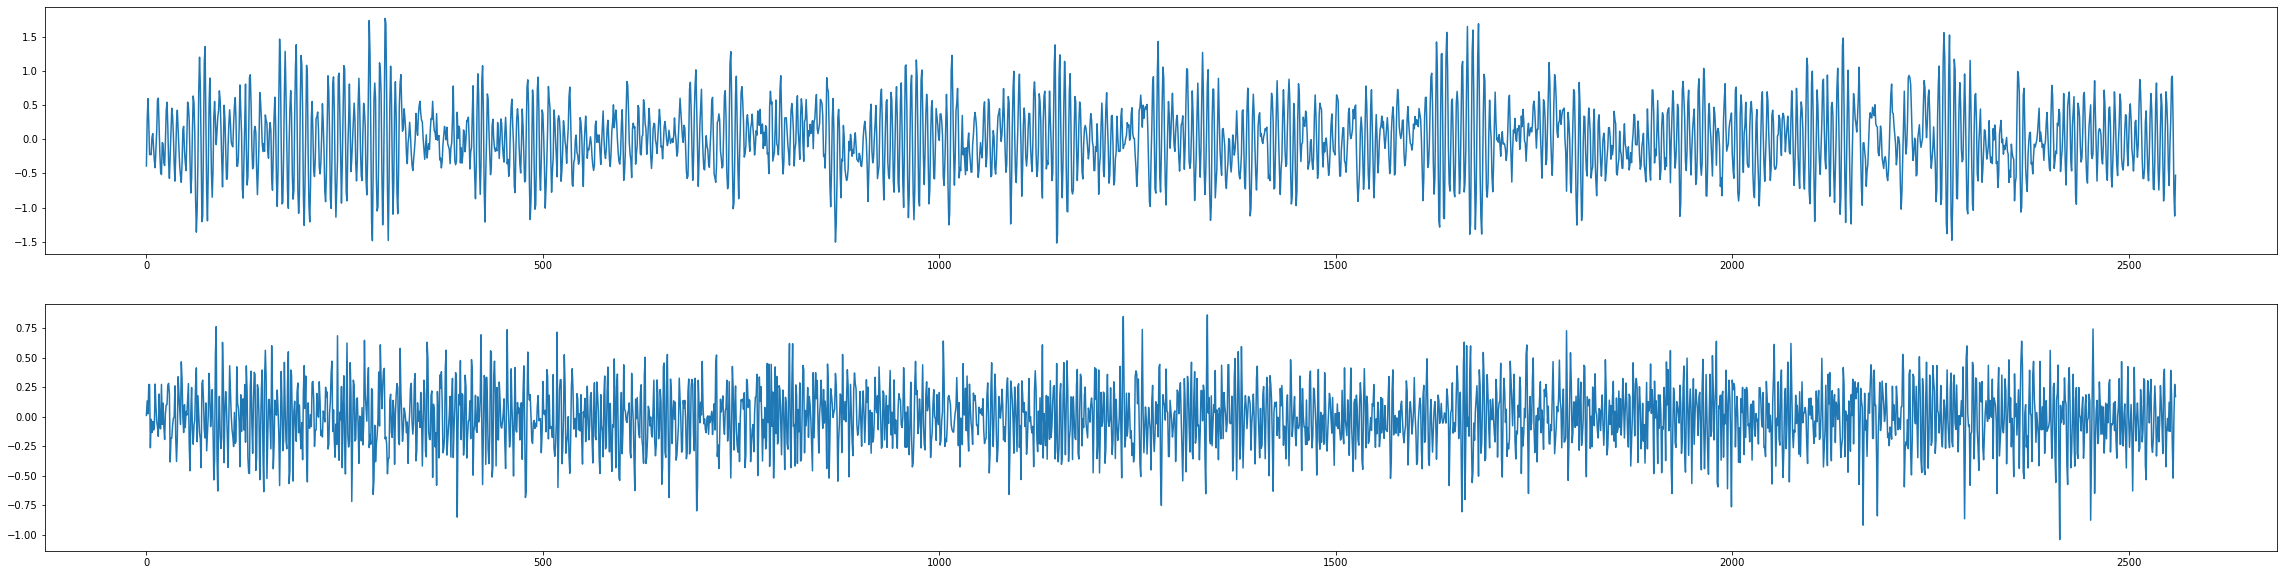

In [72]:
fig,axs=plt.subplots(2,1,figsize=(40,10))
axs[0].plot(df_1['X'])
axs[1].plot(df_1['Y'])

In the next section we will create a data set with the features of each one of these files

## Save files as .parquet
We have  several files corresponding to each 10 second measurements. We read all the data and we save them in .parquet files:
- A file for each bearing with columns: H,m,s,microsec, X,Y, file name, bearing
- A file with the data of all the bearings of the same group (training or test)


### Functions

In [98]:
def CrearSparkDf(folder,bearing=0):
    """Read files in folder starting with acc an it creates a Pandas DF
    folder='Learning_set/Bearing1_1/'
    v1: Capstone 1-7
    
    """
    df=pd.DataFrame()
    i=0
    listaFolder=os.listdir(folder)
    NumberOfFiles=len(listaFolder)

    for a in listaFolder:
    #for a in os.listdir():
        if (a[0:3]=='acc'):
            if i== 0:
                csvfile=open(folder+a)
                temp_lines = csvfile.readline()
                dialect = csv.Sniffer().sniff(temp_lines)
                separator=dialect.delimiter
            i=i+1
            #print(folder+a, end="\r")
            print(a+'  '+str(i)+' de '+str(NumberOfFiles), end="\r")
            df_1=pd.read_csv(folder+a,sep=separator,header=None)
            #df_1=pd.read_csv(a,header=None)
            df_1.columns=['H','m','s','microseg','X','Y']
            FileNameLst=[a]*df_1.shape[0]
            df_2=pd.DataFrame({'file':FileNameLst,'bearing':bearing})
            df_1=pd.concat([df_1, df_2], axis=1)
            
            #print(df_1.iloc[0:2])
            if i==1:
                spdf=spark.createDataFrame(df_1)
                #spdf.show()
            else:
                
                spdf=spdf.unionByName(spark.createDataFrame(df_1))
                #spdf.show()
            #df=df.append(df_1)
    print(folder+a)        


    return spdf

In [106]:
#Read and save by slices

names=['1_3','1_5','1_6','1_7','2_3','2_5','3_2']
names2=[13,15,16,17,23,25,32]

folder_1='FEMTOBearingDataSet/Test_set/Test_set/Bearing'

def CreateSparkDFBySlices(names,names2,folder_1):
    j=0
    for j in range(len(names2)):
        bearing=names2[j]
        folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
        #folder_1='FEMTOBearingDataSet/Test_set/Test_set/Bearing'
        folder=folder_path+folder_1+names[j]+'/'
        listaFolder=os.listdir(folder)
        NumberOfFiles=len(listaFolder)
        print(NumberOfFiles, names[j])
        fileName='b'+str(names2[j])+'.parquet'
        i=0
        for a in listaFolder:
            if (a[0:3]=='acc'):
                #print(a)
                if i== 0:
                    csvfile=open(folder+a)
                    temp_lines = csvfile.readline()
                    dialect = csv.Sniffer().sniff(temp_lines)
                    separator=dialect.delimiter
                i=i+1
                #print(folder+a, end="\r")
                print(a+'  '+str(i)+' de '+str(NumberOfFiles), end="\r")
                df_1=pd.read_csv(folder+a,sep=separator,header=None)
                #df_1=pd.read_csv(a,header=None)
                df_1.columns=['H','m','s','microseg','X','Y']
                FileNameLst=[a]*df_1.shape[0]
                df_2=pd.DataFrame({'file':FileNameLst,'bearing':bearing})
                df_1=pd.concat([df_1, df_2], axis=1)

                #print(df_1.iloc[0:2])
                if i==1:
                    spdf=spark.createDataFrame(df_1)
                    #spdf.show()
                else:
                    spdf=spdf.unionByName(spark.createDataFrame(df_1))


                if i==1000:
                    spdf.write.parquet(fileName)
                    print(i,fileName, ' written')
                elif i==1001: 
                    spdf=spark.createDataFrame(df_1) #overwrites spdf with data from file 1 to file 1001

                elif i==2000:
                    spdf.write.mode("append").parquet(fileName)
                    print(i,fileName, ' written')

                elif i==2001:
                    spdf=spark.createDataFrame(df_1)

                    #spdf.show()
                #df=df.append(df_1)
        print(folder+a)        

        spdf.write.mode("append").parquet(fileName)
        print(fileName, ' written')
    return





### Training set

In [84]:
folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing1_2/'
df=CrearSparkDf(folder,12)

df.write.parquet('b12.parquet')

/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Learning_set/Bearing1_2/acc_00258.csv


In [85]:
folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing2_1/'
df=CrearSparkDf(folder,21)

df.write.parquet('b21.parquet')

/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Learning_set/Bearing2_1/acc_00258.csv


In [8]:
folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing2_2/'

df=CrearSparkDf(folder,22)

df.write.parquet('b22.parquet')

/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Learning_set/Bearing2_2/acc_00258.csv


In [24]:
folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing3_1/'
df=CrearSparkDf(folder,31)
df.write.parquet('b31.parquet')

/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Learning_set/Bearing3_1/acc_00258.csv


In [52]:
folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing3_2/'
df=CrearSparkDf(folder,32)
df.show()
df.write.parquet('b32.parquet')

/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Learning_set/Bearing3_2/acc_01191.csv
+---+---+---+--------+--------------------+-------------------+-------------+-------+
|  H|  m|  s|microseg|                   X|                  Y|         file|bearing|
+---+---+---+--------+--------------------+-------------------+-------------+-------+
|  9| 23| 51|978160.0|              -0.057|             -0.121|acc_00296.csv|     32|
|  9| 23| 51|978200.0|               -0.27|              0.795|acc_00296.csv|     32|
|  9| 23| 51|978240.0|               0.151|             -0.217|acc_00296.csv|     32|
|  9| 23| 51|978280.0|               0.385|              -0.76|acc_00296.csv|     32|
|  9| 23| 51|978320.0|               0.524|              0.614|acc_00296.csv|     32|
|  9| 23| 51|978360.0| 0.47200000000000003|             -0.251|acc_00296.csv|     32|
|  9| 23| 51|978400.0| 0.14300000000000002|              0.151|acc_00296.csv|     32|
|  9| 

#### Files of bigger size
Some files cannot be saved directly as .parquet (e.g. Bearing 1_1). We read and save in 1000 files steps to avoid issues.

In [ ]:
#This doesn't work

folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing1_1/'
df=CrearSparkDf(folder,11)
df.show()
#df.write.parquet('b11.parquet')

In [103]:
bearing=11
i=0

folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'

folder=folder_path+'FEMTOBearingDataSet/Learning_set/Bearing1_1/'
listaFolder=os.listdir(folder)

NumberOfFiles=len(listaFolder)


df=pd.DataFrame()
#Repetir para 3 slices:  #0:1000 1000:2000 2000:

for a in listaFolder[2000:]:
    if (a[0:3]=='acc'):
        print(a)
        if i== 0:
            csvfile=open(folder+a)
            temp_lines = csvfile.readline()
            dialect = csv.Sniffer().sniff(temp_lines)
            separator=dialect.delimiter
        i=i+1
        #print(folder+a, end="\r")
        print(a+'  '+str(i)+' de '+str(NumberOfFiles), end="\r")
        df_1=pd.read_csv(folder+a,sep=separator,header=None)
        #df_1=pd.read_csv(a,header=None)
        df_1.columns=['H','m','s','microseg','X','Y']
        FileNameLst=[a]*df_1.shape[0]
        df_2=pd.DataFrame({'file':FileNameLst,'bearing':bearing})
        df_1=pd.concat([df_1, df_2], axis=1)

        #print(df_1.iloc[0:2])
        if i==1:
            spdf=spark.createDataFrame(df_1)
            #spdf.show()
        else:

            spdf=spdf.unionByName(spark.createDataFrame(df_1))
            #spdf.show()
        #df=df.append(df_1)
print(folder+a)        


acc_01282.csv
acc_00822.csv  1 de 3269
acc_00836.csv  2 de 3269
acc_01296.csv  3 de 3269
acc_00188.csv  4 de 3269
acc_01335.csv  5 de 3269
acc_01453.csv  6 de 3269
acc_00995.csv  7 de 3269
acc_00759.csv  8 de 3269
acc_01447.csv  9 de 3269
acc_00981.csv  10 de 3269
acc_01321.csv  11 de 3269
acc_02628.csv  12 de 3269
acc_01309.csv  13 de 3269
acc_00017.csv  14 de 3269
acc_02600.csv  15 de 3269
acc_02166.csv  16 de 3269
acc_00771.csv  17 de 3269
acc_00765.csv  18 de 3269
acc_02172.csv  19 de 3269
acc_02614.csv  20 de 3269
acc_00003.csv  21 de 3269
acc_02199.csv  22 de 3269
acc_01490.csv  23 de 3269
acc_00956.csv  24 de 3269
acc_01484.csv  25 de 3269
acc_00942.csv  26 de 3269
acc_02358.csv  27 de 3269
acc_01651.csv  28 de 3269
acc_01889.csv  29 de 3269
acc_00229.csv  30 de 3269
acc_01137.csv  31 de 3269
acc_01123.csv  32 de 3269
acc_01645.csv  33 de 3269
acc_00573.csv  34 de 3269
acc_02364.csv  35 de 3269
acc_02402.csv  36 de 3269
acc_00215.csv  37 de 3269
acc_00201.csv  38 de 3269
acc_024

KeyboardInterrupt: 

In [27]:
#Ejecutar según el slice correspondiente
spdf.write.parquet('b11a.parquet')
spdf.write.parquet('b11a2.parquet')
spdf.write.parquet('b11a3.parquet')

#Guardar añadiendo al archivo
spdf.write.mode("append").parquet('b11a.parquet')




In [107]:
names=['1_1']
names2=[11]

folder_1='FEMTOBearingDataSet/Learning_set/Bearing'

CreateSparkDFBySlices(names,names2,folder_1)

3269 1_1
1000 b11.parquet  written69
2000 b11.parquet  written69
/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Learning_set/Bearing1_1/temp_00325.csv
b11.parquet  written


### Validation data


Creation of the file for one bearing

In [19]:
folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
folder=folder_path+'FEMTOBearingDataSet/Test_set/Test_set/Bearing'+'2_3'+'/'
df=CrearSparkDf(folder,'23')
df.show()


/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Test_set/Test_set/Bearing2_3/acc_01191.csv
+---+---+---+--------+--------------------+--------------------+-------------+-------+
|  H|  m|  s|microseg|                   X|                   Y|         file|bearing|
+---+---+---+--------+--------------------+--------------------+-------------+-------+
|  9| 29|  7|571910.0|              -0.371|               -0.16|acc_00296.csv|     23|
|  9| 29|  7|571950.0|              -0.505|               0.086|acc_00296.csv|     23|
|  9| 29|  7|571990.0|              -0.025|              -0.325|acc_00296.csv|     23|
|  9| 29|  7|572030.0|               0.263|               0.223|acc_00296.csv|     23|
|  9| 29|  7|572070.0|                 0.4|-0.22899999999999998|acc_00296.csv|     23|
|  9| 29|  7|572110.0|              -0.225|-0.02200000000000...|acc_00296.csv|     23|
|  9| 29|  7|572150.0|-0.41100000000000003|              -0.078|acc_00296.csv|

Loop for several files using a list. When the number of files is too big Spark cannot handle it. So, is number of files is greater than 2000 it's necessary to save the parquet files every 1000 thousand files.

In [ ]:
names=['1_4','2_4','2_6','2_7','3_3']
names2=[14,24,26,33]


for i in range(len(names)):
    folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
    folder=folder_path+'FEMTOBearingDataSet/Test_set/Test_set/Bearing'+names[i]+'/'
    df=CrearSparkDf(folder,names2[i])
    df.show()
    df.write.parquet('b'+str(names2[i])+'.parquet')
#pending   
#1_3 fails
#1_5 fails
#1_6 #Fails
#1_7 #2658
#2_3 #1202 - ok
#2_4 #713 - ok
#2_5 #2337 fails
#2_6 572 - ok
#2_7 200 -ok
#3_3 410 -ok

In [345]:
folder='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/FEMTOBearingDataSet/Test_set/Test_set/Bearing1_6/'
listaFolder=os.listdir(folder)
NumberOfFiles=len(listaFolder)
print(NumberOfFiles)

2685


# Data Analysis
GC overhead limit exceeded

According to the FEMTO article, experiment is stopped whe acceleration reach 20g. However is not clear if this refers to total acceleration (SQRT(X^2+Y^2)), maximum amplitud (max(|X|) or max(|Y|)), RMS or maximum peak to peak. In this section we will plot different data for the each bearing in order to clarify this.

As result of this analysis a new file with the time, RUL and vibration amplitude for each measure will be saved as 'training.parquet¡ and 'test.parquet'

In [151]:
#fileName='b15.parquet'
fileName='ibm ndpy/b'+str(11)+'.parquet'
spdf=spark.read.parquet(fileName)
spdf.show()

+---+---+---+--------+--------------------+--------------------+-------------+-------+
|  H|  m|  s|microseg|                   X|                   Y|         file|bearing|
+---+---+---+--------+--------------------+--------------------+-------------+-------+
| 16| 40| 49| 65664.0|               1.001|               -0.98|acc_02528.csv|     11|
| 16| 40| 49| 65703.0|              -0.782|               0.716|acc_02528.csv|     11|
| 16| 40| 49| 65742.0|              -0.693|               0.767|acc_02528.csv|     11|
| 16| 40| 49| 65781.0|              -1.943|               0.165|acc_02528.csv|     11|
| 16| 40| 49| 65820.0|              -1.767|               1.504|acc_02528.csv|     11|
| 16| 40| 49| 65859.0| -1.4140000000000001|              -1.643|acc_02528.csv|     11|
| 16| 40| 49| 65898.0|              -2.065|  0.7909999999999999|acc_02528.csv|     11|
| 16| 40| 49| 65937.0|-0.46299999999999997|               0.355|acc_02528.csv|     11|
| 16| 40| 49| 65976.0|              -1.225|

## Functions

### FFT
- CrearPdDfwithFFT(folder)
- FunctionCrearFftFromDf(df)
- FunctionCrearFft(RUL2): returns a spark df with FFT values as (sqrt(x^2+y^2))
- FunctionCrearFft2(RUL2)

In [5]:
# from  pyspark.ml.param import TypeConverters
from pyspark.sql import Row

def FunctionCrearFftFromDf(df):
    '''
    Calculate FFT for a sample from 2 directions measures
    input: dataframe with columns X and Y
    
    output: Vector with FFT Amplitude as SQRT(X^2+Y^2)
    '''
    #spark = SparkSession.builder.getOrCreate()
    #RUL2.createOrReplaceTempView('df')
    #idini=spark.sql("select min(id) as id from df").first()
    #idmax=spark.sql("select max(id) as id from df").first()
    #idini=RUL2.selectExpr("min(id) as id").first()
   #idmax=RUL2.selectExpr("max(id) as id").first()
    #print('Rows: '+str(idmax.id))


    #calculation of fft for each sample
    
    #print(1, end="\r")
    X=df.X
    Xfft=abs(fft(X))
    N=Xfft.shape[0]
    if (N%2==0):
        Xfft=Xfft[0:int(N/2)+1]
    else:
        Xfft=Xfft[0:int((N+1)/2)+1]

    Y=df.Y   
    Yfft=abs(fft(Y))
    N=Yfft.shape[0]
    if (N%2==0):
        Yfft=Yfft[0:int(N/2)+1]
    else:
        Yfft=Yfft[0:int((N+1)/2)+1]

    Afft=np.sqrt(Yfft**2+Xfft**2)


    VectorAfft=TypeConverters.toVector(Afft)


       
    
    return  VectorAfft

    

In [4]:
import csv
from pyspark.sql import Row
from  pyspark.ml.param import TypeConverters

def CrearPdDfwithFFT(folder):
    """Read files in folder starting with acc an it creates a Pandas DF
    input:
        folder='Learning_set/Bearing1_1/'
        
    output: 
        Pandas DF with column Afft
    """
    df=pd.DataFrame()
    i=0
    listaFolder=os.listdir(folder)
    Dato2=[]
    DataFFT=Row('id','features')
    for a in listaFolder:
    #for a in os.listdir():
        if (a[0:3]=='acc'):
            if i== 0:
                csvfile=open(folder+a)
                temp_lines = csvfile.readline()
                dialect = csv.Sniffer().sniff(temp_lines)
                separator=dialect.delimiter
            i=i+1
           # if i==2:
            #    break
                
                
                
            print(folder+a, end="\r")
            df_1=pd.read_csv(folder+a,sep=separator,header=None)
            #df_1=pd.read_csv(a,header=None)
            df_1.columns=['H','m','s','microseg','X','Y']
            #FunctionCrearFftFromDf(df_1)
            VectorAfft=FunctionCrearFftFromDf(df_1)
            Dato=DataFFT(i,VectorAfft)
            Dato2.append(Dato)
            
    print(folder+a, end='\r')        


    return Dato2

In [10]:
from  pyspark.ml.param import TypeConverters
from pyspark.sql import Row

def FunctionCrearFft(RUL2):
    spark = SparkSession.builder.getOrCreate()
    #RUL2.createOrReplaceTempView('df')
    #idini=spark.sql("select min(id) as id from df").first()
    #idmax=spark.sql("select max(id) as id from df").first()
    idini=RUL2.selectExpr("min(id) as id").first()
    idmax=RUL2.selectExpr("max(id) as id").first()
    print('Rows: '+str(idmax.id))

    Dato2=[]
    DataFFT=Row('id','features')
    #calculation of fft for each sample
    for i in range(idini.id,idmax.id+1):
        print(i, end="\r")
        X=RUL2.filter(RUL2.id==i).rdd.map(lambda row: row.X).collect()
        Xfft=abs(fft(X))
        N=Xfft.shape[0]
        if (N%2==0):
            Xfft=Xfft[0:int(N/2)+1]
        else:
            Xfft=Xfft[0:int((N+1)/2)+1]

        Y=RUL2.filter(RUL2.id==i).rdd.map(lambda row: row.Y).collect()   
        Yfft=abs(fft(Y))
        N=Yfft.shape[0]
        if (N%2==0):
            Yfft=Yfft[0:int(N/2)+1]
        else:
            Yfft=Yfft[0:int((N+1)/2)+1]

        Afft=np.sqrt(Yfft**2+Xfft**2)


        VectorAfft=TypeConverters.toVector(Afft)

        
        Dato=DataFFT(i,VectorAfft)
       
        Dato2.append(Dato)
        #print(Dato2[-1])

    df3 = sc.parallelize(Dato2).toDF()
    print(df3.count())
    return  df3
    


In [281]:
def FunctionCrearFft2(RUL2):
    #spark = SparkSession.builder.getOrCreate()
    #RUL2.createOrReplaceTempView('df')
    #idini=spark.sql("select min(id) as id from df").first()
    #idmax=spark.sql("select max(id) as id from df").first()
    idini=RUL2.selectExpr("min(id) as id").first()
    idmax=RUL2.selectExpr("max(id) as id").first()
    print('Rows: '+str(idmax.id))

    Dato2=[]
    DataFFT=Row('id','features')
    #calculation of fft for each sample
    for i in range(idini.id,idmax.id+1):
        print(i, end="\r")
        X=RUL2.filter(RUL2.id==i).sort(asc,RUL2.timeX).rdd.map(lambda row: row.X).collect()
        Xfft=abs(fft(X))
        N=Xfft.shape[0]
        if (N%2==0):
            Xfft=Xfft[0:int(N/2)+1]
        else:
            Xfft=Xfft[0:int((N+1)/2)+1]

        Y=RUL2.filter(RUL2.id==i).sort(asc,RUL2.timeX).rdd.map(lambda row: row.Y).collect()   
        Yfft=abs(fft(Y))
        N=Yfft.shape[0]
        if (N%2==0):
            Yfft=Yfft[0:int(N/2)+1]
        else:
            Yfft=Yfft[0:int((N+1)/2)+1]
        print(i, ' Yfft', end="\r")
        #Afft=np.sqrt(Yfft**2+Xfft**2)
        #VectorAfft=TypeConverters.toVector(Afft)
        
        vXfft=TypeConverters.toVector(Xfft)
        vYfft=TypeConverters.toVector(Yfft)
        if i==idini.id:
            df3=spark.createDataFrame([[i,vXfft,vYfft]],['id','Xfft''Yfft'])
        else:
            df2=spark.createDataFrame([[i,vXfft,vYfft]],['id','Xfft''Yfft'])
            df3=df3.unionByName(df2)
            print(i, ' df3 union', end="\r")
        
        
        #Dato=DataFFT(i,VectorAfft)
       
        #Dato2.append(Dato)
        #print(Dato2[-1])

    #df3 = sc.parallelize(Dato2).toDF()
    print(df3.count())
    return  df3

### Read/save Data (compatibility with Watson Studio version)
Read and save functions for compatibility with previous code created in Watso Studio. Functions for ibmSpark can be found in previous versions
<a id='escribirDatosEnCloud'></a>

In [3]:
def escribirDatosEnCloud(df,fileName,formato,user='ffy'):
    """
    input:
    df: dataframe
    fileName: name
    format: 'parquet' o 'csv'
    user: 'ffy' por defecto
    
    ver 1-8
    versiones anteriores para ibm en Capstone 1-7
    Versión 1-5
    user: 'ndpy' or 'ffy'
    """

    if formato=='csv':
        df.write.csv(fileName+'.'+formato)
    if formato=='parquet':    
        print(fileName+'.'+formato, end=" ")
        df.write.parquet(fileName+'.'+formato,mode='overwrite')
        print("overwritten ")
        
def leerDatosEnCloud(fileName,user="ndpy"):
    """
    v0: Capstone 1-7
    Versión para lectura de datos .parquet en Jpyter Notebook local
    
    fileName:  name.parquet
    user: 'ndpy' or 'ffy' (directorio: 'ibm ndpy')
    """
    
    #spark = SparkSession.builder.getOrCreate()
    df=spark.read.parquet(fileName)
    
    return df

### Function for data plotting

- plotFormat() define figures size, font and style 
- dataForPlot(dfToPlot): extract df data for X, Y1 e Y2
- plotGrafSimple(Y1,Y2): 2 plots without X values
- def plotGraf(X,Y1,Y2): 2 plots taking into account X values
- funPlotAcc(Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xps)
- funPlotAccLoadFile(fileName)
- funPlotAccData(pdfRUL2,fileName)  

In [4]:

def plotFormat():
    plt.figure(figsize=(20,8))
    plt.style.use("seaborn")
    #plt.xlabel('Time (s)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
def dataForPlot(dfToPlot):
    dfToPlot.createOrReplaceTempView('df')
    SQLsentence="select timeX, X, Y from df"
    SQLsentence="select X, Y from df"


    dfToPlot=spark.sql(SQLsentence)

    AX=dfToPlot.rdd.map(lambda row: row.X)
    AY=dfToPlot.rdd.map(lambda row: row.Y)
    #XT=DataToPlot.rdd.map(lambda row: row.timeX)
    
    return  AX, AY



def plotGrafSimple(Y1,Y2):
    AX=Y1.collect()
    AY=Y2.collect()
    #XT=X.collect()
    plotFormat()
  
    
    #plt.plot(XT, AX, color='b')
    plt.plot(AX, color='b')


    plt.ylabel('Amplitude (X)', fontsize=16)
    #plt.xlabel('Time (s)', fontsize=16)

    
    plotFormat()
    #plt.plot(XT, AX, color='b')
    plt.plot(AY, color='b')

    plt.ylabel('Amplitude (Y)', fontsize=16)
    #plt.xlabel('Time (s)', fontsize=16)
    
def plotGraf(X,Y1,Y2):
    AX=Y1.collect()
    AY=Y2.collect()
    XT=X.collect()
    plotFormat()
    plt.plot(XT, AX, color='b')


    plt.ylabel('Amplitude (X)', fontsize=16)
    plt.xlabel('Time (s)', fontsize=16)
    
    plotFormat()
    plt.plot(XT, AX, color='b')

    plt.ylabel('Amplitude (Y)', fontsize=16)
    plt.xlabel('Time (s)', fontsize=16)

In [147]:
#Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp =  funPlotAccData(pdfRUL2,fileName)    
        
def funPlotAcc(Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xps,fileName):
    '''
    
    '''
    plt.style.use("seaborn")

    fig, axs = plt.subplots(2, 2, figsize=(40,15)) 
    font = {'family' : 'sans-serif',
        'style':'normal',
        'weight': 'normal',
        'size'   : 24}

    plt.rc('font', **font)

    #plt.xlabel('Time (s)', fontsize=16)
    
    for i in axs:
        for j in i:
            j.tick_params(axis='both',labelsize=20)
            

    
    
    fontsize=24
    ax=axs[0][0]
    ax.plot(Xp,Yabsmax)
    ax.set_xlabel('time', fontsize=fontsize)
    ax.set_ylabel('max(|Y|)', fontsize=fontsize)
    ax.set_title('max(|Y|) - '+fileName, fontsize=fontsize)

    ax=axs[0][1]
    ax.plot(Xp,Ymax-Ymin)
    ax.set_xlabel('time', fontsize=fontsize)
    ax.set_ylabel('Ymax-Ymin', fontsize=fontsize)
    ax.set_title('Ymax-Ymin - '+fileName, fontsize=fontsize)

   
    ax=axs[1][0]
    ax.plot(Xp,Xabsmax)
    ax.set_xlabel('time', fontsize=fontsize)
    ax.set_ylabel('max(|X|)', fontsize=fontsize)
    ax.set_title('max(|X|) - '+fileName, fontsize=fontsize)
   

    ax=axs[1][1]
    ax.plot(Xp,Xmax-Xmin)
    ax.set_xlabel('time', fontsize=fontsize)
    ax.set_ylabel('Xmax-Xmin', fontsize=fontsize)
    ax.set_title('Xmax-Xmin - '+fileName, fontsize=fontsize)

    Xmaxmin=Xmax-Xmin

    print('Positions where Xmax - Xmin > 20: '+ str(np.where(Xmaxmin>20)))
    Ymaxmin=Ymax-Ymin
    print('Positions where Ymax - Ymin > 20: '+ str(np.where(Ymaxmin>20)))


In [6]:
def funPlotAccLoadFile(fileName):
    RUL2=ReadAndPrepare(fileName, 'ffy')
    print(fileName+': '+'RUL2')
    pdfRUL2=RUL2.toPandas()
    return pdfRUL2

def funPlotAccData(pdfRUL2,fileName):    
    Ymax=[]
    XpYmax=[]
    Ymin=[]
    Xmax=[]
    Xmin=[]
    DeltaX=[]
    Xabsmax=[]
    Yabsmax=[]
    Xp=[]
    ifin=pdfRUL2.id.max()
    for i in range(1,ifin):
        Xp.append(i)
        Ymax.append(pdfRUL2[pdfRUL2.id==i].Y.max())
        Ymin.append(pdfRUL2[pdfRUL2.id==i].Y.min())
        Xmax.append(pdfRUL2[pdfRUL2.id==i].X.max())
        Xmin.append(pdfRUL2[pdfRUL2.id==i].X.min())
        
        #Yabsmax.append(max(abs(pdfDataFromRUL[pdfDataFromRUL.id==i].Y)))        
        #Xabsmax.append(max(abs(pdfDataFromRUL[pdfDataFromRUL.id==i].X)))

        Yabsmax.append(max(pdfDataFromRUL[pdfDataFromRUL.id==i].Y.abs()))        
        Xabsmax.append(max(pdfDataFromRUL[pdfDataFromRUL.id==i].X.abs()))  
        
        
        
        #Delta=pdfRUL2[pdfRUL2.id==i].X.max()-pdfRUL2[pdfRUL2.id==i].X.min()
        #DeltaX.append(Delta/2)
    
    Xmax=np.array(Xmax)
    Xmin=np.array(Xmin)
    Ymax=np.array(Ymax)
    Ymin=np.array(Ymin)
    return Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp, fileName
        
#Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp, fileName=funPlotAccData(pdfRUL2,fileName)


### Read and prepare datasets (no needed??? - check - I think only 2)

In [8]:
def ReadAndPrepare(fileName,user='ffy'):
    """A partir de los datos crea un dataframe con las columnas RUL, RUL2, timeX, id, bearing
    Output: DataFrame 
    """
    df2=leerDatosEnCloud(fileName+'.parquet',user)
    df2.show(10)
    dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time
    dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
    T0=dfo.rdd.map(lambda row: row.time)
    time0=T0.first()
    dfo=dfo.withColumn('timeX',dfo.time-time0)
#No funciona al ser un set de datos muy grande    
    #dfo.createOrReplaceTempView('df')
    #RUL=spark.sql("select timeX, X, Y from df where sqrt(X*X+Y*Y)>20")
    #TimeFail=RUL.first().timeX
#Alternativa
    RUL=dfo.selectExpr("sqrt(X*X+Y*Y)>20 as criteria","timeX", "X", "Y" )
    TimeFail=RUL.filter(RUL.criteria==True).first().timeX        
#    
    
    dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)
#No funciona al ser un set de datos muy grande        
    #dforul.createOrReplaceTempView('df')
    #RUL2=spark.sql("select *, case when RUL> 0 then RUL else 0 end as RUL2 from df")
    #RUL2=spark.sql("select *, case when timeX > -1 then "+'"'+fileName+'"'+" else "+'"'+fileName+'"'+" end as bearing from df")
#Alternativa
    RUL2=dforul.selectExpr("*","case when RUL> 0 then RUL else 0 end as RUL2" )
#Cuidad: escribe b11a para todos los casos
    #RUL2=RUL2.selectExpr("*","case when timeX > -1 then '"'b11a'"' else '"'b11a'"' end as bearing" )  
    SqlString="case when timeX > -1 then '"+fileName+"' else '"+fileName+"' end as bearing"
    RUL2=RUL2.selectExpr("*", SqlString) 
    RUL2=RUL2.sort(RUL2.timeX.asc())
#
    
    
    RUL2=RUL2.withColumn('id',RUL2.file.substr(5,5).cast("integer"))
   
    return RUL2



In [9]:
def ReadAndPrepare2(fileName,user='ffy'):
    """    reorder data written previously with ReadAndPrepare
    input: filename bnna => read fileName+'RUL2.parquet'
   
    output: pdfDataFromRUL
    """
    RUL2=leerDatosEnCloud(fileName+'RUL2.parquet',user)
    pdfDataFromRUL=RUL2.toPandas()
    pdfDataFromRUL
    pdfDataFromRUL=pdfDataFromRUL.sort_values(by=['timeX'],ascending=True)
    pdfDataFromRUL=pdfDataFromRUL.reset_index(drop=True)
    return pdfDataFromRUL

  

In [10]:
def ReadAndPrepare3(fileName,user='ffy',mode=0):
    """versión modificada de ReadAndPrepare. 
    Utiliza como criterio de fallo max(X)-min(X)>20
    A partir de los datos crea un dataframe con las columnas RUL, RUL2, timeX, id, bearing
    input: fileName (bNNa), lee bNNa.parquet
    mode=0 , 
    mode =1=> save intermediatesteps
    mode =2=> read intermiadatesteps
    mode = 3 => Insert TimeToTable by hand
    Output: RUL2 (DF)
    """
    if mode <2: 
        # Create a SORTED DF with a numeric time column
        df2=leerDatosEnCloud(fileName+'.parquet',user)
        df2.show(10)
        print('add id')

        df2=df2.withColumn('id',df2.file.substr(5,5).cast("integer")) #ReadAndPrepare3

        dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time
        print('add time')
        dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
        print('T0')
        T0=dfo.rdd.map(lambda row: row.time)
        time0=T0.first()

        dfo=dfo.withColumn('timeX',dfo.time-time0)
        if mode ==1:
            escribirDatosEnCloud(dfo,fileName+'RAP3dfo','parquet','ffy') 
    # Apply fault criteria to idetify failure time (TIMEFAIL) and create dforul with RUL column

    # V1) No funciona al ser un set de datos muy grande:    
        #dfo.createOrReplaceTempView('df')
        #RUL=spark.sql("select timeX, X, Y from df where sqrt(X*X+Y*Y)>20")
        #TimeFail=RUL.first().timeX
           # dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)
    # V2) Alternativa (ReadAndPrepare)
        #RUL=dfo.selectExpr("sqrt(X*X+Y*Y)>20 as criteria","timeX", "X", "Y" )
        #TimeFail=RUL.filter(RUL.criteria==True).first().timeX  
            #dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)
    # V3) ReadAndPrepare3 fault criteria delta=max(x)-min(x)
       
    if mode ==2:

        fileNameString=fileName+'RAP3dfo.parquet'
        dfo=leerDatosEnCloud(fileNameString,user)


        print(fileNameString, 'read')
    if mode <3:
        #mode 0: dfo
        #mode 1: dfo y escribe en IBM dfoRAP3
        #mode 2: lee dfo
        print('creating pandas dataframe to calculate TimeToFail')

        pdfDataFromRUL=dfo.toPandas()

        pdfDataFromRUL=pdfDataFromRUL.sort_values(by=['timeX'],ascending=True)
        pdfDataFromRUL=pdfDataFromRUL.reset_index(drop=True)

        for i in range(1,max(pdfDataFromRUL.id)+1):
            print(i, end="\r")
            x=pdfDataFromRUL[pdfDataFromRUL.id==i]['X']
            delta=max(x)-min(x)
            if delta >20:
                TimeToFail=pdfDataFromRUL[pdfDataFromRUL.id==i]['timeX']
                TimeToFail=TimeToFail.iloc[0]
                break
            #dfo=dfo.withColumn('RUL',TimeToFail-dfo.timeX)

        # Add column with RUL and RUL2 = 0 when timex > TimeToFail or when RUL <0

        # V1)
        #No funciona al ser un set de datos muy grande        
            #dforul.createOrReplaceTempView('df')
            #RUL2=spark.sql("select *, case when RUL> 0 then RUL else 0 end as RUL2 from df")
            #RUL2=spark.sql("select *, case when timeX > -1 then "+'"'+fileName+'"'+" else "+'"'+fileName+'"'+" end as bearing from df")
        #Alternativa 
            #RUL2=dforul.selectExpr("*","case when RUL> 0 then RUL else 0 end as RUL2" )
        # V3) ReadAndPrepare3
        print('TimeToFail', TimeToFail)
        RUL2=dfo
    
    if mode == 3:
        #mode 0: dfo
        #mode 1: dfo y escribe en IBM RAP3dfo
        #mode 2: lee dfo
        #mode 3 => Insert TimeToTable by hand y lee RAP3dfo


        
        TimeToFail=24382.200004
        fileNameString=fileName+'RAP3dfo.parquet'
        RUL2=leerDatosEnCloud(fileNameString,user)
        
        
        print(fileNameString, 'read mode 3')
        
    
    SqlString=str(TimeToFail)+"-timeX as RUL"
    RUL2=RUL2.selectExpr("*",SqlString )
    RUL2=RUL2.selectExpr("*","case when RUL> 0 then RUL else 0 end as RUL2" )
    RUL2.show()
    
    
# Write fileName in column bearing    
    #Cuidad: escribe b11a para todos los casos
    #RUL2=RUL2.selectExpr("*","case when timeX > -1 then '"'b11a'"' else '"'b11a'"' end as bearing" )  
    SqlString="case when timeX > -1 then '"+fileName+"' else '"+fileName+"' end as bearing"
    RUL2=RUL2.selectExpr("*", SqlString) 
    RUL2=RUL2.sort(RUL2.timeX.asc())
#
    
    
    #RUL2=RUL2.withColumn('id',RUL2.file.substr(5,5).cast("integer"))  ##ReadAndPrepare3
   
    return RUL2

In [126]:
from pyspark.sql import functions as F

def funCreateBearingFiles(names2,prefix,bearingGroupName,i=0, save_bfile01=0,save_bearingGroup01=0,plot01=0 ):
    '''
    This function creates 2 type of files:
    - bNNa with timeX (time beginning a 0) and RUL for each sample (point) for each bearing
    - bearing Group file is a file containg the summary of the data of each sample for several bearings
    
    inputs:
    names2 (NN): bearing number or list with several bearing numbers, file with bearing dat should be prefix + name + .parquet (eg b11.parquet)
    prefix: 'b' for test, 'Ibm ndpy/b' for training
    bearingGroupName: name of the file containing the data of all the bearings in name list
    i: 1 to append data to an existing grouping file, 0 to create the file
    
    Outputs:
    bNNa.parquet
    bearingGroupName+'.parquet'
    
    #Options:
    
    #Save file bNNa with timeX (time beginning a 0) and RUL for each sample (point) for each bearing
    save_bfile01=0      #0: don't save
                        #1: Save file, 
                        #2: overwrites
                        
    #bearing Group file is a file containg the summary of the data of each sample for several bearings
    #Time X, RUL, delta  (as max(X)-min(X)) and deltaY
    save_bearingGroup01=0   #0: don't save
                            #1: Save file traininig/test, 
                            
    bearingGroupName.parquet='test' #test or training, it's the file name for saved data
    i=0                     #0: New bearing Group file /  
                            #1: append to existing file
    

    #Plot deltas
    plot01=0 #Plot deltas
    '''
    for name in names2:
        #fileName='b'+str(name)+'.parquet'
        fileName=prefix+str(name)+'.parquet'
        dfo=[]
        dfo=spark.read.parquet(fileName)
        print('reading', fileName)
        #id
        dfo=dfo.withColumn('id',dfo.file.substr(5,5).cast("integer"))
        #time
        dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
        #timeX=time-Tmin
        Tmax=dfo.rdd.map(lambda row: row.time).max()
        print(Tmax)
        Tmin=dfo.rdd.map(lambda row: row.time).min()
        print(Tmin)
        dfo=dfo.withColumn('timeX',dfo.time-Tmin)
        dfo=dfo.withColumn('RUL',Tmax - dfo.time)
        #maxId=dfo.rdd.map(lambda row: row.id).max()
        
        newFileName=prefix+str(name)+'a.parquet'

        if save_bfile01==1:
            print(newFileName, ' writing')

            dfo.write.parquet(newFileName)
        if save_bfile01==2:   
            print(newFileName, ' overwriting')
            dfo.write.mode('overwrite').parquet(newFileName)



        if save_bearingGroup01==1:
            dfDelta=dfo.groupBy("id","bearing").agg((F.max(dfo.X)-F.min(dfo.X)).alias('delta'))
            #dfDelta=dfDelta.withColumnRenamed('id','idx')
            dfDeltaY=dfo.groupBy("id").agg((F.max(dfo.Y)-F.min(dfo.Y)).alias('deltaY'))
            #cond = [dfDelta.id == dfDeltaY.id]
            dfDelta=dfDelta.join(dfDeltaY, dfDelta.id == dfDeltaY.id, 'outer').drop(dfDeltaY.id)


            dfRUL=dfo.groupby(dfo.id).agg((F.min(dfo.RUL)).alias('RUL'))

            dfDelta=dfDelta.join(dfRUL, dfDelta.id == dfRUL.id, 'outer').drop(dfRUL.id)

            dfTime=dfo.groupBy("id").agg((F.min(dfo.timeX)).alias('timeX'))
            dfDelta=dfDelta.join(dfTime, dfDelta.id == dfTime.id, 'outer').drop(dfTime.id)


            dfDelta.orderBy(dfDelta.id.asc()).show(5)
            
            if i==0:
                dfDelta.write.parquet(bearingGroupName+'.parquet') #New file
                i=1
            else:
                dfDelta.write.mode('append').parquet(bearingGroupName+'.parquet')
            



        if plot01==1:
            fig,axs=plt.subplots(1,2, figsize=(40,10))
            ax=axs[0]

            ax.set_title(fileName)
            ax.plot(dfDelta.orderBy(dfDelta.id.asc()).select(dfDelta.delta).collect(), label='X')
            ax.legend()
            ax=axs[1]
            ax.plot(dfDelta.orderBy(dfDelta.id.asc()).select(dfDelta.deltaY).collect(), label='Y')
            ax.legend()
            ax.set_title(fileName)
        
    return

In [62]:

dfo=dfo.withColumn('id',df2.file.substr(5,5).cast("integer"))

In [63]:
pdfDataFromRUL=dfo.toPandas()

## Read dataset and prepare test/training datasets with features
Files with summary for each sample are created adding:
- time: time in seconds (dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
- timeX, with 0 as starting point
- RUL2: remaining useful life understanding that it is 0 for the last measurement
- id: file number

Files with summary for each sample are created adding:
- delta (peak to peak in X)
- deltaY (peak to peak in Y)




In [ ]:
#Options:
#Training dataset:
fileName='Ibm ndpy/b12.parquet'
names2=[11,12,21,22,31,32]

prefix='Ibm ndpy/b'
names2=[11]
bearingGroupName='training'
i=0 #create new file
funCreateBearingFiles('name',prefix,bearingGroupName,i, save_bfile01=1,save_bearingGroup01=1,plot01=0 )
names2=[12,21,22,31,32]
i=1  #append data 
funCreateBearingFiles('name',prefix,bearingGroupName,i, save_bfile01=1,save_bearingGroup01=1,plot01=0 )

#Test dataset:
fileName='b14.parquet'

prefix='b'
names2=[13]
bearingGroupName='test'
i=0 #create new file
funCreateBearingFiles('name',prefix,bearingGroupName,i, save_bfile01=1,save_bearingGroup01=1,plot01=0 )
names2=[14,15,16,17,23,24,25,26,27,33]
i=1  #append data 
funCreateBearingFiles('name',prefix,bearingGroupName,i, save_bfile01=1,save_bearingGroup01=1,plot01=0 )

for i in names2:
    dataplot=data[data[:,2]==i]
    plt.figure()
    plt.plot(dataplot[:,0],dataplot[:,1])
    plt.xlabel('id')
    plt.ylabel('timeX')
    plt.title('bearing '+ str(i))



+-------+-----+
|bearing|count|
+-------+-----+
|     26|  572|
|     25| 2002|
|     27|  172|
|     17| 1502|
|     33|  352|
|     13| 1802|
|     14| 1139|
|     15| 2302|
|     23| 1202|
|     16| 2302|
|     24|  612|
+-------+-----+



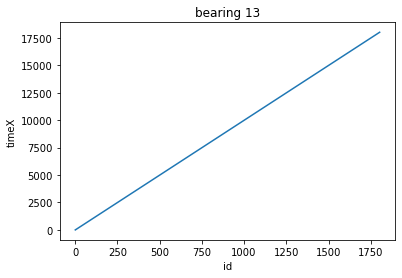

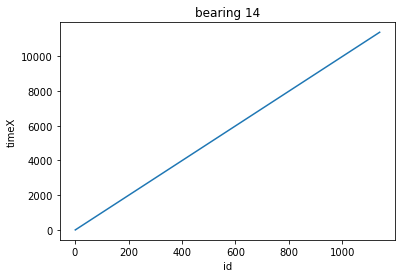

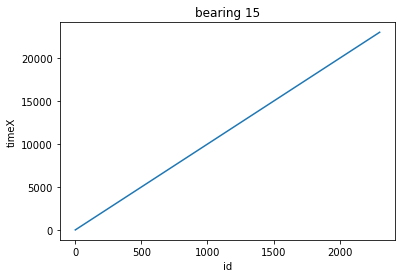

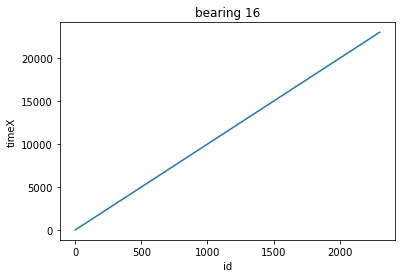

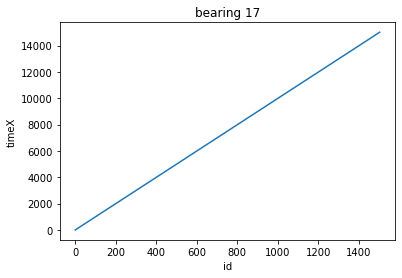

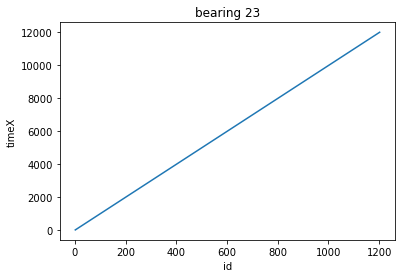

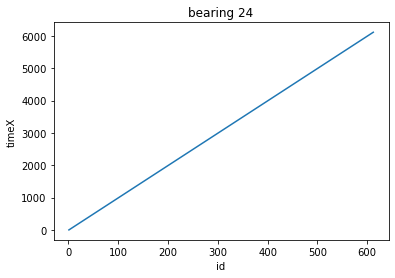

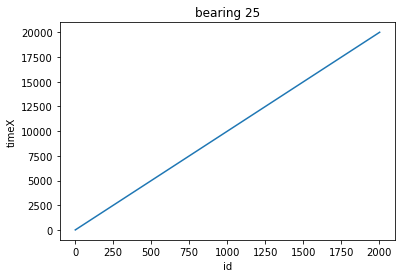

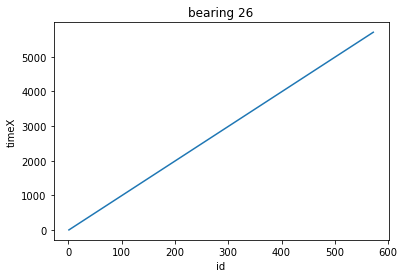

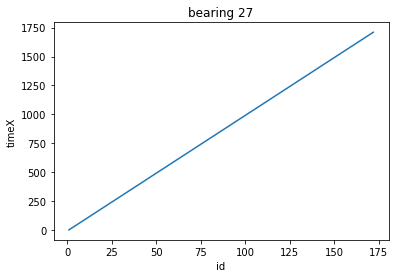

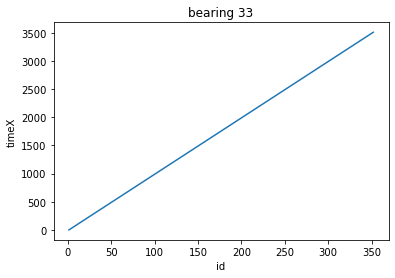

In [68]:
df=spark.read.parquet('test.parquet')
df.groupby(df.bearing).count().show()
data=df.select(df.id,df.timeX,df.bearing).orderBy(df.bearing,df.timeX).collect()
data=np.array(data)
names2=[13,14,15,16,17,23,24,25,26,27,33]
for i in names2:
    dataplot=data[data[:,2]==i]
    plt.figure()
    plt.plot(dataplot[:,0],dataplot[:,1])
    plt.xlabel('id')
    plt.ylabel('timeX')
    plt.title('bearing '+ str(i))

Test and training files created.
b11a... files with time stamp and RUL created

### Solving problems with b11a

#### Modify b11a  

In [75]:
prefix='Ibm ndpy/b'
fileName=prefix+'11'+'a.parquet'
df=spark.read.parquet(fileName)


In [72]:
df=df.orderBy(df.timeX)
df.select(df.timeX,df.X,df.Y,df.id).show()

+--------------------+--------------------+--------------------+---+
|               timeX|                   X|                   Y| id|
+--------------------+--------------------+--------------------+---+
|                 0.0|               0.552|              -0.146|  1|
|3.899999865097925E-5|               0.501|               -0.48|  1|
| 7.79999973019585E-5|               0.138|               0.435|  1|
|1.169999959529377...|              -0.423|                0.24|  1|
|1.560000018798746...|              -0.802|                0.02|  1|
|1.950000005308538...|              -0.364| 0.11199999999999999|  1|
|2.339999991818331...|               0.326| 0.29600000000000004|  1|
|2.729999978328123...|  0.8740000000000001|              -0.366|  1|
|3.119999964837916E-4|               0.885|              -0.369|  1|
|3.509999951347708...|               0.257|  0.5379999999999999|  1|
|3.900000010617077...|-0.38799999999999996|               0.045|  1|
| 4.28999999712687E-4|            

Text(0, 0.5, 'time (s)')

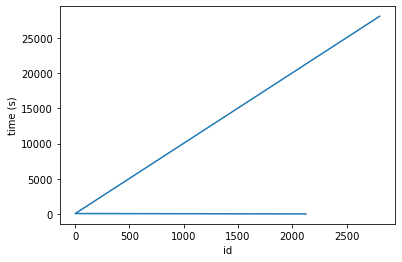

In [11]:
x=df.select(df.id).collect()
y=df.select(df.timeX).collect()
plt.plot(x,y)
plt.xlabel('id')
plt.ylabel('time (s)')

There is mistake in files 2121 and 2122. As can be seen measures 2121 and 2122 start at the same time, and before measure file 1. 

In [76]:
from pyspark.sql import functions as F

expr = [F.last(col).alias(col) for col in df.columns]

print(1, df.filter(df.id== 1).select(df.H,df.m,df.s,df.microseg).first())
print('****')
print(2120,'first', df.filter(df.id==2120).select(df.H,df.m,df.s,df.microseg).first())
print('...')
print(2120,'last', df.filter(df.id==2120).agg(*expr).select('H','m','s','microseg').take(1))
print('****************')
print(2121,'first', df.filter(df.id== 2121).select(df.H,df.m,df.s,df.microseg,'timeX').first())
print('...')
print(2121,'last', df.filter(df.id==2121).agg(*expr).select('H','m','s','microseg','timeX').take(1))
print('****************')
print(2122,'first', df.filter(df.id== 2122).select(df.H,df.m,df.s,df.microseg,'timeX').first())
print('...')
print(2122,'last', df.filter(df.id==2122).agg(*expr).select('H','m','s','microseg','timeX').take(1))
print('****************')
print(2123, 'first',df.filter(df.id== 2123).select(df.H,df.m,df.s,df.microseg).first())
print('...')
print(2123, 'last',df.filter(df.id== 2123).agg(*expr).select('H','m','s','microseg').take(1))




1 Row(H=9, m=39, s=39, microseg=65664.0)
****
2120 first Row(H=15, m=32, s=49, microseg=65664.0)
...
2120 last [Row(H=15, m=32, s=49, microseg=165620.0)]
****************
2121 first Row(H=15, m=32, s=59, microseg=65664.0, timeX=21200.0)
...
2121 last [Row(H=15, m=32, s=59, microseg=165624.0, timeX=21200.09996)]
****************
2122 first Row(H=15, m=33, s=9, microseg=65664.0, timeX=21210.0)
...
2122 last [Row(H=15, m=33, s=9, microseg=165624.0, timeX=21210.09996)]
****************
2123 first Row(H=15, m=33, s=19, microseg=65664.0)
...
2123 last [Row(H=15, m=33, s=19, microseg=165620.0)]


As there is a gap between time for measures 2120 and 2123 it seems logical to think that 21 and 22 correspond to these missing values. So this values are amended to fit in. 
- 2121: H=15, m=32, s=59
- 2122: H=15, m=33, s=09


microseg's start at 865660 intead of 65664, so the difference will be substrated to all the samples.




In [15]:
dif=865660-65664
print(dif)

799996


In [129]:
#Load b11.parquet
df=[]
prefix='Ibm ndpy/b'
fileName=prefix+'11'+'.parquet'
df=spark.read.parquet(fileName)


In [109]:
#Modify record 2121 and 2122 => df_2 data modified

df_1=df.filter(df.file=='acc_02121.csv').withColumn('microseg2',df.microseg-799996)
df_1=df_1.drop('microseg')
df_1=df_1.withColumnRenamed('microseg2','microseg')

df_1=df_1.drop('H','m','s')

from pyspark.sql.functions import lit

df_1=df_1.withColumn('H',lit(15)).withColumn('m',lit(32)).withColumn('s',lit(59))



In [110]:
df_2=df_1

In [111]:
df_1=df.filter(df.file=='acc_02122.csv').withColumn('microseg2',df.microseg-799996)
df_1=df_1.drop('microseg')
df_1=df_1.withColumnRenamed('microseg2','microseg')

df_1=df_1.drop('H','m','s')

from pyspark.sql.functions import lit

df_1=df_1.withColumn('H',lit(15)).withColumn('m',lit(33)).withColumn('s',lit(9))



In [112]:
df_2=df_2.unionByName(df_1) 
df_2.show()

+--------------------+--------------------+-------------+-------+--------+---+---+---+
|                   X|                   Y|         file|bearing|microseg|  H|  m|  s|
+--------------------+--------------------+-------------+-------+--------+---+---+---+
|              -0.261|              -0.441|acc_02121.csv|     11| 65664.0| 15| 32| 59|
|              -0.485|-0.16899999999999998|acc_02121.csv|     11| 65704.0| 15| 32| 59|
|              -0.494|               -0.29|acc_02121.csv|     11| 65744.0| 15| 32| 59|
|              -0.573|               0.254|acc_02121.csv|     11| 65784.0| 15| 32| 59|
|              -0.647|               0.192|acc_02121.csv|     11| 65824.0| 15| 32| 59|
| -0.9009999999999999|              -0.215|acc_02121.csv|     11| 65864.0| 15| 32| 59|
|-0.49200000000000005|               0.245|acc_02121.csv|     11| 65904.0| 15| 32| 59|
|              -0.354| 0.21899999999999997|acc_02121.csv|     11| 65944.0| 15| 32| 59|
|               0.301|              -0.358|

In [113]:
#Remove wrong data from df

df=df.filter(df.file!='acc_02121.csv')
df=df.filter(df.file!='acc_02122.csv')
df.filter(df.file=='acc_02122.csv').count()

0

In [114]:
df_2.filter(df_2.file=='acc_02122.csv').count()

2560

In [115]:
df_2.filter(df_2.file=='acc_02121.csv').count()

2560

In [116]:
#Jouin

dfo=df.unionByName(df_2)

In [117]:
dfo.filter(dfo.file=='acc_02121.csv').count()
dfo.filter(dfo.file=='acc_02122.csv').count()

#Save b11.parquet
dfo.write.parquet('Ibm ndpy/b11temp.parquet')
print(fileName)

Ibm ndpy/b11.parquet


In [121]:
dfo=[]
df=[]

In [123]:
df=spark.read.parquet('Ibm ndpy/b11temp.parquet')

In [124]:
df.write.mode('overwrite').parquet('Ibm ndpy/b11.parquet')

In [ ]:
#remove data from training

In [130]:
df=spark.read.parquet('training.parquet')

In [131]:
df=df.filter(df.bearing!=11)

In [132]:
df.write.parquet('training_temp.parquet')

In [133]:
df=spark.read.parquet('training_temp.parquet')

In [135]:
df.write.mode('overwrite').parquet('training.parquet')


DataFrame[bearing: bigint, count: bigint]

In [136]:
df.groupby(df.bearing).count().show()

+-------+-----+
|bearing|count|
+-------+-----+
|     22|  797|
|     32| 1637|
|     31|  515|
|     12|  871|
|     21|  911|
+-------+-----+



In [137]:
prefix='Ibm ndpy/b'
names2=[11]
bearingGroupName='training'

save_bfile01=2 #overwrite
save_bearingGroup01=1 #Save
i=1 #to append data to an existing grouping file
plot01=0  #No plots
funCreateBearingFiles(names2,prefix,bearingGroupName,i, save_bfile01,save_bearingGroup01,plot01 )

reading Ibm ndpy/b11.parquet
62799.16562
34779.065664
Ibm ndpy/b11a.parquet  overwriting
+-------+------------------+---+------------------+-------+-----+
|bearing|             delta| id|            deltaY|    RUL|timeX|
+-------+------------------+---+------------------+-------+-----+
|     11|3.7729999999999997|  1|              3.16|28020.0|  0.0|
|     11|              3.64|  2|             3.175|28010.0| 10.0|
|     11|             3.677|  3|2.9370000000000003|28000.0| 20.0|
|     11|3.7880000000000003|  4|2.9480000000000004|27990.0| 30.0|
|     11|3.4269999999999996|  5|2.7170000000000005|27980.0| 40.0|
+-------+------------------+---+------------------+-------+-----+
only showing top 5 rows



In [138]:
df=spark.read.parquet('training.parquet')

+-------+-----+
|bearing|count|
+-------+-----+
|     22|  797|
|     32| 1637|
|     31|  515|
|     12|  871|
|     11| 2803|
|     21|  911|
+-------+-----+



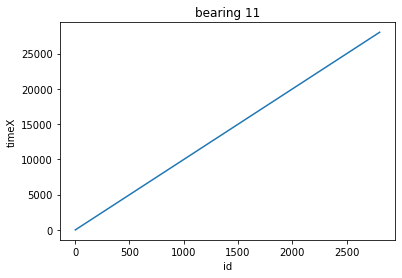

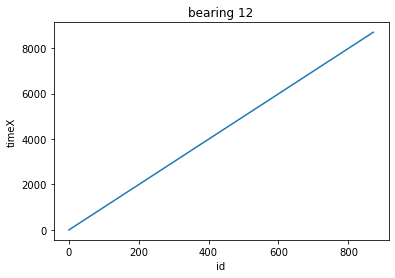

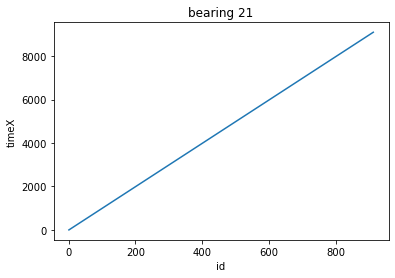

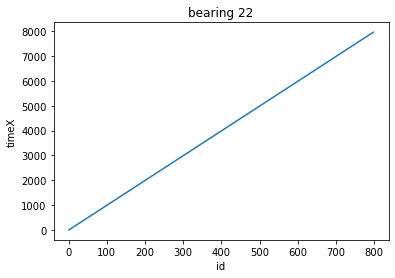

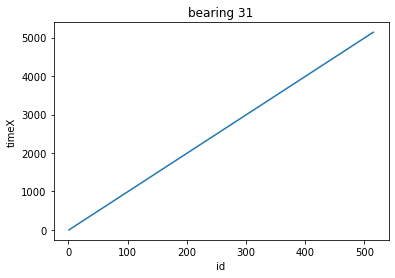

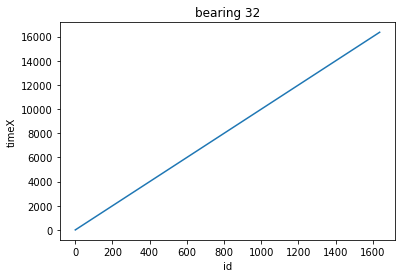

In [139]:

df.groupby(df.bearing).count().show()
data=df.select(df.id,df.timeX,df.bearing).orderBy(df.bearing,df.timeX).collect()
data=np.array(data)
names2=[11,12,21,22,31,32]
for i in names2:
    dataplot=data[data[:,2]==i]
    plt.figure()
    plt.plot(dataplot[:,0],dataplot[:,1])
    plt.xlabel('id')
    plt.ylabel('timeX')
    plt.title('bearing '+ str(i))

## Visualization of vibration data

According to the data the test stops when vibration amplitude is greater thatn 20 g. However, it doesn't clarify if it refers to vibration in X or Y. Different option where checked to conclude that the vibration level of 20 g correspondes to Xmax - Xmin or max(abs(X)), depending on the case:
- bearing 11 reachs the limit with max(abs(X)) at the end of the dataset, while Xmax-Xmin reaches it before.
- bearing 32 never reachs that limit with max(abs(X))

We cannot determine which is the actual criteria. Others criteria, as RMS, coul be tested. 




Positions where Xmax - Xmin > 20: (array([2433, 2467, 2520, 2596, 2606, 2608, 2632, 2652, 2663, 2671, 2672,
       2673, 2676, 2692, 2694, 2701, 2702, 2719, 2723, 2724, 2726, 2741,
       2744, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757,
       2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768,
       2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779,
       2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790,
       2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801,
       2802]),)
Positions where Ymax - Ymin > 20: (array([ 792, 1299, 1317, 1319, 1320, 1326, 1331, 1490, 2748, 2749, 2750,
       2752, 2753, 2754, 2755, 2756, 2758, 2760, 2765, 2767, 2768, 2769,
       2770, 2771, 2772, 2773, 2774, 2776, 2777, 2778, 2780, 2781, 2783,
       2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794,
       2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802]),)


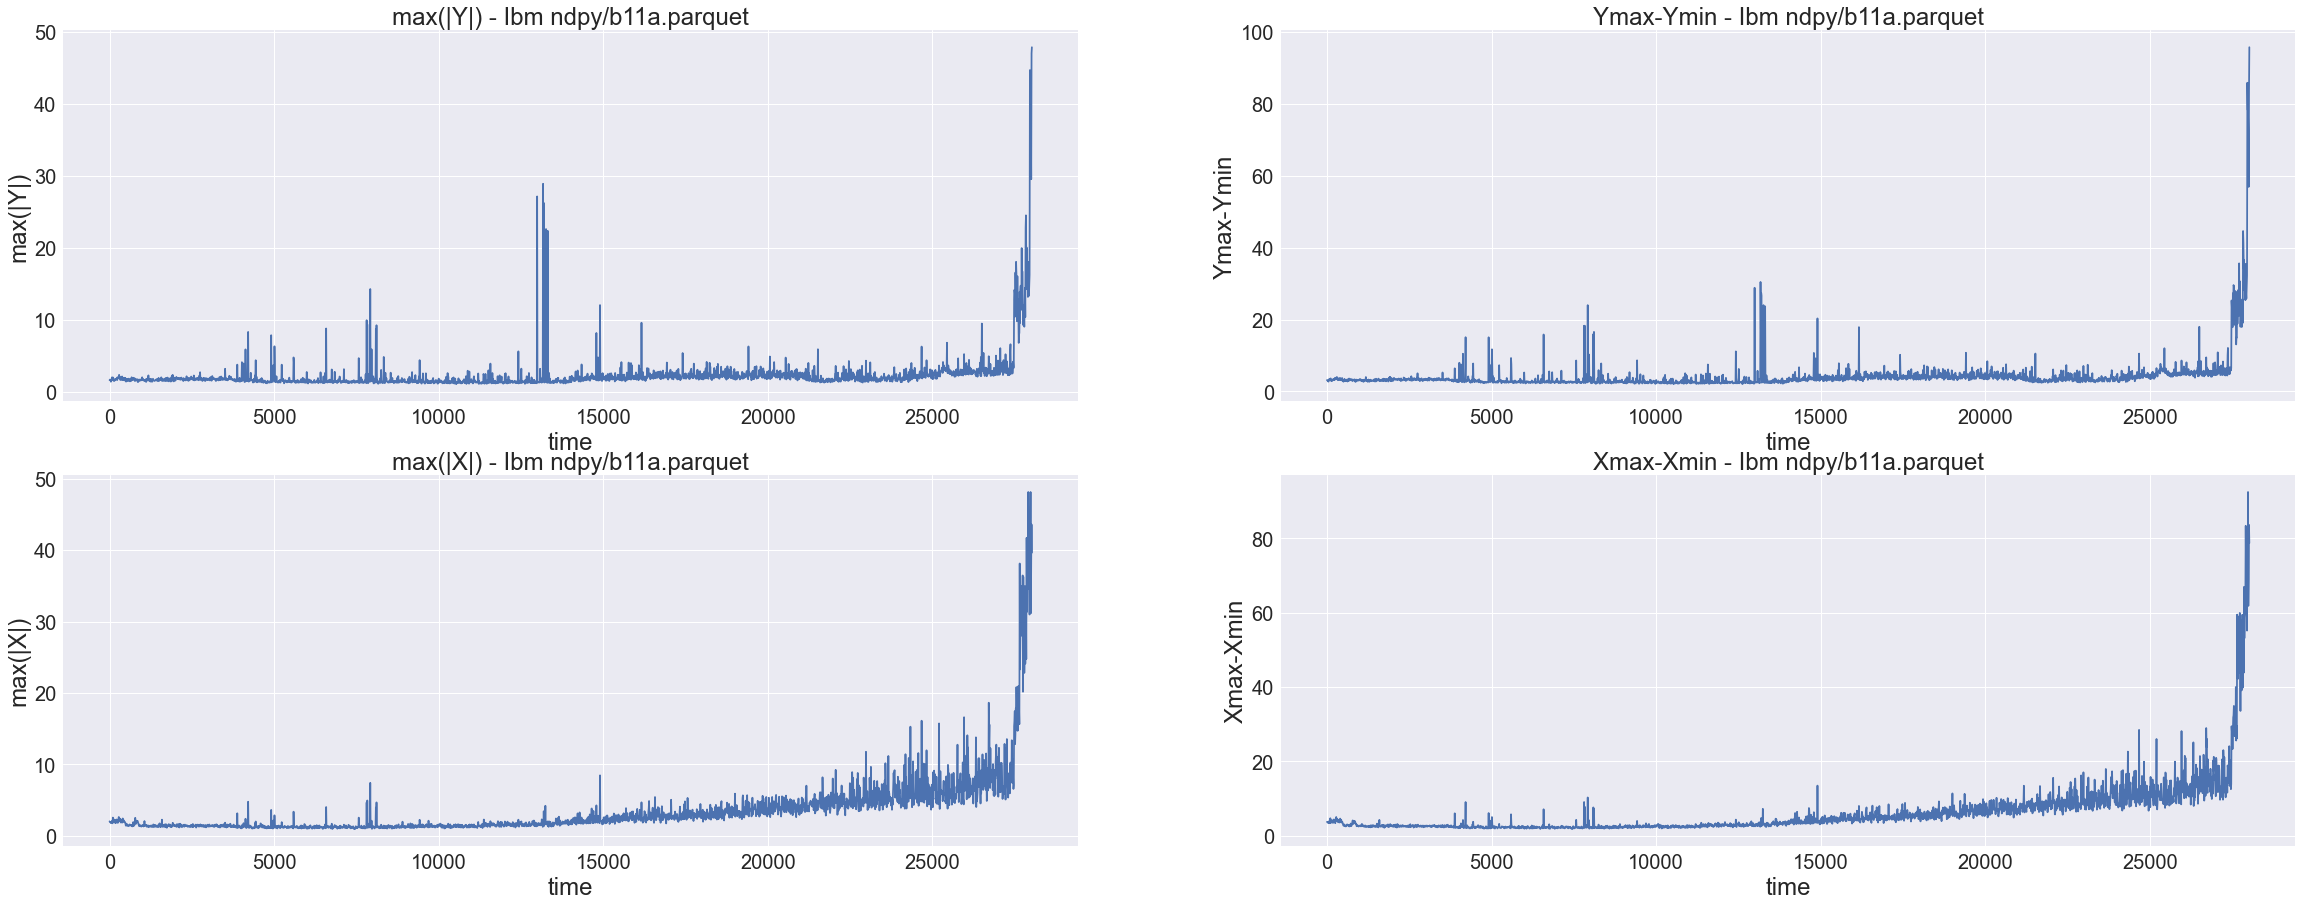

In [148]:
prefix='Ibm ndpy/b'
names2=[11]
from  pyspark.sql.functions import abs

for i in names2:
    fileName=prefix+str(i)+'a.parquet'
    df=spark.read.parquet(fileName)
    df=df.select(df.timeX,df.X,df.Y,df.id).orderBy(df.timeX)
    
    #x=df.groupBy(df.id).select(df.timeX).collect()    
    df_1=df.groupBy(df.id).agg(
        F.max(df.X).alias('Xmax'),
        F.min(df.X).alias('Xmin'),
        F.greatest(F.max(df.X),abs(F.min(df.X))).alias('Xabsmax'),
        (F.max(df.X)-F.min(df.X)).alias('delta'),
        (F.min(df.timeX)).alias('timeX')
        ).orderBy(df.id)
    df_2=df.groupBy(df.id).agg(
        F.max(df.Y).alias('Ymax'),
        F.min(df.Y).alias('Ymin'),
        F.greatest(F.max(df.Y),abs(F.min(df.Y))).alias('Yabsmax'),

        (F.max(df.Y)-F.min(df.Y)).alias('deltaY'),
        (F.min(df.timeX)).alias('timeX')
        ).orderBy(df.id) 
    
    
   
    #return Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp, fileName  
    
    
    

   

X=np.array(df_1.select(df_1.Xmax,df_1.Xmin,df_1.Xabsmax,df_1.timeX).collect())

Y=np.array(df_2.select(df_2.Ymax,df_2.Ymin,df_2.Yabsmax).collect())

Xmax=np.array(X[:,0])
Xmin=np.array(X[:,1])
Ymax=np.array(Y[:,0])
Ymin=np.array(Y[:,1])

Xabsmax=np.array(X[:,2])
Yabsmax=np.array(Y[:,2])
Xp=np.array(X[:,3])


funPlotAcc(Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp,fileName)






In [1]:
from pyspark.sql.functions import abs
prefix='Ibm ndpy/b'
names2=[12,21,22,31,32]

for i in names2:
    fileName=prefix+str(i)+'a.parquet'
    RUL2=leerDatosEnCloud(fileName,'ffy')
    pdfDataFromRUL=RUL2.toPandas()

    pdfDataFromRUL=pdfDataFromRUL.sort_values(by=['timeX'],ascending=True)
    pdfDataFromRUL=pdfDataFromRUL.reset_index(drop=True)
    print(fileName)
    Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp,fileName=funPlotAccData(pdfDataFromRUL,prefix+str(i))
    funPlotAcc(Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp,fileName)

NameError: name 'leerDatosEnCloud' is not defined

Positions where Xmax - Xmin > 20: (array([1597, 1623, 1624, 1625, 1626, 1628, 1629, 1630, 1631, 1632, 1633,
       1634, 1635, 1636]),)
Positions where Ymax - Ymin > 20: (array([ 141,  148,  151, 1453, 1597, 1624, 1625, 1628, 1630, 1631, 1632,
       1633, 1635, 1636]),)


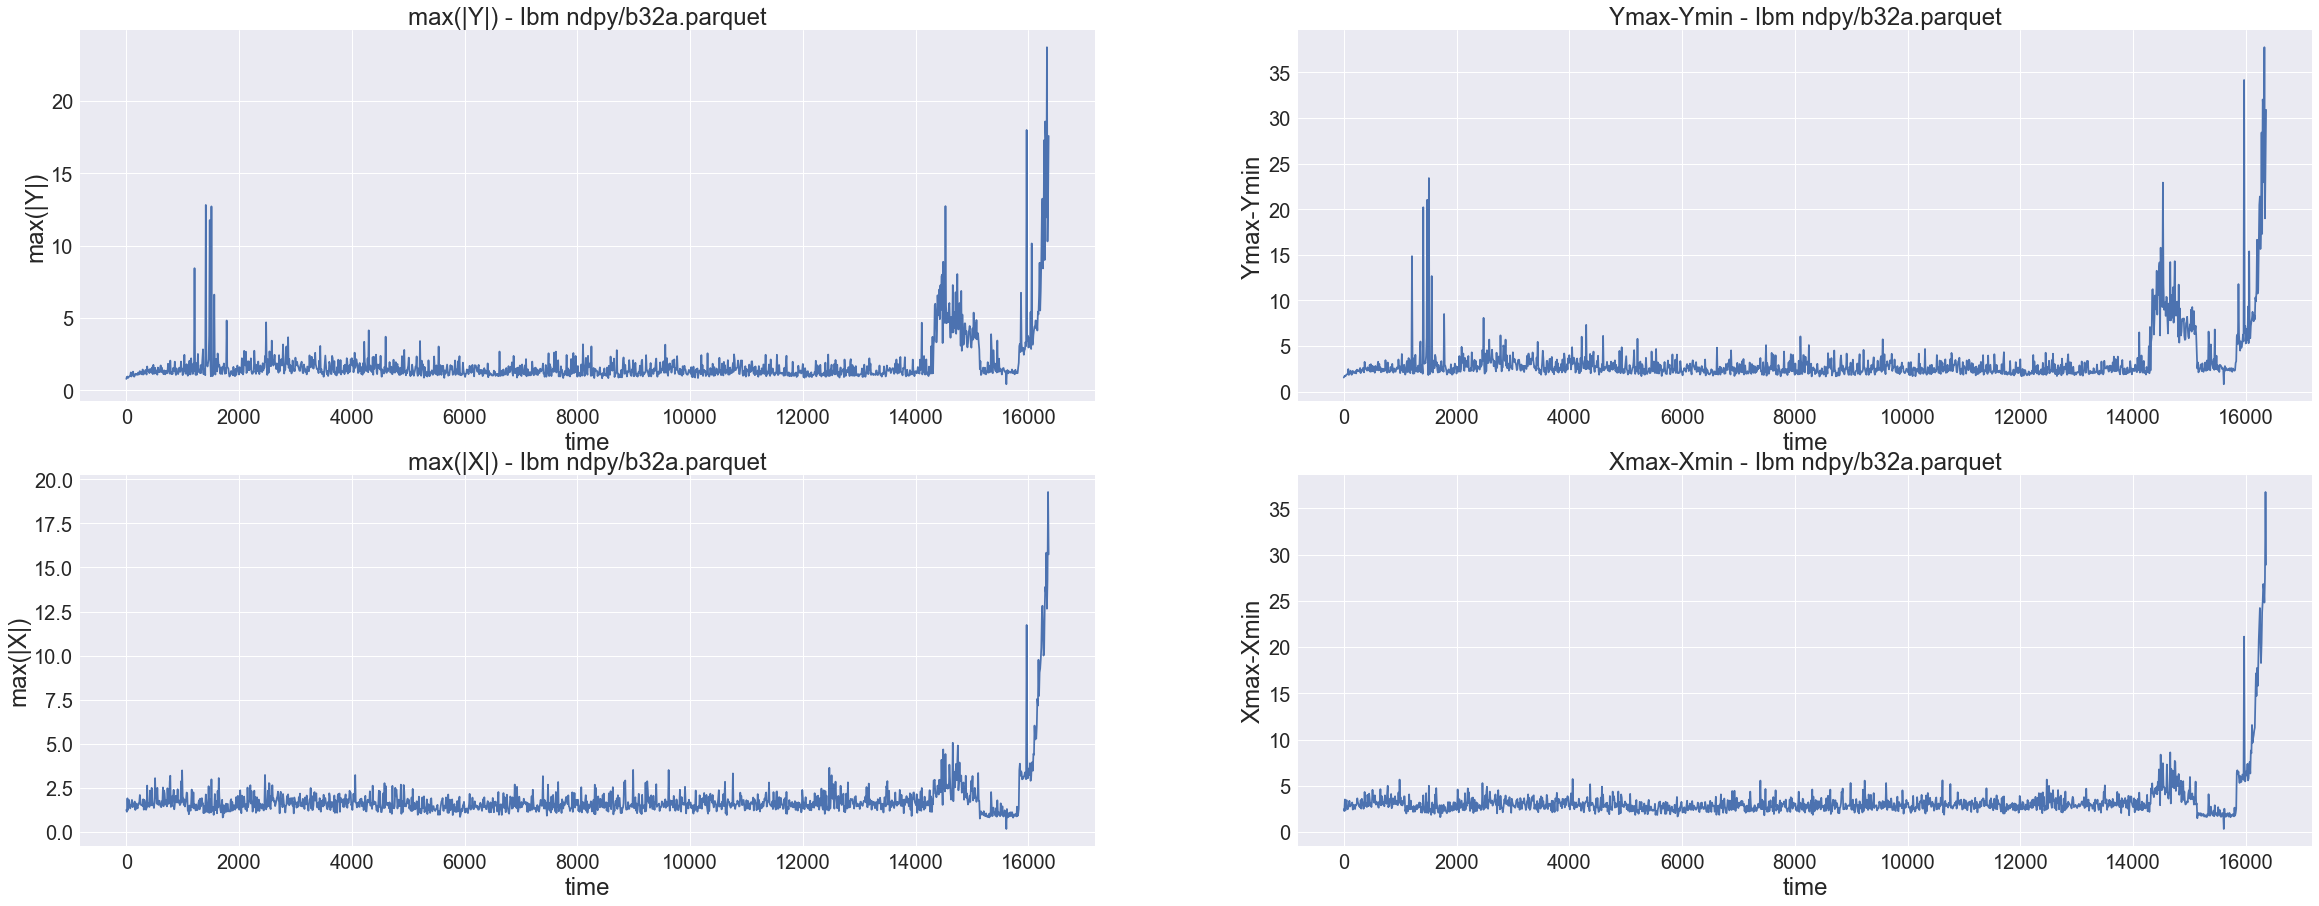

In [150]:
prefix='Ibm ndpy/b'
names2=[32]
from  pyspark.sql.functions import abs

for i in names2:
    fileName=prefix+str(i)+'a.parquet'
    df=spark.read.parquet(fileName)
    df=df.select(df.timeX,df.X,df.Y,df.id).orderBy(df.timeX)
    
    #x=df.groupBy(df.id).select(df.timeX).collect()    
    df_1=df.groupBy(df.id).agg(
        F.max(df.X).alias('Xmax'),
        F.min(df.X).alias('Xmin'),
        F.greatest(F.max(df.X),abs(F.min(df.X))).alias('Xabsmax'),
        (F.max(df.X)-F.min(df.X)).alias('delta'),
        (F.min(df.timeX)).alias('timeX')
        ).orderBy(df.id)
    df_2=df.groupBy(df.id).agg(
        F.max(df.Y).alias('Ymax'),
        F.min(df.Y).alias('Ymin'),
        F.greatest(F.max(df.Y),abs(F.min(df.Y))).alias('Yabsmax'),

        (F.max(df.Y)-F.min(df.Y)).alias('deltaY'),
        (F.min(df.timeX)).alias('timeX')
        ).orderBy(df.id) 
    
    
   
    #return Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp, fileName  
    
    
    

   

X=np.array(df_1.select(df_1.Xmax,df_1.Xmin,df_1.Xabsmax,df_1.timeX).collect())

Y=np.array(df_2.select(df_2.Ymax,df_2.Ymin,df_2.Yabsmax).collect())

Xmax=np.array(X[:,0])
Xmin=np.array(X[:,1])
Ymax=np.array(Y[:,0])
Ymin=np.array(Y[:,1])

Xabsmax=np.array(X[:,2])
Yabsmax=np.array(Y[:,2])
Xp=np.array(X[:,3])

funPlotAcc(Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp,fileName)


## Reparar archivo b11a y revisar en todos el orden id - timeX y solucionar problema para representación b11a y b32a

# B.- Leer archivos y preparar RUL2
Los resultados se guarda en bXXaRUL2a

In [ ]:
#leer archivo 
user='ffy'
#fileName='b11a2012'
fileName='b12a'


#RUL2=leerDatosEnCloud(fileName+'RUL2.parquet',user)
RUL2=ReadAndPrepare3(fileName,'ffy')

In [106]:
fileName='b14'
RUL2=ReadAndPrepare3(fileName,'ffy')

+---+---+---+--------+-------------------+--------------------+-------------+-------+
|  H|  m|  s|microseg|                  X|                   Y|         file|bearing|
+---+---+---+--------+-------------------+--------------------+-------------+-------+
| 10| 53| 20|425040.0|0.14300000000000002|               0.205|acc_00993.csv|     14|
| 10| 53| 20|425080.0|             -0.045|               0.317|acc_00993.csv|     14|
| 10| 53| 20|425120.0|             -0.121|               0.109|acc_00993.csv|     14|
| 10| 53| 20|425160.0|             -0.132|              -0.457|acc_00993.csv|     14|
| 10| 53| 20|425200.0|              -0.27|-0.01399999999999...|acc_00993.csv|     14|
| 10| 53| 20|425230.0|             -0.165|               0.366|acc_00993.csv|     14|
| 10| 53| 20|425270.0|              0.161|              -0.623|acc_00993.csv|     14|
| 10| 53| 20|425310.0|0.10400000000000001|               0.247|acc_00993.csv|     14|
| 10| 53| 20|425350.0|              0.138|            

Py4JJavaError: An error occurred while calling o221968.collectToPython.
: java.lang.OutOfMemoryError: Java heap space


In [15]:
#leer archivo - b11a paso 2
user='ffy'
#fileName='b11a2012'
fileName='b11a2012'
RUL2=ReadAndPrepare3(fileName,'ffy',3) #lee paso intermedio
escribirDatosEnCloud(RUL2,fileName+'RUL2a','parquet','ffy') 
escribirDatosEnCloud(RUL2,'b11a'+'RUL2a','parquet','ffy') 



b11a2012RAP3dfo.parquet read
+---+---+---+--------+--------------------+--------------------+-------------+------------+------------------+----+-------------------+----+
|  H|  m|  s|microseg|                   X|                   Y|         file|        time|             timeX|  id|                RUL|RUL2|
+---+---+---+--------+--------------------+--------------------+-------------+------------+------------------+----+-------------------+----+
| 17| 22|  9| 68554.0|  3.5239999999999996|-0.46399999999999997|acc_02776.csv|62529.068554|27802.202893999995|2776| -3420.002889999996| 0.0|
| 17| 22|  9| 68593.0|               1.364|              -0.258|acc_02776.csv|62529.068593|      27802.202933|2776| -3420.002929000002| 0.0|
| 17| 22|  9| 68632.0|               1.172|               0.579|acc_02776.csv|62529.068632|      27802.202972|2776|-3420.0029680000007| 0.0|
| 17| 22|  9| 68671.0|  0.6629999999999999| -0.7829999999999999|acc_02776.csv|62529.068671|27802.203010999998|2776|-3420.0030

In [14]:
#RUL2.show()

---


In [17]:
pdfDataFromRUL

DataFrame[H: bigint, m: bigint, s: bigint, microseg: double, X: double, Y: double, file: string, id: bigint, time: double, timeX: double, RUL: double, RUL2: double, bearing: string]

### Ejecución

#### Datos b11a

In [13]:
#Carga de b11a - paso 1
fileName='b11a2012'
df2=leerDatosEnCloud(fileName+'.parquet','ffy')
df2.show(10)


+---+---+---+--------+--------------------+--------------------+-------------+------------+------------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|        time|             timeX|
+---+---+---+--------+--------------------+--------------------+-------------+------------+------------------+
| 14| 50| 49| 99882.0|              -0.613|               0.153|acc_01868.csv|53449.099882|      18670.034218|
| 14| 50| 49| 99921.0|-0.37799999999999995|               0.256|acc_01868.csv|53449.099921|      18670.034257|
| 14| 50| 49| 99960.0|-0.29600000000000004|-0.02899999999999...|acc_01868.csv| 53449.09996|18670.034295999998|
| 14| 50| 49| 99999.0|               0.142|              -0.057|acc_01868.csv|53449.099999|18670.034334999997|
| 14| 50| 49|100040.0|              -0.741|  0.9640000000000001|acc_01868.csv| 53449.10004|18670.034375999996|
| 14| 50| 49|100080.0|              -0.198|               0.175|acc_01868.csv| 53449.10008|18670.034415999995|
|

In [19]:
#Carga de b11a - paso 2
dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time
dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
T0=dfo.rdd.map(lambda row: row.time)
time0=T0.first()
dfo=dfo.withColumn('timeX',dfo.time-time0)
#No funciona al ser un set de datos muy grande    
#dfo.createOrReplaceTempView('df')
#RUL=spark.sql("select timeX, X, Y from df where sqrt(X*X+Y*Y)>20")
#TimeFail=RUL.first().timeX
#Alternativa
RUL=dfo.selectExpr("sqrt(X*X+Y*Y)>20 as criteria","timeX", "X", "Y" )
#RUL=dfo.selectExpr("max(X)-min(X)>20 as criteria","timeX", "X", "Y" )
TimeFail=RUL.filter(RUL.criteria==True).first().timeX        
#    

dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)
#No funciona al ser un set de datos muy grande        
#dforul.createOrReplaceTempView('df')
#RUL2=spark.sql("select *, case when RUL> 0 then RUL else 0 end as RUL2 from df")
#RUL2=spark.sql("select *, case when timeX > -1 then "+'"'+fileName+'"'+" else "+'"'+fileName+'"'+" end as bearing from df")
#Alternativa
RUL2=dforul.selectExpr("*","case when RUL> 0 then RUL else 0 end as RUL2" )
RUL2=RUL2.selectExpr("*","case when timeX > -1 then '"'b11a'"' else '"'b11a'"' end as bearing" )   
#

    
RUL2=RUL2.withColumn('id',RUL2.file.substr(5,5).cast("integer"))

In [23]:
escribirDatosEnCloud(RUL2,fileName+'RUL2','parquet','ffy') 

b11a2012RUL2.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


### Empezar aquí con b12a
1. Leer datos

In [164]:
fileName='b21a'
pdfDataFromRUL=ReadAndPrepare2(fileName,'ffy')

NameError: name 'ReadAndPrepare2' is not defined

In [15]:
pdfDataFromRUL

NameError: name 'pdfDataFromRUL' is not defined

In [ ]:
print(fileName)
pdfDataFromRUL=ReadAndPrepare2(fileName,'ffy')

Positions where Xmax - Xmin > 20: (array([905, 906, 907, 908, 909]),)
Positions where Ymax - Ymin > 20: (array([506, 587, 609, 621, 629, 646, 820, 826, 835, 836, 837, 845, 847,
       849, 851, 852, 860, 866, 868, 869, 879, 905, 906, 907, 908, 909]),)


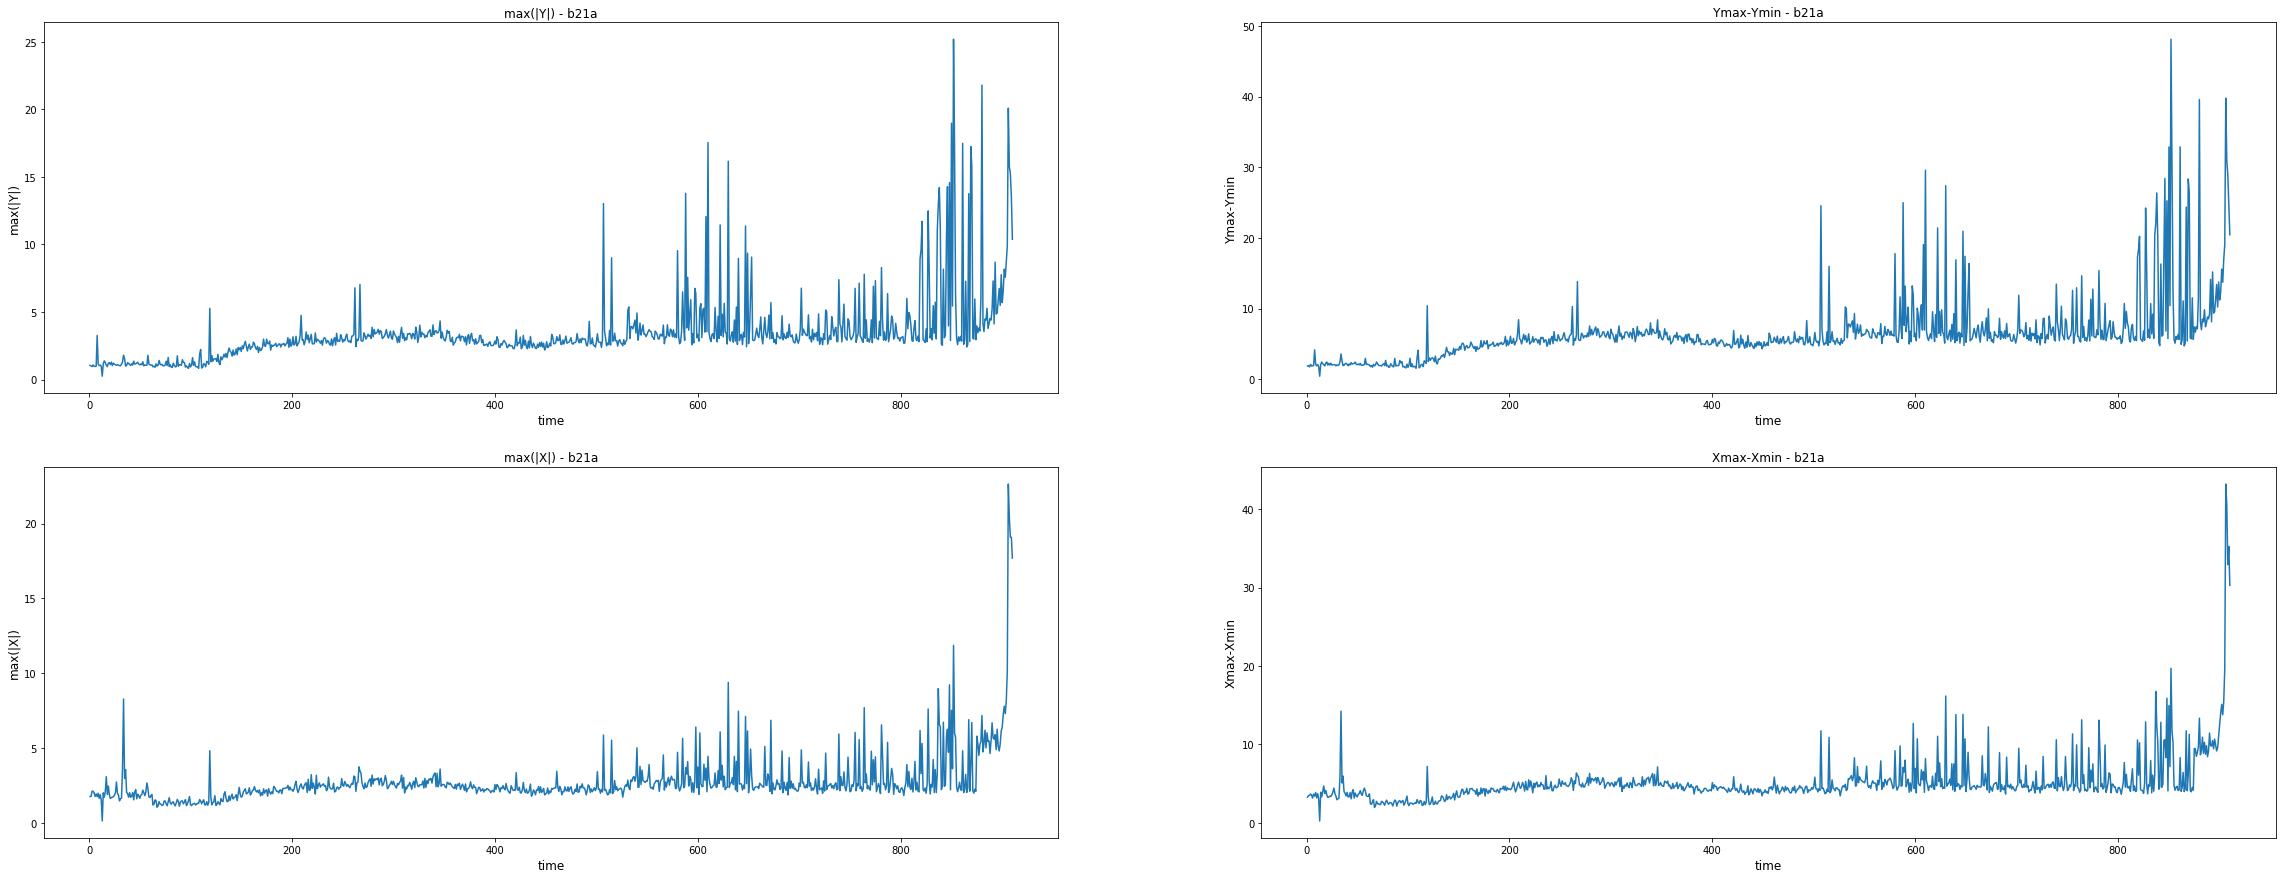

In [16]:
Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp =  funPlotAccData(pdfDataFromRUL,fileName)    
funPlotAcc(Xabsmax, Xmax, Xmin, Yabsmax, Ymax, Ymin, Xp)  

In [31]:
bearing=11
names=['1_3','1_5','1_6']
names2=[13,15,16]

j=1

#folder_path='/Users/fernando/OneDrive - Universidad de Burgos/Archivos/Anaconda/Capstone/'
#folder=folder_path+'FEMTOBearingDataSet/Test_set/Test_set/Bearing'+names[j]+'/'
fileName='b'+str(names2[j])+'.parquet'

pdfDataFromRUL=ReadAndPrepare2(fileName,'ffy')


NameError: name 'ReadAndPrepare2' is not defined

In [103]:
pdfDataFromRUL[pdfDataFromRUL.timeX<5139]
max(abs(pdfDataFromRUL[pdfDataFromRUL.id==515].X))

3.9560000000000004

In [104]:
pdfDataFromRUL[pdfDataFromRUL.id==490]

H   m  s  microseg      X      Y           file         time  \
1251840  10  32  9  118790.0  0.079  0.257  acc_00490.csv  37929.11879   
1251841  10  32  9  118830.0  0.087 -0.400  acc_00490.csv  37929.11883   
1251842  10  32  9  118870.0 -0.298 -0.629  acc_00490.csv  37929.11887   
1251843  10  32  9  118910.0 -0.249 -0.437  acc_00490.csv  37929.11891   
1251844  10  32  9  118940.0 -0.410 -0.701  acc_00490.csv  37929.11894   
1251845  10  32  9  118980.0 -0.542  0.132  acc_00490.csv  37929.11898   
1251846  10  32  9  119020.0 -0.461  0.631  acc_00490.csv  37929.11902   
1251847  10  32  9  119060.0 -0.343  0.345  acc_00490.csv  37929.11906   
1251848  10  32  9  119100.0  0.072  0.160  acc_00490.csv  37929.11910   
1251849  10  32  9  119140.0  0.355 -0.195  acc_00490.csv  37929.11914   
1251850  10  32  9  119180.0  0.480 -0.190  acc_00490.csv  37929.11918   
1251851  10  32  9  119220.0  0.328 -0.495  acc_00490.csv  37929.11922   
1251852  10  32  9  119260.0  0.271 -0.325  acc_00490.csv  37929.11926   
1251853  10  32  9  119300.0  0.262 -0.108  acc_00490.csv  37929.11930   
1251854  10  32  9  119340.0  0.010  0.766  acc_00490.csv  37929.11934   
1251855  10  32  9  119370.0  0.152  0.418  acc_00490.csv  37929.11937   
1251856  10  32  9  119410.0 -0.193  0.043  acc_00490.csv  37929.11941   
1251857  10  32  9  119450.0 -0.122  0.518  acc_00490.csv  37929.11945   
1251858  10  32  9  119490.0 -0.067 -0.090  acc_00490.csv  37929.11949   
1251859  10  32  9  119530.0 -0.007 -0.316  acc_00490.csv  37929.11953   
1251860  10  32  9  119570.0 -0.139 -0.364  acc_00490.csv  37929.11957   
1251861  10  32  9  119610.0 -0.153 -0.108  acc_00490.csv  37929.11961   
1251862  10  32  9  119650.0  0.031  0.222  acc_00490.csv  37929.11965   
1251863  10  32  9  119690.0  0.125 -0.115  acc_00490.csv  37929.11969   
1251864  10  32  9  119730.0 -0.126 -0.142  acc_00490.csv  37929.11973   
1251865  10  32  9  119760.0 -0.083  0.209  acc_00490.csv  37929.11976   
1251866  10  32  9  119800.0  0.320 -0.392  acc_00490.csv  37929.11980   
1251867  10  32  9  119840.0  0.039 -0.184  acc_00490.csv  37929.11984   
1251868  10  32  9  119880.0  0.199  0.027  acc_00490.csv  37929.11988   
1251869  10  32  9  119920.0 -0.011 -0.358  acc_00490.csv  37929.11992   
...      ..  .. ..       ...    ...    ...            ...          ...   
1254370  10  32  9  217620.0 -0.438 -0.007  acc_00490.csv  37929.21762   
1254371  10  32  9  217660.0 -0.067 -0.007  acc_00490.csv  37929.21766   
1254372  10  32  9  217700.0  0.021 -0.143  acc_00490.csv  37929.21770   
1254373  10  32  9  217730.0  0.035 -0.043  acc_00490.csv  37929.21773   
1254374  10  32  9  217770.0 -0.044  0.288  acc_00490.csv  37929.21777   
1254375  10  32  9  217810.0  0.052  0.172  acc_00490.csv  37929.21781   
1254376  10  32  9  217850.0 -0.105  0.114  acc_00490.csv  37929.21785   
1254377  10  32  9  217890.0  0.171  0.484  acc_00490.csv  37929.21789   
1254378  10  32  9  217930.0  0.059 -0.013  acc_00490.csv  37929.21793   
1254379  10  32  9  217970.0  0.167  0.041  acc_00490.csv  37929.21797   
1254380  10  32  9  218010.0  0.174 -0.023  acc_00490.csv  37929.21801   
1254381  10  32  9  218050.0  0.182 -0.060  acc_00490.csv  37929.21805   
1254382  10  32  9  218080.0  0.097 -0.387  acc_00490.csv  37929.21808   
1254383  10  32  9  218120.0 -0.011 -0.226  acc_00490.csv  37929.21812   
1254384  10  32  9  218160.0 -0.305  0.255  acc_00490.csv  37929.21816   
1254385  10  32  9  218200.0 -0.094  0.273  acc_00490.csv  37929.21820   
1254386  10  32  9  218240.0 -0.030  0.054  acc_00490.csv  37929.21824   
1254387  10  32  9  218280.0 -0.156  0.262  acc_00490.csv  37929.21828   
1254388  10  32  9  218320.0 -0.058  0.245  acc_00490.csv  37929.21832   
1254389  10  32  9  218360.0  0.223 -0.547  acc_00490.csv  37929.21836   
1254390  10  32  9  218400.0  0.371 -0.060  acc_00490.csv  37929.21840   
1254391  10  32  9  218440.0  0.193  0.577  acc_00490.csv  37929.21844   
1254392  10  3

##### Corregir el nombre del archivo en 

7

In [18]:
fileName='b22a'
RUL2=leerDatosEnCloud(fileName+'RUL2.parquet','ffy')
RUL2=RUL2.replace('b11a',fileName)
escribirDatosEnCloud(RUL2,fileName+'RUL22','parquet','ffy')

b22aRUL22.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


In [ ]:

escribirDatosEnCloud(RUL2,fileName+'RUL2','parquet','ffy')

In [16]:
fileName='b12a'
RUL2=leerDatosEnCloud(fileName+'RUL2.parquet','ffy') 
pdfDataFromRUL=RUL2.toPandas()
pdfDataFromRUL
#aunque el archivo está ordenado al leerlo lo desordena
pdfDataFromRUL=pdfDataFromRUL.sort_values(by=['timeX'],ascending=True)
pdfDataFromRUL=pdfDataFromRUL.reset_index(drop=True)



In [17]:

pdfDataFromRUL=pdfDataFromRUL.sort_values(by=['timeX'],ascending=True)
pdfDataFromRUL=pdfDataFromRUL.reset_index(drop=True)



In [17]:
from scipy import signal
def funEnvSpectrum(x,fs=2,ba1=0.25,ba2=0.875):
    """v1: 20-02-20
    """
    x=x-np.mean(x)
    b=signal.firwin(51,[ba1,ba2],pass_zero=False) 
    xBand=np.convolve(x,b,'same')
    xAn=signal.hilbert(xBand)
    xEnv=abs(xAn)
    xEnv=xEnv-np.mean(xEnv)
    N=xEnv.size
    xSpec=1/N*abs(fft(xEnv))
    fSpec=np.arange(0,N)/N*fs
    if N%2 ==0:
        fSpec=fSpec[0:int(N/2)]
        xSpec=xSpec[0:int(N/2)]
        xSpec[1:int(N/2)]=2*xSpec[1:int(N/2)]
    else:
        fSpec=fSpec[0:int((N+1)/2)]
        xSpec=xSpec[0:int((N+1)/2)]
        xSpec[1:]=2*xSpec[1:]
        
    return xEnv, fSpec, xSpec

In [55]:
x=pdfDataFromRUL[pdfDataFromRUL.id==600]['X']

In [56]:
a=np.array([1,2,3])
ser=x.to_numpy(dtype=np.ndarray)

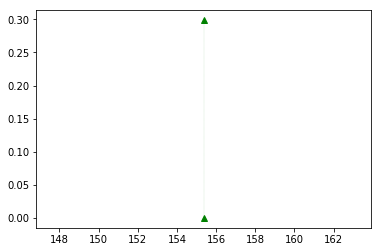

In [57]:
plt.plot(bpfoLines*i, yy,'g^--',linewidth=0.1 );

In [36]:
print(fileName)
Fs=25600


L1=4000/4000
L2=4200/4000
L3=5000/4000
n1=1800
n2=1650
n3=1500
if fileName[1]==1:
    n=n1
    L=L1
else:
    if fileName[1]==2:
        n=n2
        L=L2
    else:
        n=n3
        L=L3
fn=n/60
b1=5.6113*fn
b2=7.3887*fn
b3=7.1776*fn
b4=0.4316*fn
b=[fn,b1,b2,b3,b4]






b12a


In [19]:
pdfFeatures=pd.DataFrame({'Xfn','Xb1','Xb2','Xb3','Xb4','Xfnx2','Xb1x2',
                          'Xb2x2','Xb3x2','Xb4x2','Xfnx3','Xb1x3','Xb2x3','Xb3x3','Xb4x3',
                          'Xfnx4','Xb1x4','Xb2x4','Xb3x4','Xb4x4',
                          'Xfnx5','Xb1x5','Xb2x5','Xb3x5','Xb4x5',
                          'Yfn','Yb1','Yb2','Yb3','Yb4','YfnY2','Yb1Y2',
                          'Yb2Y2','Yb3Y2','Yb4Y2','YfnY3','Yb1Y3','Yb2Y3','Yb3Y3','Yb4Y3',
                          'YfnY4','Yb1Y4','Yb2Y4','Yb3Y4','Yb4Y4',
                          'YfnY5','Yb1Y5','Yb2Y5','Yb3Y5','Yb4Y5','n','L','bal','bah','RUL2','bearing','id'})
#max(fSpec[(fSpec>(b[1]-deltaf))&(fSpec<(b[1]+deltaf ))])
RUL2feature=pdfDataFromRUL.loc[0,'RUL2']
bearing=fileName
idMeasure=pdfDataFromRUL.loc[0,'id']



In [26]:
RUL2feature=pdfDataFromRUL.loc[0,'RUL2']
bearing=fileName

1270.0783599999995

In [31]:
i=100
pdfDataFromRUL[pdfDataFromRUL.id==i]['X']


253440    0.253
253441    0.459
253442    0.127
253443    0.115
253444    0.611
253445    0.234
253446    0.319
253447    0.676
253448    0.558
253449   -0.061
253450   -0.250
253451    0.058
253452    0.165
253453    0.237
253454    0.341
253455    0.338
253456   -0.140
253457   -0.542
253458   -0.619
253459   -0.039
253460    0.526
253461    0.512
253462    0.610
253463    0.535
253464    0.351
253465   -0.139
253466   -0.210
253467    0.147
253468    0.726
253469    0.553
          ...  
255970    0.119
255971   -0.112
255972   -0.075
255973   -0.041
255974    0.092
255975    0.155
255976    0.406
255977    0.307
255978    0.050
255979    0.161
255980   -0.188
255981    0.188
255982   -0.045
255983    0.437
255984    0.031
255985   -0.033
255986    0.060
255987    0.024
255988   -0.128
255989   -0.062
255990    0.402
255991    0.608
255992    0.213
255993    0.125
255994    0.202
255995    0.335
255996    0.225
255997    0.599
255998    0.694
255999    0.499
Name: X, Length: 2560, d

In [37]:
print(b)
ba=np.array([0.02,0.125])
b=np.array(b)
b0=b
b=np.append(b,2*b0)
b=np.append(b,3*b0)
b=np.append(b,4*b0)
b=np.append(b,5*b0)


[25.0, 140.2825, 184.7175, 179.44, 10.79]


array([ 25.    , 140.2825, 184.7175, 179.44  ,  10.79  ])

In [38]:
b

array([ 25.    , 140.2825, 184.7175, 179.44  ,  10.79  ,  50.    ,
       280.565 , 369.435 , 358.88  ,  21.58  ,  75.    , 420.8475,
       554.1525, 538.32  ,  32.37  , 100.    , 561.13  , 738.87  ,
       717.76  ,  43.16  , 125.    , 701.4125, 923.5875, 897.2   ,
        53.95  ])

In [62]:



def funExtractFeatures(xSpec,fSpec,b):
    deltaf=fSpec[1]-fSpec[0]
    features=[]
    Xp=[]

    for i in b:    
        index=np.where((fSpec>=(i-deltaf/2))&(fSpec<=(i+deltaf/2 )))
       
        xSpecMax=max(xSpec[index])
        #print(index, xSpecMax)    

        index=np.where((xSpec==xSpecMax))
        Xp=np.append(Xp,fSpec[index])
        features=np.append(features, xSpecMax)
    print(Xp, features)    
    return features, Xp

In [ ]:
ba=np.array([0.02,0.125])
b=np.array(b)
b0=b[:]
b=np.append(b,2*b0)
b=np.append(b,3*b0)
b=np.append(b,4*b0)
b=np.append(b,5*b0)

In [21]:
print('d',end=\r)

SyntaxError: unexpected character after line continuation character (<ipython-input-21-e6594cffd9d4>, line 1)

In [77]:

print(b)
featuresX=[]    
featuresY=[]
features=np.zeros(55)
bearing=fileName[1]+fileName[2]
for i in range(1,max(pdfDataFromRUL.id)+1):
    print(i, end=\n)
    x=pdfDataFromRUL[pdfDataFromRUL.id==i]['X']
    RUL2feature=pdfDataFromRUL[pdfDataFromRUL.id==i]['RUL2']
    RUL2feature=RUL2feature.iloc[0]
    #print(RUL2feature)
    #bearing=fileName
    idMeasure=i
    xEnv, fSpec, xSpec =funEnvSpectrum(x,Fs,ba1=ba[0],ba2=ba[1])
    featuresX, XpX=funExtractFeatures(xSpec,fSpec,b)
    
    x=pdfDataFromRUL[pdfDataFromRUL.id==i]['Y']
    xEnv, fSpec, xSpec =funEnvSpectrum(x,Fs,ba1=ba[0],ba2=ba[1])

    featuresY, XpY=funExtractFeatures(xSpec,fSpec,b)   
    featuresTmp=np.hstack((featuresX, featuresY,n,L,RUL2feature,bearing,i))
    print(featuresTmp.shape, end=\n))
    features=np.vstack((features,featuresTmp))
   
    
    

[ 25.     140.2825 184.7175 179.44    10.79    50.     280.565  369.435
 358.88    21.58    75.     420.8475 554.1525 538.32    32.37   100.
 561.13   738.87   717.76    43.16   125.     701.4125 923.5875 897.2
  53.95  ]
1
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.10425995 0.02759901 0.03056422 0.03056422 0.02032022 0.02224231
 0.01379597 0.0107205  0.01728162 0.00456867 0.01031122 0.01707257
 0.00942545 0.00494777 0.10425995 0.02933896 0.0240803  0.0094993
 0.02490522 0.02942806 0.07657476 0.00131818 0.00127354 0.01809773
 0.02224231]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01363127 0.00545284 0.00832117 0.00832117 0.00124379 0.00839579
 0.00480018 0.00167493 0.00220315 0.00823444 0.0120739  0.00565978
 0.00251466 0.00415349 0.01363127 0.0018069  0.00126912 0.00331713
 0.00539012 0.00346343 0.0050303  0.005

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01168606 0.01258085 0.01621189 0.01621189 0.00763802 0.00847268
 0.01596294 0.01491239 0.00141948 0.01168606 0.01910761 0.00616979
 0.01453261 0.00874147 0.01013187 0.04649665 0.00958927 0.00360329
 0.00619557 0.02538908 0.02561824 0.00753648 0.00372427 0.00831533
 0.00847268]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01067276 0.00918822 0.00485158 0.00485158 0.00241367 0.00591612
 0.00352762 0.00587625 0.00405098 0.00316872 0.00341125 0.00333182
 0.00363233 0.00198889 0.01067276 0.00189808 0.00263751 0.00265453
 0.00409059 0.00316991 0.0038208  0.00268275 0.00238776 0.00138604
 0.00591612]
(55,)
19
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02166094 0.01504136 0.02246803 0.02246803 

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02399102 0.01534979 0.01169617 0.01169617 0.01792994 0.01593715
 0.01550682 0.00508853 0.00520271 0.02399102 0.01492674 0.01387061
 0.00495227 0.00290855 0.01141958 0.002189   0.00547341 0.00428226
 0.00302453 0.00591068 0.01942762 0.00163807 0.01237712 0.00489628
 0.01593715]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00943676 0.00909292 0.00432942 0.00432942 0.00640469 0.01062596
 0.00403474 0.0073958  0.00382344 0.00943676 0.00486574 0.0028063
 0.00495056 0.00653113 0.00639191 0.00505183 0.00470238 0.0031894
 0.00257514 0.0037545  0.0111839  0.00516262 0.00212862 0.00120387
 0.01062596]
(55,)
36
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03630626 0.02336223 0.02044355 0.02044355 0.

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0388015  0.01526776 0.01265294 0.01265294 0.04211431 0.02386404
 0.02005418 0.01456731 0.00582643 0.02584934 0.05702493 0.00662447
 0.00107029 0.0062497  0.0388015  0.00561115 0.00494475 0.0016694
 0.00644089 0.02711088 0.02399209 0.01012079 0.00633882 0.00447153
 0.02386404]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00403558 0.00676338 0.00490763 0.00490763 0.0107094  0.00571926
 0.00690795 0.00218688 0.00358002 0.00254223 0.00596159 0.0026963
 0.00443063 0.00182842 0.00403558 0.0033268  0.00325016 0.0005956
 0.00261881 0.00750035 0.00771376 0.00131477 0.00261288 0.00508262
 0.00571926]
(55,)
53
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.03106352 0.03090191 0.03444962 0.03444962 0.0

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0750426  0.00715081 0.03647415 0.03647415 0.04513185 0.03541333
 0.02759027 0.00339438 0.02594941 0.02258899 0.07098713 0.00306189
 0.01590986 0.01159948 0.0750426  0.03349618 0.00447888 0.00260614
 0.00364828 0.03487944 0.04289597 0.00033722 0.00445217 0.00265616
 0.03541333]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [2.09782720e-02 1.31756776e-02 2.12219926e-02 2.12219926e-02
 1.01490353e-02 9.40209171e-05 4.54597221e-03 9.97187739e-03
 5.62001779e-03 7.77057973e-03 6.87985470e-03 5.70246874e-03
 5.75274768e-03 4.91718291e-04 2.09782720e-02 1.26517355e-02
 7.50225262e-03 1.12445362e-03 3.51041555e-03 1.00762060e-02
 1.38073694e-02 5.17633850e-03 3.09213516e-03 2.29884944e-03
 9.40209171e-05]
(55,)
70
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.


[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0530244  0.0014359  0.00819725 0.00819725 0.05419039 0.02203501
 0.01672321 0.0105019  0.00913014 0.0530244  0.01786993 0.02165777
 0.00535386 0.00750569 0.02958709 0.03283715 0.01027754 0.00990002
 0.00521552 0.03505774 0.01975383 0.00296545 0.00954954 0.00362862
 0.02203501]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01239927 0.00711487 0.00811286 0.00811286 0.0034003  0.00303365
 0.00232659 0.00865913 0.0039603  0.01239927 0.00928517 0.00119362
 0.00263036 0.00394263 0.01149866 0.00333369 0.00579934 0.00125373
 0.00244982 0.00439635 0.00882458 0.00072069 0.00295191 0.00077386
 0.00303365]
(55,)
87
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02706982 0.01075448 0.01607221 0.01607221 

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00481886 0.00962161 0.00165583 0.00165583 0.00969379 0.00333016
 0.00821288 0.00668592 0.00459839 0.00193904 0.01284548 0.00434314
 0.00176579 0.00431029 0.00481886 0.00981534 0.0043376  0.0012559
 0.00062601 0.0038983  0.01459641 0.00164603 0.00149926 0.00254107
 0.00333016]
(55,)
103
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.05613683 0.02921934 0.00710436 0.00710436 0.03885671 0.03468115
 0.00524014 0.00810501 0.02273612 0.01593851 0.03937775 0.00837734
 0.00062947 0.0127932  0.05613683 0.02214315 0.00762217 0.00260108
 0.01099723 0.03475324 0.03601668 0.01280641 0.00285975 0.00514221
 0.03468115]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01148051 0.01103134 0.01269858 0.01269858 

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.029113   0.01320386 0.01347637 0.01347637 0.02255511 0.01645666
 0.01142126 0.0107575  0.02437342 0.02101004 0.0193873  0.00894857
 0.00917817 0.01336855 0.029113   0.00905249 0.00254779 0.01486785
 0.01050276 0.01631875 0.02432127 0.01234382 0.00671818 0.00618779
 0.01645666]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00962477 0.00414816 0.00500036 0.00500036 0.00439529 0.00792945
 0.01265701 0.00315619 0.0038561  0.00962477 0.00769108 0.00437488
 0.00215656 0.0060624  0.00205899 0.00634757 0.00536371 0.00374985
 0.00552349 0.00419295 0.01214927 0.0042401  0.00390926 0.00267728
 0.00792945]
(55,)
121
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.04503247 0.01003265 0.01102388 0.01102388

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02262198 0.01954383 0.02265554 0.02265554 0.02394488 0.02115844
 0.01766256 0.01650968 0.0044455  0.00595008 0.03491606 0.01832257
 0.00869975 0.00252707 0.02262198 0.01428137 0.01549102 0.00553978
 0.00682401 0.01281181 0.01946238 0.01487038 0.0035345  0.00337153
 0.02115844]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00927519 0.0019009  0.01280261 0.01280261 0.01119912 0.01480119
 0.00860854 0.00394243 0.00228713 0.00857881 0.01448444 0.00211942
 0.00288099 0.00127094 0.00927519 0.01384507 0.00536786 0.00615487
 0.00078023 0.00396984 0.01361699 0.00305051 0.00263243 0.00322425
 0.01480119]
(55,)
138
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02432625 0.01181447 0.01018452 0.01018452

154
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.03767951 0.01092902 0.01314006 0.01314006 0.01746863 0.01234918
 0.02314015 0.00935653 0.01280503 0.00782552 0.02359602 0.00313761
 0.00532946 0.00176929 0.03767951 0.01069869 0.00796201 0.00090729
 0.00026449 0.01572815 0.0223621  0.00440039 0.00762653 0.0098936
 0.01234918]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00818034 0.01400978 0.01085617 0.01085617 0.0048467  0.00846163
 0.00097307 0.00561942 0.0084588  0.00552428 0.00676036 0.00366231
 0.00171861 0.00450549 0.00818034 0.00385591 0.00171777 0.00325157
 0.00312897 0.00818009 0.00895738 0.00603577 0.00348915 0.00197781
 0.00846163]
(55,)
155
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.04567878 0.01950003 0.01445817 0.01445

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00923732 0.01035751 0.0056542  0.0056542  0.00375208 0.01041928
 0.00632617 0.00392438 0.0093934  0.00522325 0.00557747 0.00350452
 0.00594936 0.00068597 0.00923732 0.00297282 0.00401146 0.00287974
 0.00161892 0.00658161 0.01028946 0.00620198 0.00130292 0.00285549
 0.01041928]
(55,)
171
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02716798 0.01881158 0.01465015 0.01465015 0.02252364 0.02305713
 0.00156951 0.02287411 0.00725793 0.02716798 0.01972907 0.01276801
 0.01328553 0.00723024 0.00689135 0.01395994 0.00309022 0.00382049
 0.00744235 0.00801388 0.01248462 0.00561354 0.01164817 0.00324881
 0.02305713]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0152813  0.00675496 0.00494683 0.00494683

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01102592 0.00936235 0.00522572 0.00522572 0.01152082 0.01092977
 0.00579609 0.0025588  0.0020854  0.0030322  0.01079337 0.0050509
 0.00061734 0.00160454 0.01102592 0.01719732 0.00331567 0.00356978
 0.00437349 0.01040279 0.01530601 0.00527073 0.00238795 0.00244814
 0.01092977]
(55,)
188
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02889845 0.00490469 0.01207686 0.01207686 0.0253964  0.00278398
 0.01742467 0.00663089 0.00525748 0.0149221  0.01856514 0.01031343
 0.0086768  0.00257285 0.02889845 0.00609395 0.00940446 0.00632073
 0.00210306 0.02870987 0.01794349 0.00344214 0.00545709 0.00309107
 0.00278398]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00452111 0.00524337 0.00796114 0.00796114 

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0281869  0.0109531  0.0129434  0.0129434  0.01486161 0.00987398
 0.00593394 0.00855161 0.00362006 0.01512457 0.02381267 0.0093242
 0.00641959 0.00947523 0.0281869  0.01405534 0.00589234 0.00529358
 0.00288835 0.01707714 0.00776974 0.00435204 0.00118297 0.00626861
 0.00987398]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00171737 0.01015158 0.00499704 0.00499704 0.00607455 0.01224084
 0.00335947 0.00383651 0.00506827 0.00169183 0.01245509 0.00573456
 0.00458921 0.0012956  0.00171737 0.00267206 0.00244303 0.00174687
 0.00490458 0.0109448  0.01159627 0.0008335  0.00078786 0.00173366
 0.01224084]
(55,)
206
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0216739  0.00580175 0.00655246 0.00655246 

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00546147 0.01232189 0.00229138 0.00229138 0.00172831 0.00264893
 0.00426283 0.00493757 0.00534277 0.0030523  0.00353041 0.00193187
 0.00326443 0.00602302 0.00546147 0.00232113 0.0047471  0.00335831
 0.00340733 0.00567144 0.00776709 0.00248268 0.00263778 0.00356565
 0.00264893]
(55,)
223
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02163357 0.0133935  0.01116575 0.01116575 0.02082005 0.0166463
 0.02270095 0.0117485  0.01464703 0.01053141 0.01386903 0.00437648
 0.00330027 0.00741485 0.02163357 0.03245839 0.00215389 0.00714935
 0.00878693 0.0084778  0.01750651 0.01272877 0.00731697 0.00460783
 0.0166463 ]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00954768 0.01182503 0.00545605 0.00545605 

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.04609621 0.00954155 0.03826503 0.03826503 0.01403573 0.02214201
 0.01622678 0.01137672 0.00346338 0.04609621 0.02602057 0.00898691
 0.01452728 0.00420881 0.01554464 0.02881051 0.00634642 0.00543423
 0.00675515 0.03151286 0.01990304 0.00195906 0.0033905  0.00221657
 0.02214201]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00835138 0.00531781 0.00641743 0.00641743 0.00577754 0.00490932
 0.00179405 0.00445354 0.00388185 0.00487763 0.01176039 0.00371542
 0.00137472 0.00155659 0.00835138 0.00557656 0.00145047 0.00114738
 0.00323463 0.00338782 0.00975699 0.00530026 0.00104043 0.00220472
 0.00490932]
(55,)
241
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03383972 0.02237073 0.02261555 0.02261555

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02404715 0.0252595  0.01156687 0.01156687 0.01428991 0.02325688
 0.01152209 0.00530275 0.01070901 0.01832904 0.02757939 0.00196368
 0.00511947 0.01358224 0.02404715 0.00573828 0.00714562 0.00687284
 0.00717996 0.01125673 0.02764033 0.00461806 0.00718011 0.00168247
 0.02325688]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01291394 0.00741473 0.00915256 0.00915256 0.0040825  0.00746957
 0.00311383 0.00382384 0.00716439 0.00569761 0.0073973  0.00340023
 0.00499871 0.00310271 0.01291394 0.00485775 0.00132483 0.00577869
 0.00262088 0.00571614 0.01166868 0.00498028 0.00230864 0.00286978
 0.00746957]
(55,)
258
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02604566 0.00941112 0.01265603 0.01265603

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03278451 0.00620394 0.02310783 0.02310783 0.00947897 0.04240848
 0.02189939 0.00787469 0.00968879 0.02148941 0.0300377  0.00902314
 0.00455928 0.01337898 0.03278451 0.02971508 0.01334543 0.00449934
 0.00533693 0.00624698 0.01666334 0.00813623 0.00809259 0.00176936
 0.04240848]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01476842 0.00886707 0.00891608 0.00891608 0.01143864 0.00980283
 0.00809629 0.00391746 0.00305618 0.01476842 0.0142498  0.00461206
 0.00605234 0.00404853 0.00878163 0.00676998 0.00167009 0.00148159
 0.00176954 0.00495518 0.00965698 0.00287046 0.00206766 0.00413408
 0.00980283]
(55,)
275
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00672561 0.00878167 0.01766477 0.01766477

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01342699 0.0083368  0.02544968 0.02544968 0.01235794 0.0141139
 0.0127919  0.01228798 0.01136407 0.01197446 0.02673533 0.00612816
 0.00991532 0.00691226 0.01342699 0.0029557  0.00775378 0.00427782
 0.01211074 0.01607816 0.0219874  0.01073218 0.00543389 0.00641282
 0.0141139 ]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01356894 0.00187797 0.00306608 0.00306608 0.00699564 0.01760637
 0.01163481 0.00691899 0.00257    0.00995543 0.00645043 0.0052554
 0.00175886 0.0017898  0.01356894 0.00348952 0.00232048 0.00256997
 0.00475014 0.0064577  0.01711997 0.00184618 0.00236068 0.00178879
 0.01760637]
(55,)
292
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02736543 0.01312141 0.00552004 0.00552004 0

303
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01705812 0.00530849 0.00643699 0.00643699 0.02869577 0.02696955
 0.03588437 0.00501018 0.0055181  0.01009923 0.02754347 0.01469011
 0.00557771 0.00924196 0.01705812 0.01016712 0.00694057 0.00882781
 0.00447123 0.00580536 0.03397873 0.00567104 0.00101763 0.00316584
 0.02696955]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01704809 0.01293507 0.01516551 0.01516551 0.00952664 0.0060527
 0.00464468 0.00304525 0.00691346 0.00152725 0.00981404 0.00368915
 0.00847596 0.00246114 0.01704809 0.00105115 0.00292169 0.00114861
 0.00689161 0.00954879 0.01740915 0.00153631 0.0016791  0.0054006
 0.0060527 ]
(55,)
304
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01838569 0.01115867 0.01292063 0.012920

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00668819 0.00256191 0.003769   0.003769   0.00178518 0.00481361
 0.0052402  0.00274791 0.00568437 0.0010876  0.01340217 0.00303129
 0.00159367 0.0055097  0.00668819 0.00850269 0.00155758 0.00381224
 0.00456505 0.01367997 0.01026608 0.00385719 0.00282911 0.0011453
 0.00481361]
(55,)
314
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02342282 0.02074916 0.01120555 0.01120555 0.02004883 0.02631051
 0.00912052 0.00986689 0.0168975  0.02342282 0.01864333 0.01141611
 0.00746441 0.00304576 0.01601131 0.00549726 0.00377931 0.00452504
 0.00677106 0.01450573 0.01954079 0.00725128 0.00429281 0.00652402
 0.02631051]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00867446 0.00892482 0.00962945 0.00962945 

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.04703775 0.03307786 0.0205526  0.0205526  0.02206788 0.0257462
 0.00496033 0.01366729 0.02146081 0.02243366 0.03238455 0.00701258
 0.00105573 0.00935205 0.04703775 0.01935079 0.01103275 0.00620384
 0.0035832  0.03115696 0.02106637 0.00421963 0.0089006  0.00856914
 0.0257462 ]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00926922 0.00511912 0.00297224 0.00297224 0.0139776  0.00999309
 0.00377013 0.00274068 0.00260145 0.00493705 0.00547128 0.00131699
 0.00082494 0.00208043 0.00926922 0.00299337 0.00337285 0.00351743
 0.00206256 0.0040724  0.01160595 0.0035825  0.00088296 0.00295034
 0.00999309]
(55,)
325
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02327861 0.0177629  0.01109218 0.01109218 

 0.00379527]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00753467 0.00604312 0.0011707  0.0011707  0.00892682 0.0028964
 0.00830507 0.00309732 0.0026903  0.00524983 0.00520744 0.00487135
 0.00225053 0.00312829 0.00753467 0.00796463 0.00587797 0.00347165
 0.00561508 0.00568687 0.00928978 0.00423486 0.00619429 0.0065276
 0.0028964 ]
(55,)
335
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02511052 0.03161258 0.01738215 0.01738215 0.01556199 0.01556047
 0.00856583 0.01830259 0.00476869 0.01307102 0.02322957 0.01545114
 0.01449362 0.00579013 0.02511052 0.00979609 0.00224491 0.00044583
 0.00767773 0.03424605 0.01548051 0.00931002 0.00705506 0.00542402
 0.01556047]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0055898  0.00257535 0.00410414

  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02443555 0.00915919 0.00306885 0.00306885 0.02367099 0.02262432
 0.01029041 0.00540682 0.01334302 0.01612262 0.02309542 0.00272442
 0.00506047 0.01096199 0.02443555 0.00586492 0.01129063 0.00114137
 0.00449677 0.02682073 0.01613135 0.00078036 0.00651637 0.00064991
 0.02262432]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01339041 0.01622813 0.01009893 0.01009893 0.01074901 0.00992982
 0.00628468 0.00333713 0.00337875 0.01339041 0.00256983 0.00309093
 0.00113789 0.00521231 0.01055786 0.00527618 0.00600721 0.00448073
 0.00343321 0.01208289 0.01311853 0.00304787 0.00279026 0.00218056
 0.00992982]
(55,)
347
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02040832 0.02072643 0.00528741 0.00528741 0.01601537 0.01992665
 0.01160492 0.00111052 0.005997   0.00839054 0.0

  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00160167 0.00375385 0.00598262 0.00598262 0.00640043 0.01008471
 0.0099665  0.00669402 0.00279638 0.00160167 0.00436529 0.00573239
 0.00437304 0.00804378 0.00075545 0.00986252 0.00346585 0.00274033
 0.00381048 0.0050292  0.00951882 0.00651371 0.00395594 0.0011865
 0.01008471]
(55,)
358
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02012649 0.01283959 0.01624995 0.01624995 0.02300781 0.01143513
 0.00401124 0.00261997 0.01394824 0.02012649 0.01264417 0.00328927
 0.0028043  0.00100898 0.00301302 0.01688726 0.00739176 0.00675603
 0.00411536 0.02089264 0.02025872 0.00456373 0.00608554 0.00318745
 0.01143513]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00488193 0.00426206 0.00903164 0.00903164 0.01245913 0.0082397
 0.00501162 0.00632129 0.00803175 0.00488193 0.005

369
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00702081 0.00875622 0.00360673 0.00360673 0.01122833 0.01201381
 0.01876175 0.01447595 0.01025312 0.00246816 0.0234769  0.00808385
 0.00866251 0.00771265 0.00702081 0.02796523 0.00385655 0.00463931
 0.00143759 0.00879401 0.02074314 0.00224531 0.00191495 0.00182347
 0.01201381]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00753761 0.00234951 0.00418519 0.00418519 0.01375108 0.00115273
 0.00944978 0.00466992 0.00443022 0.00751612 0.01010661 0.00858986
 0.0027931  0.00279568 0.00753761 0.0073667  0.00262525 0.00548737
 0.00211914 0.00575668 0.00493028 0.00219572 0.00086157 0.00060245
 0.00115273]
(55,)
370
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02678125 0.00812907 0.02367727 0.0236

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01852174 0.01378708 0.00556786 0.00556786 0.00704728 0.00471579
 0.00474412 0.00827991 0.00608966 0.01296277 0.00840522 0.00184912
 0.00421725 0.00094541 0.01852174 0.00320941 0.00520449 0.00696308
 0.00625703 0.00546543 0.01328496 0.00081584 0.00238792 0.00272583
 0.00471579]
(55,)
380
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01169276 0.02030967 0.00400904 0.00400904 0.00507147 0.01383335
 0.00507041 0.00393979 0.00564893 0.01169276 0.0071302  0.00550283
 0.00581556 0.00115269 0.00185802 0.00499816 0.0108968  0.0039354
 0.00671901 0.00679607 0.01534644 0.00174472 0.00137166 0.00089499
 0.01383335]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00713498 0.00478654 0.00432083 0.00432083 

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01776448 0.00679537 0.0201299  0.0201299  0.02269988 0.01055462
 0.01830348 0.011795   0.01243793 0.01776448 0.03028102 0.01491507
 0.00941557 0.00497073 0.01628161 0.01239369 0.01074833 0.00110008
 0.00320728 0.02242691 0.01397095 0.00586318 0.00455189 0.00746029
 0.01055462]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00898224 0.00571957 0.01007684 0.01007684 0.01209698 0.00954015
 0.00702296 0.00692523 0.00345343 0.00898224 0.01699987 0.00376136
 0.00179413 0.00162071 0.00897833 0.00382664 0.00489389 0.00256749
 0.00589329 0.01020013 0.0157427  0.00440115 0.00287064 0.00246313
 0.00954015]
(55,)
392
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02947419 0.00173556 0.00938532 0.00938532

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00162813 0.00866443 0.00176606 0.00176606 0.00144796 0.00587479
 0.0004318  0.00204884 0.00236848 0.00119825 0.00562949 0.00455507
 0.00216435 0.00571225 0.00162813 0.0034681  0.00456679 0.00116521
 0.00075699 0.00201161 0.00492222 0.00393288 0.00278879 0.00264664
 0.00587479]
(55,)
403
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02907011 0.01776877 0.01318163 0.01318163 0.00442124 0.00846568
 0.00728492 0.00621659 0.00850716 0.01656987 0.01007317 0.00715483
 0.00206123 0.00861986 0.02907011 0.01453182 0.00966751 0.00044681
 0.00770691 0.00474367 0.03400953 0.00549145 0.01285677 0.00680568
 0.00846568]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0042509  0.00195805 0.00778448 0.00778448

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02060432 0.02784874 0.01186425 0.01186425 0.0250552  0.02517912
 0.00576832 0.00272551 0.00913741 0.01231293 0.02336122 0.00462596
 0.01100883 0.01335972 0.02060432 0.0143564  0.00325396 0.00203505
 0.00469277 0.00745851 0.01486651 0.00617219 0.00757867 0.00660548
 0.02517912]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01052137 0.008577   0.00821107 0.00821107 0.00956337 0.00492908
 0.00436142 0.00590369 0.0091986  0.00566967 0.01227309 0.00352976
 0.00107363 0.00720014 0.01052137 0.00340988 0.00478314 0.00155133
 0.00541007 0.00104023 0.00992436 0.00257804 0.0013537  0.00192861
 0.00492908]
(55,)
415
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02930867 0.007019   0.01064526 0.01064526

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01249636 0.01968911 0.01452137 0.01452137 0.01846029 0.02429968
 0.01539125 0.01936583 0.004844   0.01249636 0.02188392 0.01173338
 0.00500205 0.00622457 0.00775496 0.00775015 0.00667047 0.00586084
 0.00181118 0.0244902  0.01690312 0.00890649 0.01081545 0.00568785
 0.02429968]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00574524 0.00350592 0.00543083 0.00543083 0.00692353 0.00610069
 0.00215743 0.00424613 0.00764834 0.00574524 0.00655516 0.00280877
 0.00340525 0.00197274 0.00141808 0.00715708 0.00297899 0.0022498
 0.00134375 0.00850435 0.00725581 0.0007676  0.0039617  0.00087439
 0.00610069]
(55,)
427
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02196444 0.01384049 0.01195605 0.01195605 

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02571684 0.0160216  0.00653254 0.00653254 0.04384331 0.02054465
 0.00429    0.01000304 0.00984888 0.00901817 0.02681644 0.00805446
 0.00592038 0.01465098 0.02571684 0.02035211 0.0065751  0.00396749
 0.00403485 0.03199926 0.03087539 0.00564863 0.00461624 0.00456665
 0.02054465]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0078796  0.00943542 0.00682284 0.00682284 0.01147092 0.00580573
 0.00231814 0.00876216 0.0019867  0.00347097 0.01165781 0.00221142
 0.0049602  0.00229916 0.0078796  0.00247921 0.00357827 0.00183921
 0.0046234  0.00350235 0.01424775 0.00393244 0.00402026 0.00258255
 0.00580573]
(55,)
439
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0354437  0.01625575 0.01323029 0.01323029

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01243887 0.01315137 0.00499852 0.00499852 0.00839102 0.00895067
 0.0040369  0.00361659 0.0042998  0.01004486 0.00261155 0.00337661
 0.00174476 0.00435316 0.01243887 0.00881492 0.00096503 0.002679
 0.00300322 0.00850507 0.01950535 0.00532127 0.00496422 0.00398232
 0.00895067]
(55,)
449
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01979125 0.00562542 0.0073203  0.0073203  0.01657369 0.01433625
 0.00620438 0.00106553 0.00480035 0.01121157 0.0176377  0.00898511
 0.00861673 0.01062305 0.01979125 0.0170958  0.00552765 0.00659707
 0.00322746 0.0095051  0.02121184 0.00535716 0.00481988 0.00485911
 0.01433625]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0078183  0.01183092 0.00497513 0.00497513 0

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01292229 0.01027692 0.00750989 0.00750989 0.0091343  0.00962659
 0.00593418 0.00360903 0.00555052 0.00496325 0.00880068 0.00344349
 0.00507669 0.00318691 0.01292229 0.00102975 0.00229483 0.0017692
 0.00273284 0.0102036  0.01147843 0.00486384 0.00158399 0.00146817
 0.00962659]
(55,)
459
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0354555  0.01107089 0.01159154 0.01159154 0.03342365 0.0029307
 0.00443876 0.01472621 0.01527988 0.00785463 0.02880504 0.00537814
 0.0067555  0.00332433 0.0354555  0.01018029 0.00535635 0.00832865
 0.00452473 0.03182229 0.02060182 0.00986056 0.0052917  0.00335596
 0.0029307 ]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02262139 0.00712391 0.00620068 0.00620068 0

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01602876 0.0109013  0.0191277  0.0191277  0.02146376 0.01763875
 0.00792632 0.00589675 0.01099308 0.00278161 0.01794495 0.01032381
 0.00150386 0.01024258 0.01602876 0.01093657 0.01128138 0.00206161
 0.00321523 0.01081655 0.01538262 0.0030205  0.00246968 0.00115182
 0.01763875]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00385917 0.00279466 0.00718092 0.00718092 0.00767509 0.00919803
 0.00683193 0.0010167  0.00166158 0.00385917 0.00626477 0.00442864
 0.00205621 0.00140185 0.00238215 0.00820406 0.00366139 0.00066987
 0.0033706  0.00605185 0.01125326 0.00542138 0.0004389  0.00216041
 0.00919803]
(55,)
471
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02494181 0.02376371 0.00960716 0.00960716

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03016382 0.01498651 0.01226031 0.01226031 0.01766112 0.00663243
 0.02311984 0.01357749 0.01388776 0.00618225 0.01399016 0.00242458
 0.00243723 0.00677805 0.03016382 0.0207567  0.00327638 0.00511698
 0.00677026 0.0284317  0.02078398 0.00605257 0.00301033 0.00283975
 0.00663243]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01153837 0.00512984 0.00946455 0.00946455 0.00931866 0.00544421
 0.00165375 0.00185698 0.00887316 0.00650084 0.00468619 0.00519655
 0.00339578 0.00147962 0.01153837 0.01256229 0.00605151 0.00404141
 0.00350009 0.00644094 0.01285206 0.00265396 0.00307192 0.00410213
 0.00544421]
(55,)
481
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0178305  0.02085213 0.01118342 0.01118342

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01316368 0.01749192 0.00870705 0.00870705 0.00717928 0.01863808
 0.00663665 0.01155166 0.00993463 0.01316368 0.02217172 0.01308812
 0.00334463 0.00425963 0.0100288  0.0150002  0.0030903  0.00896543
 0.01073271 0.01300583 0.02524809 0.01425969 0.00344696 0.00309804
 0.01863808]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02063992 0.01155733 0.00525203 0.00525203 0.00653477 0.00877498
 0.00360706 0.00663279 0.00343441 0.02063992 0.01577489 0.00206012
 0.00620922 0.00459665 0.01582531 0.0071806  0.00405078 0.00274931
 0.00234871 0.01239902 0.01324139 0.00382382 0.00304221 0.00055962
 0.00877498]
(55,)
492
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02446459 0.00795218 0.01605672 0.01605672

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.03467019 0.01710941 0.00736981 0.00736981 0.00245768 0.01935158
 0.01264714 0.00152475 0.00432245 0.03467019 0.037078   0.01162417
 0.00926669 0.01027027 0.01701963 0.00740791 0.0063474  0.01503328
 0.00610091 0.02381942 0.01119461 0.00516925 0.00605349 0.00522887
 0.01935158]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00434917 0.00572798 0.00250724 0.00250724 0.00964261 0.00408066
 0.00364749 0.00426648 0.00336471 0.0023815  0.01279717 0.00741102
 0.00419582 0.00078332 0.00434917 0.00213405 0.00199059 0.00343472
 0.00440429 0.00264426 0.00172934 0.00187286 0.00320853 0.00250445
 0.00408066]
(55,)
503
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01595533 0.01117935 0.00865553 0.00865553

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01009629 0.00611468 0.00466524 0.00466524 0.00096607 0.00858301
 0.00788769 0.00786335 0.00496735 0.00857355 0.00855002 0.00161076
 0.00594034 0.00202297 0.01009629 0.00531337 0.00512535 0.00214496
 0.00334158 0.00763238 0.00434667 0.00286289 0.00309654 0.00249454
 0.00858301]
(55,)
513
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00703345 0.00693373 0.01866932 0.01866932 0.0255553  0.01904767
 0.00943904 0.01214646 0.0093804  0.00405101 0.03301621 0.00648057
 0.01195503 0.00769708 0.00703345 0.01658088 0.00586163 0.00528199
 0.00668812 0.04527866 0.03032573 0.00657532 0.00191005 0.0051375
 0.01904767]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00795281 0.00811867 0.00487822 0.00487822 

523
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01353674 0.00916268 0.02914012 0.02914012 0.03296482 0.02533157
 0.00950637 0.01544723 0.0054196  0.01353674 0.02632661 0.01223717
 0.01308105 0.00148755 0.00278141 0.020468   0.00803648 0.00846045
 0.01607929 0.02008125 0.0258293  0.00960989 0.0010449  0.00420361
 0.02533157]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00832433 0.00446621 0.0109089  0.0109089  0.01256491 0.00930382
 0.00748406 0.0069524  0.00803727 0.00832433 0.01273219 0.00710759
 0.00365204 0.00273485 0.0075619  0.00343604 0.00104195 0.00203123
 0.00216182 0.00534736 0.01853984 0.0030218  0.0019618  0.00234107
 0.00930382]
(55,)
524
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02120899 0.00919197 0.00819138 0.0081

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00348094 0.01288314 0.00182499 0.00182499 0.01249961 0.00447396
 0.00730658 0.00731136 0.00609477 0.00348094 0.00294871 0.00241557
 0.00528034 0.00218589 0.00278057 0.00722203 0.00215031 0.00320844
 0.00315505 0.0047928  0.01413021 0.00411764 0.00514433 0.00381641
 0.00447396]
(55,)
535
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01634484 0.01851971 0.02591868 0.02591868 0.01576743 0.01201295
 0.00838166 0.00649151 0.00197199 0.01634484 0.01847557 0.00672309
 0.00875149 0.00146804 0.01209963 0.02025886 0.00373162 0.00735168
 0.0036956  0.01879111 0.0188761  0.00539473 0.00371194 0.00273307
 0.01201295]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00780006 0.00439417 0.00215037 0.00215037

  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01425101 0.00922428 0.01040274 0.01040274 0.01140225 0.01994915
 0.00805639 0.00046868 0.00178934 0.01425101 0.01877644 0.00321495
 0.00745852 0.00159035 0.01018915 0.00818905 0.00654721 0.00128755
 0.00030874 0.00340164 0.01094751 0.00193876 0.00324646 0.0029553
 0.01994915]
(55,)
546
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.05225978 0.01435815 0.0330882  0.0330882  0.03395721 0.02508256
 0.01356701 0.00684494 0.00735362 0.04871394 0.0258422  0.00745471
 0.00501343 0.01067886 0.05225978 0.02012912 0.00237558 0.00676992
 0.00113362 0.01206791 0.0212453  0.00374431 0.00419106 0.00302145
 0.02508256]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01662281 0.00466583 0.00178657 0.00178657 0.01086819 0.0019586
 0.00246846 0.00987642 0.00581545 0.00768324 0.007

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.04850403 0.02087837 0.00588941 0.00588941 0.00018346 0.01478899
 0.0047636  0.01648011 0.00381323 0.0181806  0.04036756 0.00461734
 0.00124199 0.01237664 0.04850403 0.0034936  0.00698327 0.00250824
 0.00312893 0.04448847 0.0343228  0.00636421 0.00706147 0.00635538
 0.01478899]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00385794 0.00595792 0.0093175  0.0093175  0.00461776 0.00293682
 0.00659769 0.00418194 0.00369514 0.00385794 0.00756567 0.00458454
 0.0033361  0.00274702 0.00087096 0.0038864  0.00412222 0.00122645
 0.00355528 0.00684489 0.00808134 0.004196   0.00218565 0.00387559
 0.00293682]
(55,)
557
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01169967 0.00621874 0.00668026 0.00668026

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.05430006 0.00755275 0.02547468 0.02547468 0.03198856 0.0137174
 0.01517544 0.01903769 0.02301188 0.028104   0.02853753 0.01455695
 0.00721211 0.01571408 0.05430006 0.01881259 0.02144482 0.00907056
 0.01016194 0.03277594 0.04029432 0.01036301 0.00539926 0.0012654
 0.0137174 ]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00710364 0.00548286 0.00117544 0.00117544 0.00645184 0.00666316
 0.00258311 0.00871807 0.00351307 0.00710364 0.00599691 0.00265812
 0.00429402 0.00551241 0.00536263 0.00466387 0.00196041 0.00463201
 0.00238236 0.01559306 0.00631582 0.0010633  0.0031547  0.00450769
 0.00666316]
(55,)
568
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02929206 0.01290614 0.01588346 0.01588346 0

577
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01682721 0.0128245  0.00262319 0.00262319 0.00910861 0.00708835
 0.01040692 0.0069762  0.00513691 0.01682721 0.01901785 0.01068362
 0.00764576 0.00468514 0.01247606 0.00315669 0.00425203 0.00402894
 0.00208583 0.01218735 0.00939617 0.01066802 0.00711861 0.00836548
 0.00708835]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01214685 0.01062972 0.00514546 0.00514546 0.00760484 0.01293322
 0.00698699 0.00184174 0.01190711 0.01214685 0.00900116 0.00415064
 0.00507218 0.00287487 0.00906138 0.00439823 0.00263868 0.00207144
 0.00284299 0.0047348  0.01217486 0.00204092 0.00265068 0.00193263
 0.01293322]
(55,)
578
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00978042 0.01928656 0.01302685 0.0130

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02105724 0.00999768 0.0171411  0.0171411  0.0089899  0.0176399
 0.02611888 0.00807672 0.01181427 0.02105724 0.01484943 0.00820613
 0.017041   0.00515585 0.01361448 0.01167511 0.00573128 0.00551635
 0.0027251  0.02321872 0.01639717 0.01002408 0.00612985 0.00692451
 0.0176399 ]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00603258 0.00374531 0.00704095 0.00704095 0.0042528  0.00819322
 0.00402554 0.00218045 0.00641966 0.00199399 0.0059219  0.0051661
 0.00388703 0.00832106 0.00603258 0.00555299 0.00282578 0.00203208
 0.00599989 0.01399625 0.01198207 0.00189259 0.00042018 0.001596
 0.00819322]
(55,)
588
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02062851 0.01151455 0.01627222 0.01627222 0.0

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02861491 0.02640109 0.01095908 0.01095908 0.02358598 0.01974838
 0.00970447 0.0103407  0.00958084 0.0174173  0.01713179 0.00611268
 0.00609555 0.00487587 0.02861491 0.0121837  0.01035566 0.00796749
 0.00989861 0.01482832 0.02636884 0.00435337 0.00701692 0.00860853
 0.01974838]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00431306 0.01221568 0.01395768 0.01395768 0.00228029 0.01470312
 0.00880765 0.00045735 0.00522076 0.00319445 0.00770911 0.00411065
 0.00450596 0.00252534 0.00431306 0.01539893 0.00132103 0.00286736
 0.00293883 0.01276019 0.01433043 0.00337912 0.00079017 0.00168339
 0.01470312]
(55,)
599
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0216439  0.01137024 0.0181839  0.0181839 

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0059284  0.00556726 0.00199327 0.00199327 0.00662352 0.0088504
 0.00598701 0.0058632  0.00651442 0.0059284  0.00636173 0.00492683
 0.00689054 0.00289575 0.00575736 0.00256578 0.00249726 0.0038456
 0.00459201 0.00399409 0.01391268 0.00585136 0.0013523  0.00326216
 0.0088504 ]
(55,)
610
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02551152 0.01333261 0.01198129 0.01198129 0.01332029 0.02438031
 0.01179883 0.00616001 0.00503974 0.02510945 0.01146008 0.00890296
 0.01004057 0.00140102 0.02551152 0.00911805 0.00388894 0.00471998
 0.00929782 0.01717935 0.01782006 0.00217021 0.00768021 0.00926916
 0.02438031]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01012534 0.01214438 0.00746278 0.00746278 0

620
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.04324414 0.04126352 0.00106207 0.00106207 0.01268387 0.03689527
 0.00797165 0.00926816 0.00590475 0.03988817 0.03964627 0.01649793
 0.00574266 0.00870067 0.04324414 0.04090515 0.00762998 0.00325693
 0.0062496  0.03128087 0.03631553 0.00900449 0.0064643  0.00871532
 0.03689527]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00630236 0.0062081  0.00731026 0.00731026 0.00932746 0.00521506
 0.00547415 0.00650161 0.00367286 0.0060971  0.00561986 0.00663822
 0.00083244 0.00222374 0.00630236 0.00278935 0.00305706 0.00290074
 0.00182889 0.00418769 0.00908401 0.00373854 0.00209019 0.00157168
 0.00521506]
(55,)
621
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02933213 0.00253277 0.00708205 0.0070

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03171403 0.02000073 0.00924684 0.00924684 0.01108845 0.02940382
 0.02600745 0.01512805 0.00887954 0.02604542 0.03787728 0.00885322
 0.00392475 0.00206542 0.03171403 0.02053397 0.00731365 0.00225873
 0.0042907  0.00854288 0.03135773 0.00611192 0.00286914 0.00172787
 0.02940382]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00657936 0.00582571 0.01107174 0.01107174 0.00645965 0.00617748
 0.0026943  0.00341194 0.00456159 0.00089018 0.00796763 0.00346542
 0.0053303  0.00551345 0.00657936 0.01162283 0.0038989  0.00590313
 0.00252089 0.00652927 0.00917895 0.00494467 0.00051273 0.00284588
 0.00617748]
(55,)
632
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03686396 0.00352294 0.01221561 0.01221561

  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01868629 0.0128254  0.00811731 0.00811731 0.01207219 0.00642964
 0.00461422 0.00282291 0.0022555  0.01868629 0.01076907 0.00568986
 0.00603965 0.00764434 0.01608287 0.01003409 0.00492424 0.004079
 0.00363194 0.01125301 0.01282542 0.00577459 0.006666   0.00277092
 0.00642964]
(55,)
643
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01713173 0.0161572  0.0180351  0.0180351  0.0074704  0.01865683
 0.00552599 0.00680144 0.00787091 0.01713173 0.01365364 0.00644593
 0.00580564 0.00497098 0.0128233  0.0227557  0.00350162 0.00142493
 0.00431893 0.02075453 0.01930121 0.00316411 0.00654448 0.00090499
 0.01865683]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00884454 0.00529691 0.0114956  0.0114956  0.00671739 0.00731595
 0.00550557 0.00181843 0.00445863 0.00884454 0.013

653
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01412517 0.01009506 0.0103863  0.0103863  0.00217378 0.00387701
 0.00795593 0.0078076  0.00293067 0.01392855 0.01084431 0.00690325
 0.00890881 0.01159008 0.01412517 0.02111766 0.0046438  0.01001113
 0.00447105 0.01768135 0.01357359 0.00557626 0.00326176 0.00409559
 0.00387701]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00563499 0.0023214  0.01052611 0.01052611 0.00312133 0.00396067
 0.00726735 0.00149555 0.00351655 0.00563499 0.00551514 0.00583476
 0.00431098 0.00024253 0.00393061 0.00621999 0.00074468 0.00083474
 0.00523227 0.01044695 0.01070505 0.00771777 0.00180477 0.00207784
 0.00396067]
(55,)
654
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.05200369 0.02776402 0.01684056 0.0168

[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0094031  0.00178646 0.00674219 0.00674219 0.01104114 0.00836638
 0.00146452 0.00282952 0.00142004 0.0094031  0.00337343 0.00308613
 0.00268101 0.00230336 0.00703881 0.0112288  0.00478586 0.00095531
 0.00154558 0.01211627 0.00746913 0.00506998 0.00852069 0.00319529
 0.00836638]
(55,)
664
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02948508 0.00695681 0.00727291 0.00727291 0.01969459 0.01563834
 0.00336577 0.0099128  0.00863739 0.0099314  0.00823933 0.00516154
 0.00252345 0.01300162 0.02948508 0.02038371 0.00418279 0.00302457
 0.00638165 0.01136417 0.03181585 0.00638024 0.00243987 0.00867654
 0.01563834]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00547728 0.00765232 0.00845113 0.00845113

675
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02182421 0.02319852 0.01539364 0.01539364 0.01088728 0.00395671
 0.01151247 0.00682137 0.01812164 0.01471992 0.010846   0.01244538
 0.01237258 0.00936793 0.02182421 0.00946262 0.01032817 0.00168699
 0.00794941 0.01545244 0.04243534 0.00938473 0.00469396 0.00788751
 0.00395671]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00603326 0.01142728 0.00848795 0.00848795 0.00729719 0.00641116
 0.0056256  0.00292202 0.00492614 0.002959   0.00967665 0.00431504
 0.00350299 0.00189612 0.00603326 0.00781819 0.00456061 0.00389083
 0.00273776 0.00282785 0.01569751 0.00264602 0.0016296  0.00674841
 0.00641116]
(55,)
676
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03056994 0.01010399 0.00515893 0.0051

685
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02288163 0.00206015 0.00715871 0.00715871 0.0148343  0.02862258
 0.00971931 0.01496915 0.00670064 0.02288163 0.01145499 0.00678369
 0.00961546 0.00439814 0.02113862 0.00519403 0.00696446 0.01654799
 0.00051386 0.01368949 0.01847176 0.01385247 0.00725876 0.00656299
 0.02862258]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01614732 0.01627963 0.00049529 0.00049529 0.00552979 0.00702688
 0.00687951 0.00491116 0.00615545 0.00897786 0.01343218 0.00167782
 0.00351786 0.00278961 0.01614732 0.00356669 0.00346976 0.00235796
 0.00298277 0.01119871 0.01638118 0.00189475 0.0027816  0.00484156
 0.00702688]
(55,)
686
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.04253173 0.0176405  0.01530601 0.0153

  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.05248791 0.01511937 0.01168593 0.01168593 0.00715038 0.02366005
 0.00638935 0.019623   0.00947602 0.01164531 0.01689037 0.00683691
 0.00294092 0.00325265 0.05248791 0.00763827 0.00402634 0.00887648
 0.00832559 0.01440626 0.02099368 0.00361521 0.00524453 0.00484607
 0.02366005]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01609661 0.0032243  0.00787504 0.00787504 0.00443439 0.01010392
 0.00655527 0.00741158 0.0048316  0.00789505 0.01007107 0.00244038
 0.00644661 0.00597517 0.01609661 0.0086954  0.00166061 0.00434445
 0.00214335 0.00410869 0.01138309 0.00710933 0.00198002 0.00430268
 0.01010392]
(55,)
697
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.04152847 0.01819778 0.01327938 0.01327938 0.01980516 0.01407555
 0.01451438 0.0032784  0.0131187  0.03522253 0.0

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01812253 0.00568273 0.02023189 0.02023189 0.0249161  0.02133358
 0.00609205 0.00565888 0.00172058 0.00588177 0.01827574 0.00492525
 0.0071843  0.00428935 0.01812253 0.00710796 0.00018419 0.00547329
 0.00442968 0.0088754  0.02109998 0.00870729 0.00230446 0.00867232
 0.02133358]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0076968  0.01014399 0.00339351 0.00339351 0.005623   0.0032894
 0.00276813 0.00324629 0.00348119 0.0076968  0.00606899 0.00387694
 0.0022676  0.00049861 0.00758094 0.00143923 0.00086304 0.00461672
 0.00146369 0.00351497 0.00838467 0.00201802 0.00290966 0.00506404
 0.0032894 ]
(55,)
709
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02383407 0.01267595 0.0036965  0.0036965  

  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0122008  0.005494   0.01016972 0.01016972 0.00549051 0.00818612
 0.00354807 0.00310495 0.00601619 0.00432858 0.01018296 0.00308241
 0.00610325 0.00128903 0.0122008  0.00651074 0.00018692 0.00628373
 0.00467767 0.00816942 0.00682064 0.00764759 0.00283225 0.00177102
 0.00818612]
(55,)
719
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03907174 0.00794827 0.00231741 0.00231741 0.01012756 0.01403592
 0.02419113 0.00192273 0.00603227 0.00394545 0.02528908 0.01115776
 0.0107726  0.00161874 0.03907174 0.02456503 0.00362911 0.00122431
 0.00334746 0.02090265 0.02957082 0.00617357 0.00638551 0.00349853
 0.01403592]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00405185 0.01416146 0.00518327 0.00518327 0.00429138 0.00674349
 0.00661846 0.00279662 0.00329402 0.00405185 0.0

730
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02803184 0.02291807 0.01280887 0.01280887 0.01561161 0.02244667
 0.00847419 0.0076368  0.00849166 0.00227219 0.02545698 0.00326101
 0.01647113 0.00578942 0.02803184 0.01204507 0.00894103 0.00430036
 0.0015811  0.02641348 0.01442735 0.01243496 0.0044159  0.00134821
 0.02244667]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00675006 0.00980225 0.00052315 0.00052315 0.00418196 0.01362114
 0.00384968 0.00200057 0.00086768 0.00675006 0.00431551 0.00410992
 0.00357422 0.00614554 0.00514582 0.00745099 0.00503019 0.00242472
 0.0041264  0.00343134 0.00828404 0.00132124 0.00207162 0.00400304
 0.01362114]
(55,)
731
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0166661  0.00475595 0.01133587 0.0113

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03669364 0.01275244 0.01777212 0.01777212 0.00617588 0.00458059
 0.00771039 0.00638245 0.00434066 0.02430061 0.0277318  0.01013288
 0.01304406 0.00795035 0.03669364 0.02610431 0.01419665 0.00504706
 0.00329184 0.01682776 0.01720805 0.00276984 0.00505433 0.00594493
 0.00458059]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.0051106  0.00300275 0.01062719 0.01062719 0.00572823 0.00369171
 0.00430584 0.00404271 0.00571967 0.0051106  0.0053399  0.00096066
 0.00152963 0.00253585 0.00373119 0.00963235 0.00223059 0.0029591
 0.00080939 0.00670979 0.00500992 0.00332745 0.00374265 0.00190065
 0.00369171]
(55,)
741
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.03833417 0.01258289 0.01606538 0.01606538 

752
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02128912 0.01091736 0.01292217 0.01292217 0.01945657 0.00961138
 0.01395654 0.00735634 0.01584838 0.00372883 0.02058469 0.00645663
 0.00558699 0.00885917 0.02128912 0.0138716  0.015488   0.00536909
 0.00184256 0.01424209 0.00797571 0.00700048 0.00321193 0.00114002
 0.00961138]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00651992 0.00962294 0.00584704 0.00584704 0.0041095  0.00487335
 0.00809439 0.00150717 0.00284526 0.00651992 0.00514086 0.00428796
 0.00256951 0.00435439 0.00504751 0.00677643 0.00336329 0.0044166
 0.00237545 0.00778752 0.01027967 0.0018321  0.00204715 0.00547396
 0.00487335]
(55,)
753
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.02182226 0.00434812 0.00874958 0.00874

764
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03430065 0.01871596 0.00742146 0.00742146 0.01507604 0.01310515
 0.01682542 0.01207325 0.01625132 0.01012708 0.03474458 0.00558383
 0.00452123 0.00666215 0.03430065 0.01959933 0.00788826 0.0135908
 0.00105445 0.00688506 0.02127232 0.00671552 0.00627039 0.0025473
 0.01310515]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00680013 0.00683642 0.00648468 0.00648468 0.00987814 0.00449937
 0.00375142 0.00754424 0.00486847 0.00680013 0.014812   0.00736658
 0.00365906 0.00684066 0.00172202 0.00347905 0.0025625  0.00446905
 0.00499042 0.00178602 0.00687575 0.00086646 0.00262291 0.00504619
 0.00449937]
(55,)
765
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.04284666 0.01024522 0.00249525 0.002495

775
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02860219 0.01640026 0.02160095 0.02160095 0.01222463 0.03511424
 0.00703811 0.0171717  0.00160502 0.02158387 0.02797584 0.00622664
 0.0133717  0.00650475 0.02860219 0.01118172 0.01173162 0.01099659
 0.00644689 0.01419335 0.01826275 0.0069308  0.00834458 0.00200716
 0.03511424]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00593124 0.00929039 0.00701388 0.00701388 0.00603251 0.00571345
 0.00967054 0.00376445 0.00516091 0.00593124 0.01366505 0.00251409
 0.00271208 0.00246486 0.00158941 0.00852051 0.00422267 0.0061746
 0.00164221 0.00802819 0.00820485 0.00299774 0.00414771 0.00390584
 0.00571345]
(55,)
776
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.01429765 0.01857695 0.0127435  0.01274

  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.05872237 0.00818632 0.01089371 0.01089371 0.01574263 0.01610471
 0.00587419 0.0059066  0.00758757 0.03579674 0.01913321 0.01504231
 0.01066867 0.00561475 0.05872237 0.01379238 0.01250928 0.0055917
 0.00662587 0.01258838 0.01296993 0.0098931  0.00668186 0.01339292
 0.01610471]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00860497 0.00683476 0.00412655 0.00412655 0.01059913 0.00557739
 0.00317211 0.00174958 0.00764225 0.00610016 0.00577752 0.00725033
 0.00948951 0.0045626  0.00860497 0.00477302 0.00375354 0.00300727
 0.00431952 0.00890451 0.00852742 0.00348156 0.00291376 0.00231142
 0.00557739]
(55,)
786
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.03499072 0.01594775 0.01235529 0.01235529 0.0158797  0.02253226
 0.0142127  0.00391247 0.00762274 0.00821998 0.02

795
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.02013862 0.0090827  0.01239561 0.01239561 0.01586045 0.01232894
 0.02189537 0.00836887 0.00139008 0.01114883 0.02728475 0.00651277
 0.00131489 0.00060857 0.02013862 0.01640866 0.00856409 0.00212308
 0.00657451 0.01837454 0.02788084 0.00600634 0.00394406 0.0092115
 0.01232894]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00603156 0.01697904 0.00340551 0.00340551 0.00994716 0.00833985
 0.00513216 0.00571563 0.00753926 0.00529856 0.00487117 0.00619467
 0.00508197 0.00181401 0.00603156 0.00541151 0.00048422 0.00396409
 0.00285008 0.00432514 0.01225725 0.0049226  0.0025422  0.00196295
 0.00833985]
(55,)
796
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.01010974 0.0098798  0.01138809 0.01138

 0.01807391]
[ 20. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.00431085 0.00175128 0.00150688 0.00150688 0.00149364 0.00555823
 0.00286263 0.00430711 0.00498718 0.00431085 0.01098115 0.00052111
 0.0006126  0.00238728 0.00042498 0.00407835 0.00089451 0.00534788
 0.00094678 0.00466633 0.01321864 0.00017674 0.00174549 0.00293211
 0.00555823]
(55,)
807
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [1.93510716e-02 1.20940328e-02 1.52175931e-02 1.52175931e-02
 1.88138494e-02 1.10056242e-02 7.12965938e-03 1.19323769e-02
 1.23432460e-02 1.28642393e-02 1.86702465e-02 5.56171526e-03
 3.82934743e-03 4.95289520e-03 1.93510716e-02 1.30321742e-02
 9.98130601e-05 1.04925977e-02 4.57518042e-03 1.20722221e-02
 1.08495825e-02 1.11974654e-02 4.16018188e-03 4.31554612e-03
 1.10056242e-02]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  80. 4

  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0060442  0.0160557  0.00370606 0.00370606 0.00568271 0.00463328
 0.00512657 0.0033363  0.00386831 0.00505076 0.01031505 0.00381023
 0.00072305 0.00300824 0.0060442  0.00566894 0.00186815 0.00227199
 0.00302154 0.00366058 0.00985791 0.00139667 0.0003713  0.00391155
 0.00463328]
(55,)
818
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.0362201  0.02974064 0.01271958 0.01271958 0.00959172 0.01784843
 0.00250123 0.01182487 0.00956279 0.02806448 0.01087757 0.00288966
 0.01126104 0.00275146 0.0362201  0.03447402 0.00807465 0.00611388
 0.0029336  0.0244385  0.03214306 0.00785324 0.00371927 0.00665997
 0.01784843]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.00785636 0.00974674 0.00271127 0.00271127 0.00747098 0.00525372
 0.00383709 0.00113461 0.00209279 0.0050808  0.0

  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.17802096 0.01791702 0.00692364 0.00692364 0.04690241 0.01784137
 0.01494862 0.03123914 0.01069835 0.01164392 0.04729851 0.02470555
 0.00622912 0.02556565 0.17802096 0.03769132 0.01123754 0.01151204
 0.0060968  0.04424265 0.09151601 0.02381676 0.00463961 0.00469369
 0.01784137]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.03973739 0.007819   0.00266305 0.00266305 0.01799587 0.01247814
 0.01317513 0.0088687  0.00977284 0.02333322 0.01309269 0.01130941
 0.00552009 0.01690587 0.03973739 0.01199176 0.00276645 0.00573672
 0.00518099 0.01320809 0.01158401 0.00824754 0.00916764 0.00603825
 0.01247814]
(55,)
829
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.59640188 0.04429078 0.0893799  0.0893799  0.06863966 0.03919051
 0.06582413 0.05889566 0.0459353  0.05722616 0.1

839
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.62964065 0.04699648 0.07768291 0.07768291 0.00805566 0.03943801
 0.04444219 0.04311729 0.00633937 0.02551299 0.1295169  0.10004205
 0.03321298 0.07416774 0.62964065 0.20092801 0.03793541 0.01093444
 0.00860593 0.04696871 0.18971794 0.04617765 0.00724438 0.01052689
 0.03943801]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.10509562 0.01352647 0.04028082 0.04028082 0.01701756 0.01858241
 0.03240781 0.01102012 0.02494493 0.01821082 0.02559026 0.0285693
 0.02788626 0.02076857 0.10509562 0.03057784 0.01705002 0.01149731
 0.0100435  0.019912   0.06022689 0.00737063 0.01184745 0.00335885
 0.01858241]
(55,)
840
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.64757745 0.03994629 0.05750734 0.05750

851
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.72715515 0.01185194 0.10896862 0.10896862 0.02660243 0.06470144
 0.07399026 0.04028547 0.03953589 0.02292617 0.1163379  0.11081593
 0.02540783 0.06895492 0.72715515 0.17207639 0.01585557 0.00377306
 0.01806505 0.07414368 0.17762062 0.02877483 0.00483108 0.00243148
 0.06470144]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.10298991 0.01477842 0.03907523 0.03907523 0.02951129 0.02038292
 0.0293     0.01509624 0.02041775 0.00843981 0.01892194 0.02454091
 0.03720955 0.00987928 0.10298991 0.0252183  0.01953384 0.01162589
 0.00581111 0.02897774 0.06373914 0.00674652 0.01390987 0.00158171
 0.02038292]
(55,)
852
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.73111707 0.10677203 0.07483536 0.0748

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.57278593 0.07710818 0.03189884 0.03189884 0.05490795 0.02428226
 0.08483027 0.07385865 0.05564194 0.05308107 0.13925867 0.05717443
 0.04386105 0.05158181 0.57278593 0.13692618 0.03110663 0.01457072
 0.00480271 0.13070932 0.13219915 0.04061834 0.00774215 0.01532595
 0.02428226]
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.08400293 0.02514988 0.09099592 0.09099592 0.04223222 0.03713421
 0.08571342 0.03017273 0.05098575 0.03912078 0.05272406 0.01603325
 0.01976182 0.03170393 0.08400293 0.04834866 0.01660998 0.02756256
 0.00842486 0.05732463 0.07571972 0.0348872  0.01790482 0.00130748
 0.03713421]
(55,)
862
[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 120. 700. 920. 900.  50.] [0.54740137 0.03219595 0.08264865 0.08264865

[ 30. 140. 180. 180.  10.  50. 280. 370. 360.  20.  70. 420. 550. 540.
  30. 100. 560. 740. 720.  40. 130. 700. 920. 900.  50.] [0.23560092 0.05899625 0.0746467  0.0746467  0.06966832 0.04983247
 0.14551267 0.08826064 0.08525012 0.0538083  0.16208373 0.12717955
 0.03420873 0.06615612 0.23560092 0.11950029 0.05999849 0.04645613
 0.02527534 0.07975987 0.16358981 0.02544269 0.03945723 0.01520869
 0.04983247]
(55,)


b12a
[25.0, 140.2825, 184.7175, 179.44, 10.79]
10.0
10.0
10.0


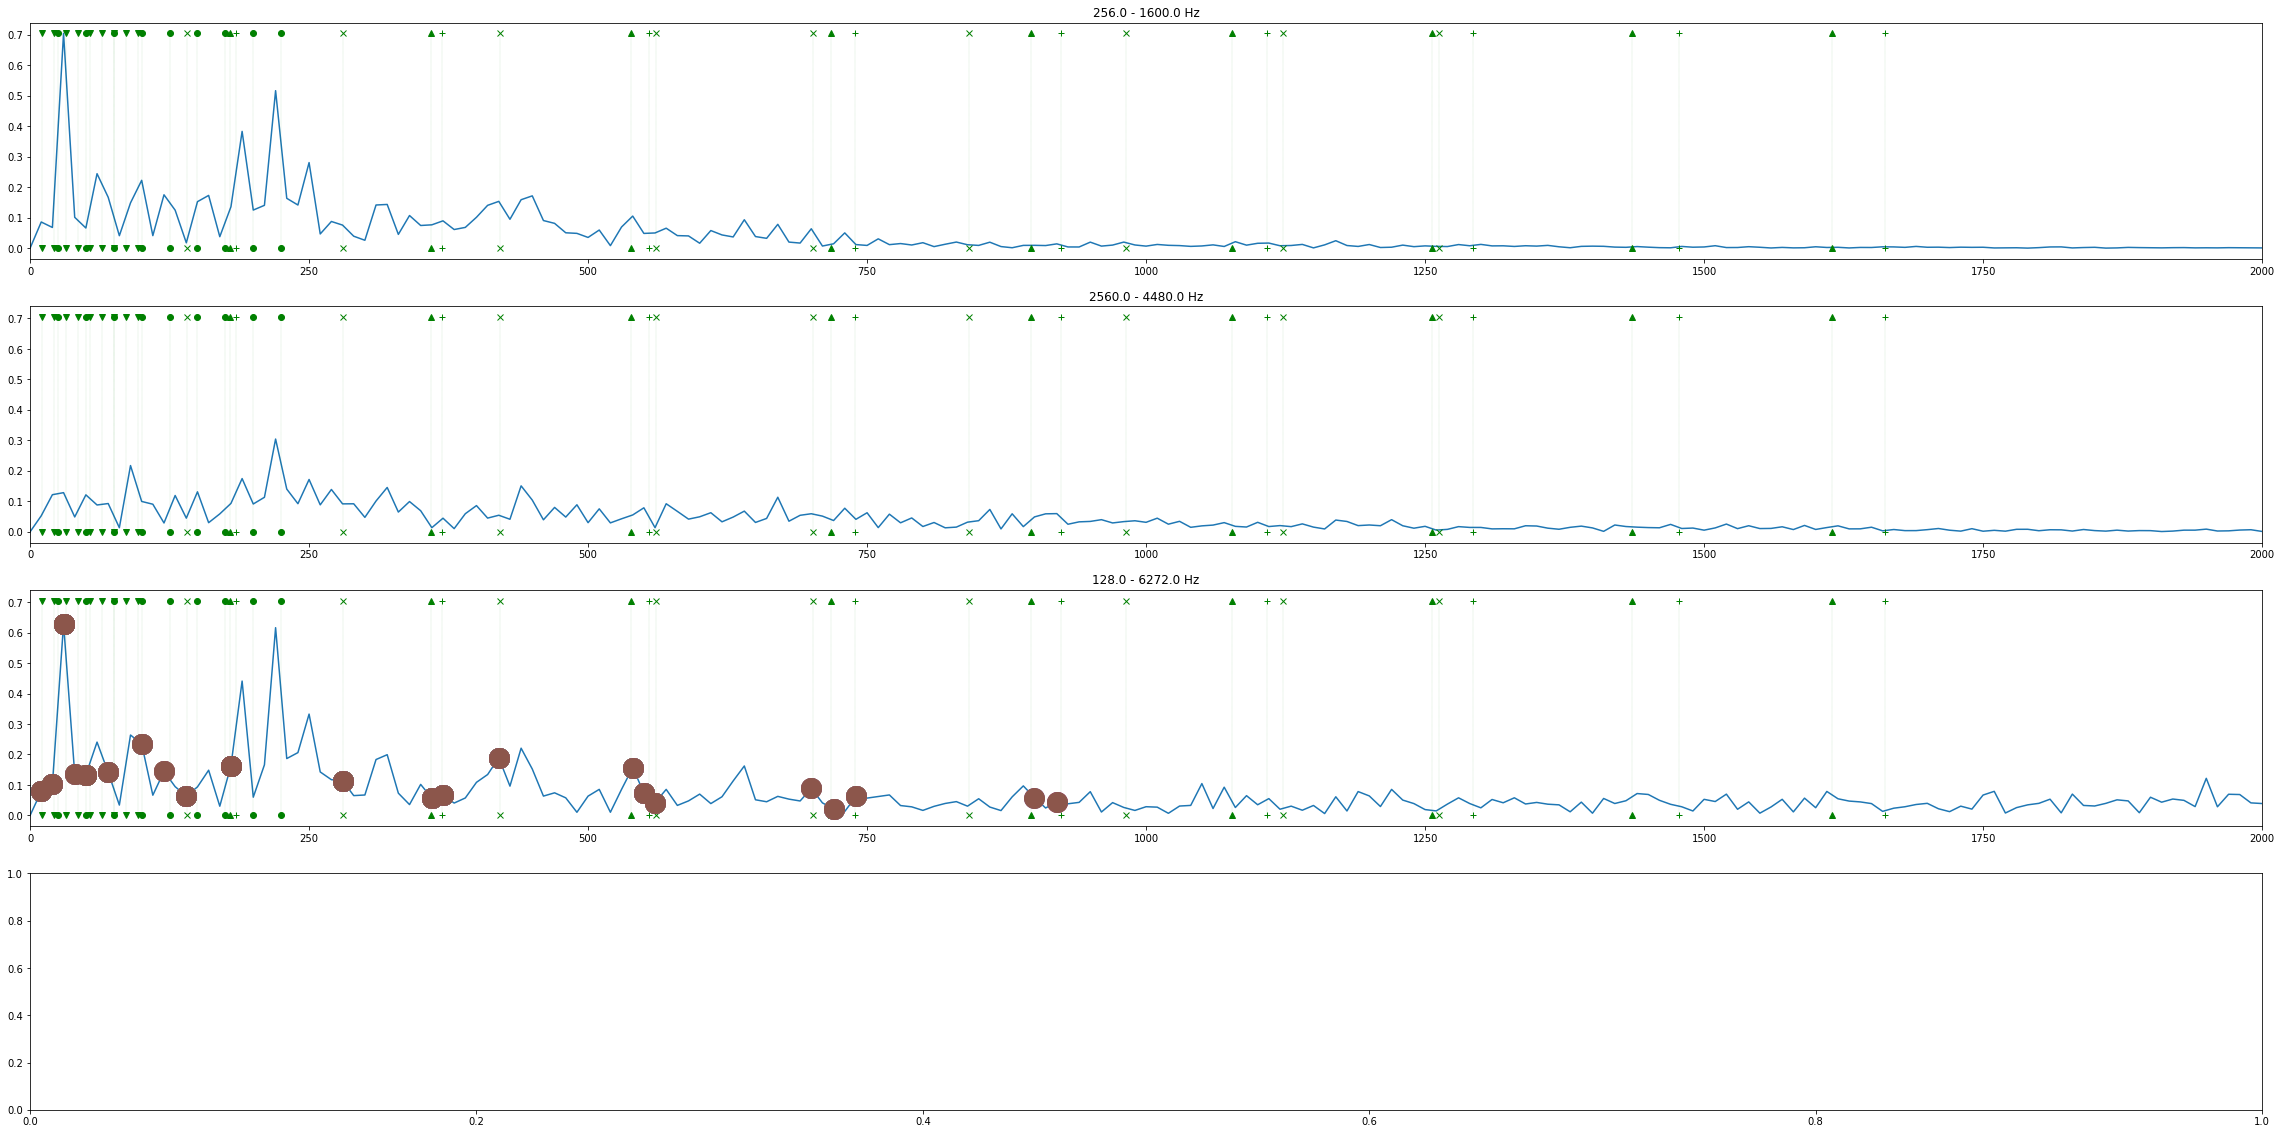

In [18]:

bs='ox+^v'
print(b)
#bpfoLines=np.array([bpfo,bpfo])/Fs

j=0
ax=axs[j];j=j+1
ba=np.array([0.02,0.125])



fa=ba*Fs/2
titleStr=str(fa[0])+' - '+str(fa[1])+' Hz'

xEnv, fSpec, xSpec =funEnvSpectrum(x,Fs,ba1=ba[0],ba2=ba[1])
yylimSup= max(xSpec)
print(fSpec[1]-fSpec[0])

ax.plot(fSpec,xSpec)
ax.set_xlim(left=0, right=2000)
yy=np.array([0,yylimSup])
ax.set_title(titleStr)


for k in range(5):
    symb='g'+bs[k]+'--'
    bpfoLines=np.array([b[k],b[k]])
    for i in range(1,10):            
        ax.plot(bpfoLines*i, yy,symb,linewidth=0.1 );
ba=np.array([0.2,0.35  ])
fa=ba*Fs/2
titleStr=str(fa[0])+' - '+str(fa[1])+' Hz'

xEnv, fSpec, xSpec =funEnvSpectrum(x,Fs,ba1=ba[0],ba2=ba[1])
print(fSpec[1]-fSpec[0])
ax=axs[j];j=j+1
ax.plot(fSpec,xSpec)
ax.set_xlim(left=0, right=2000)
yy=np.array([0,yylimSup])
ax.set_title(titleStr)

for k in range(5):
    symb='g'+bs[k]+'--'
    bpfoLines=np.array([b[k],b[k]])
    for i in range(1,10):            
        ax.plot(bpfoLines*i, yy,symb,linewidth=0.1 );       

        
ba=np.array([0.01,0.49  ])
fa=ba*Fs/2
titleStr=str(fa[0])+' - '+str(fa[1])+' Hz'

xEnv, fSpec, xSpec =funEnvSpectrum(x,Fs,ba1=ba[0],ba2=ba[1])
ax=axs[j];j=j+1
ax.plot(fSpec,xSpec)
ax.set_xlim(left=0, right=2000)
yy=np.array([0,yylimSup])
print(fSpec[1]-fSpec[0])

ax.set_title(titleStr)
for k in range(5):
    symb='g'+bs[k]+'--'
    bpfoLines=np.array([b[k],b[k]])
    for i in range(1,10):            
        ax.plot(bpfoLines*i, yy,symb,linewidth=0.1 );   
        
deltaf=fSpec[1]-fSpec[0]
features=[]
Xp=[]
b=np.array(b)
b0=b
b=np.append(b,2*b0)
b=np.append(b,3*b0)
b=np.append(b,4*b0)
b=np.append(b,5*b0)
for i in b:    
    index=np.where((fSpec>=(i-deltaf/2))&(fSpec<=(i+deltaf/2 )))
    xSpecMax=max(xSpec[index])
    index=np.where((xSpec==xSpecMax))
    Xp=np.append(Xp,fSpec[index])
    features=np.append(features, xSpecMax)
    #print(Xp,features)
    ax.plot(Xp,features,'o',linewidth=0, markersize=20)
    

In [111]:
fn,b1,b2,b3,b4

[27.5, 154.31074999999998, 203.18925000000002, 197.384, 11.869]

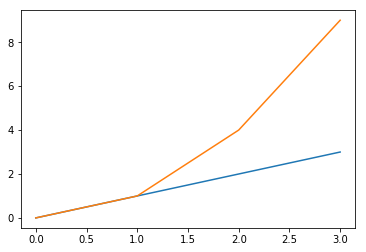

In [66]:
a=np.array([0,1,2,3])
b=np.array([0,1,4,9])
c=np.vstack((a,b))
c=c.T
plt.plot(c)

In [33]:
i=20
max(abs(pdfDataFromRUL[pdfDataFromRUL.id==i].Y))

str(fa[0])

'128.0'

In [23]:
max(pdfDataFromRUL.id)

911

In [29]:
fileName

'b21a'

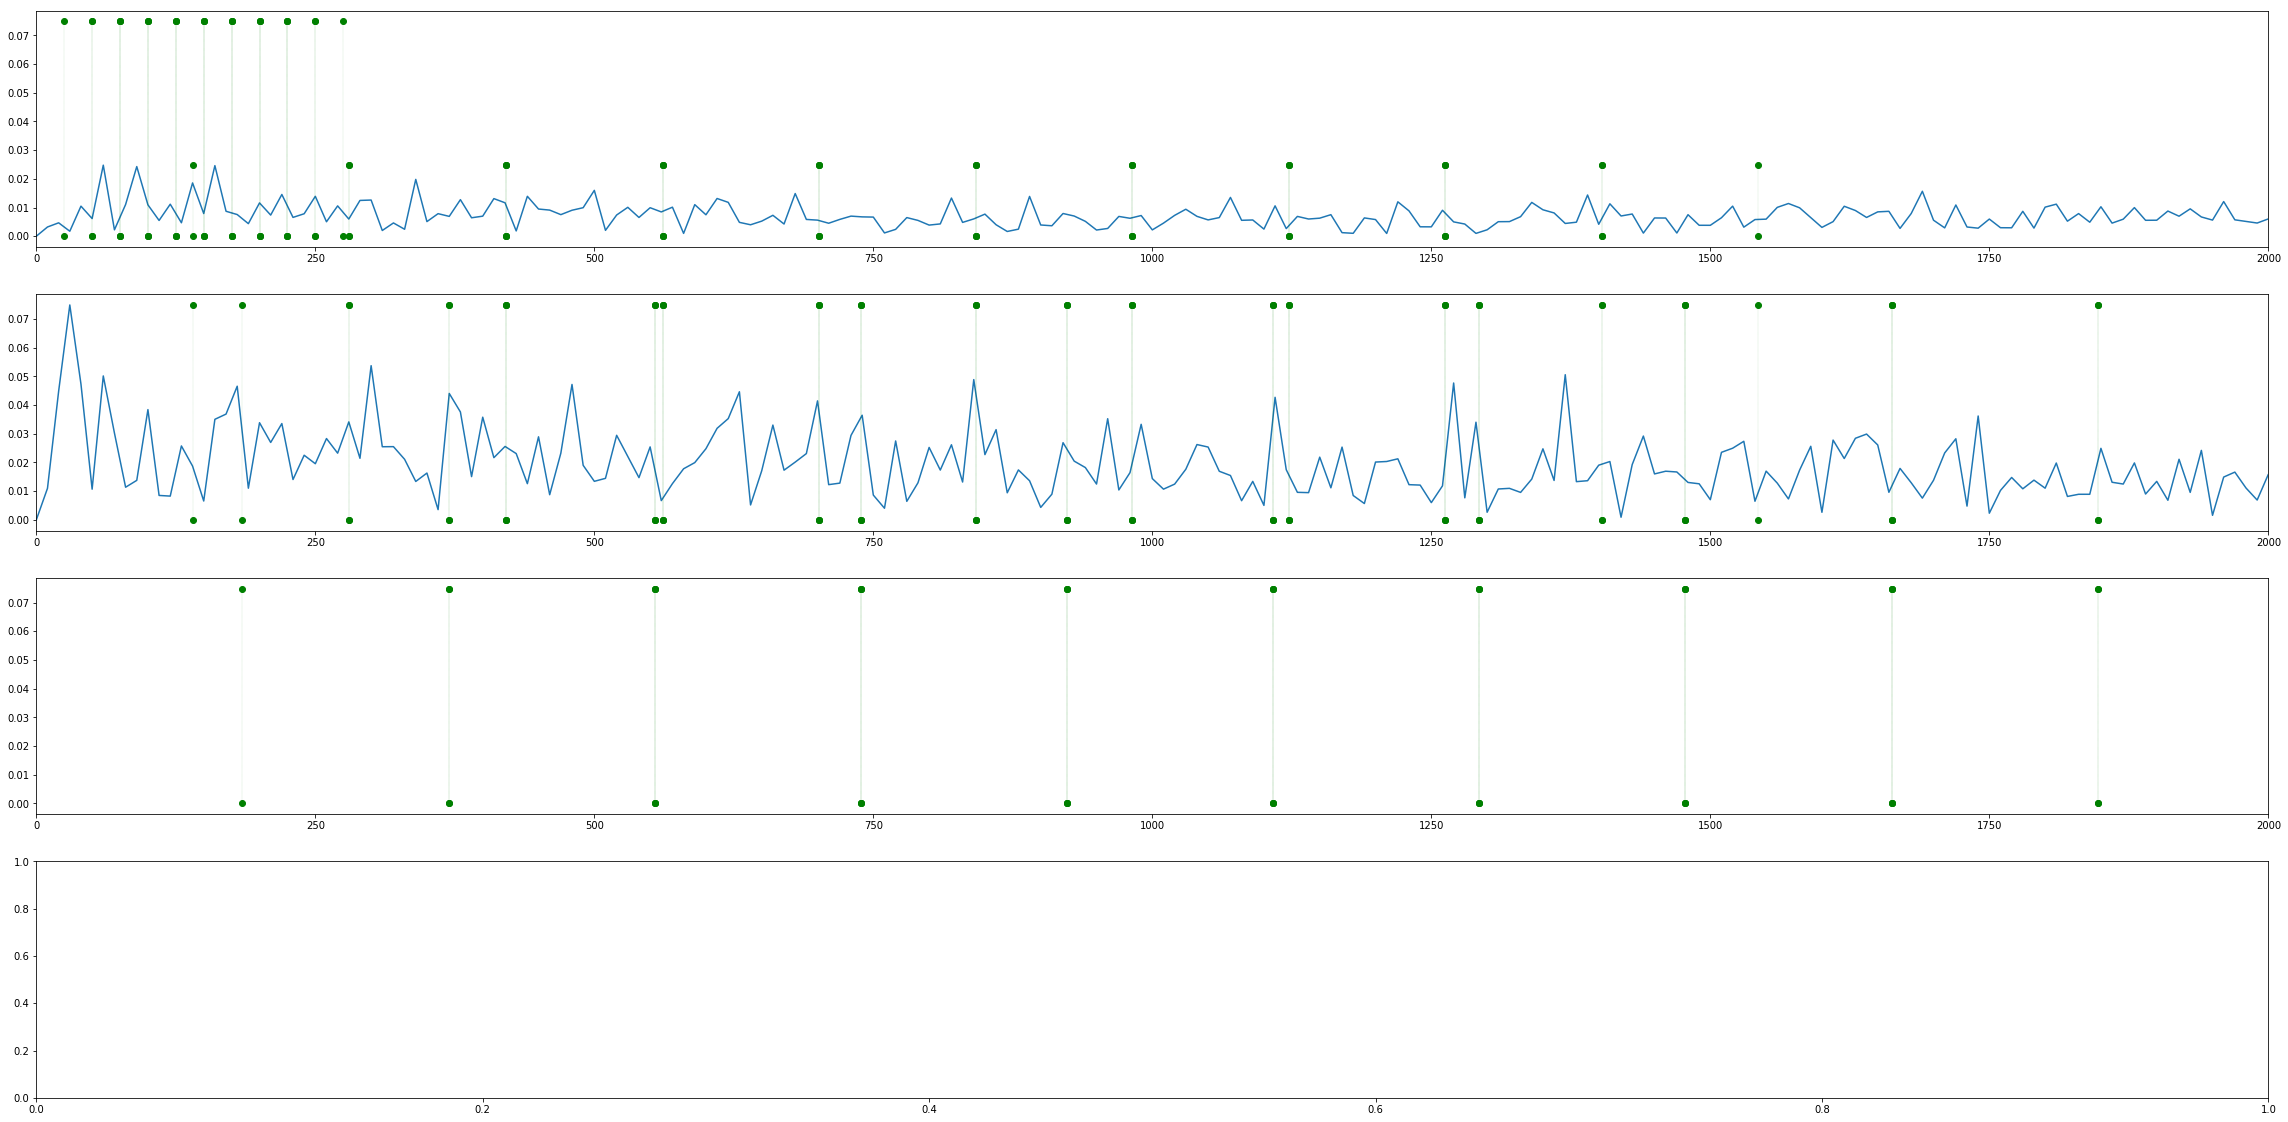

In [85]:
i=780

Fs=25600
fig, axs = plt.subplots(4, 1, figsize=(40,20),)
x=pdfDataFromRUL[pdfDataFromRUL.id==i]['X']
xEnv, fSpec, xSpec =funEnvSpectrum(x,Fs,ba1=0.25,ba2=0.75)
j=0
ax=axs[j];j=j+1
ax.plot(fSpec,xSpec)
yylimSup= max(xSpec)
ax.set_xlim(left=0, right=2000)
yy=np.array([0,yylimSup])
bpfoLines=np.array([b0[j],b0[j]])
for i in range(1,10):

    ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1
    ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1
    ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1


x=pdfDataFromRUL[pdfDataFromRUL.id==i]['Y']
xEnv, fSpec, xSpec =funEnvSpectrum(x,Fs,ba1=0.25,ba2=0.75)

ax=axs[j];j=j+1
ax.plot(fSpec,xSpec)
yylimSup= max(xSpec)
ax.set_xlim(left=0, right=2000)
yy=np.array([0,yylimSup])
bpfoLines=np.array([b0[j],b0[j]])
for i in range(1,10):

    ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1
    ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1
    ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1


#bpfoLines=np.array([bpfo,bpfo])/Fs

for j in range(3):
    ax=axs[j];#j=j+1
    #ax.plot(fSpec,xSpec)
    ax.set_xlim(left=0, right=2000)
    yy=np.array([0,yylimSup])
    bpfoLines=np.array([b[j],b[j]])
    for i in range(1,10):
        ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1
        ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1
        ax.plot(bpfoLines*i, yy,'go--',linewidth=0.1 );i=i+1

Positions where Xmax - Xmin > 20: (array([868, 869]),)
Positions where Xmax - Xmin > 20: (array([ 37,  60,  66,  67,  68,  69,  89,  94,  96,  97, 116, 117, 119,
       122, 126, 127, 134, 136, 145, 147, 149, 152, 153, 155, 156, 157,
       158, 160, 164, 165, 171, 175, 181, 185, 191, 192, 193, 201, 202,
       205, 208, 212, 213, 218, 222, 228, 229, 231, 234, 235, 237, 238,
       239, 240, 241, 244, 246, 258, 262, 264, 268, 273, 280, 282, 288,
       295, 306, 310, 315, 323, 332, 335, 336, 352, 356, 362, 365, 366,
       367, 373, 374, 380, 382, 387, 397, 409, 416, 417, 424, 427, 430,
       454, 456, 458, 459, 460, 461, 463, 465, 473, 474, 479, 481, 483,
       487, 493, 495, 507, 508, 509, 520, 521, 522, 524, 525, 526, 527,
       529, 530, 533, 534, 537, 538, 541, 543, 544, 547, 548, 549, 550,
       552, 561, 563, 566, 567, 568, 570, 572, 573, 579, 589, 591, 607,
       610, 615, 619, 624, 627, 630, 632, 635, 638, 641, 643, 644, 647,
       650, 653, 654, 656, 660, 662, 664, 671,

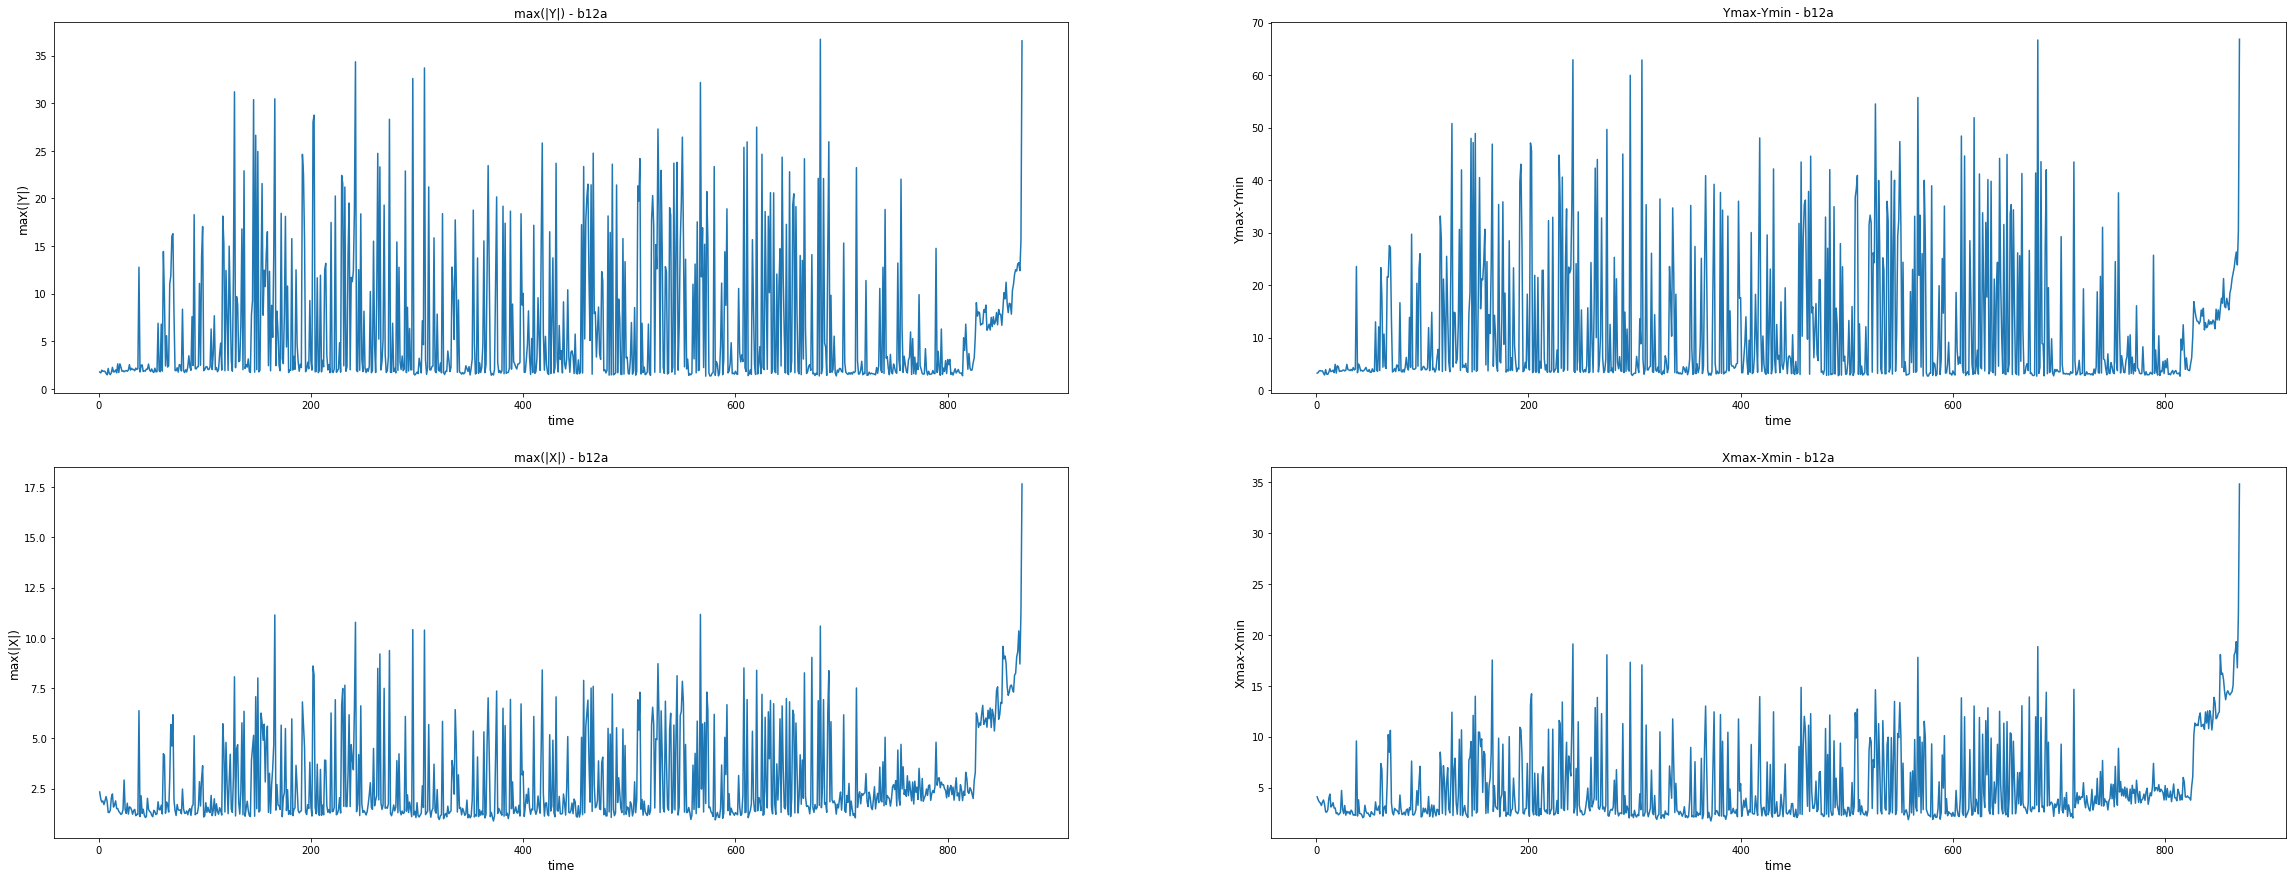

In [66]:
Xmaxmin=Xmax-Xmin
np.where(Xmax>20)

(array([], dtype=int64),)

In [32]:
def funEnvelope(data,dt,lowf=0,highf=0):
    """
    adapted from E. Bechhoefer, «A QUICK INTRODUATION TO BEARING ENVELOPE ANALYSIS», p. 10.
    %[env,dty] = envelope1(data,dt,nfilt,lowf,highf);
    %Inputs:
    % data:data vector, time domain
    % dt:sampling time interval
    % lowf:low frequency limit of bandpass filter
    % highf:high frequency limit of bandpass filter
    %Outputs:
    % env:Envelope of data
    % dty:decimated sample rate
    
    """
    
    import math
    from scipy.signal import detrend

    Fs=1/dt
    
    if highf==0:
        highf=Fs/2
    n=data.shape[0]
    #data=detrend(data)
    
    dfq=Fs/n
    
    idxLow=math.floor(lowf/dfq) 
    #dfq=0.1 => 0 0.1 0.1*id 0.1*(pos-1) 
    #pos => 1 2 3 
    #id => 0 1 2

    meanData=np.mean(data)
    data=data-meanData
    
    idxHi=math.ceil(highf/dfq)
    
    D=fft(data)
    
    idx=idxHi-idxLow+1
    
    n2=int(n/2)    
    D[0]=D[0]
    #D[0]=0
    D[1:n2]=2*D[1:n2]
    D[n2]=D[n2]
    D[n2+1:]=0
   
    if lowf>0 or  highf<(Fs/2+0.01):
        #D[0:idx]=D[idxLow:idxHi+1]
        #D[idx:]=0
        D[1:idx+1]=D[idxLow:idxHi+1]
        D[idx+1:]=0
    data=abs(ifft(D))
    bw=highf-lowf
    r=int(np.fix(1/(bw*2*dt)))
    #print(n,r)    
    env=data[0:n:r];
    env=data[0:n];
    if lowf==0:
        #env=env+meanData
        pass
    
    dty=dt*r;
    print(dt,lowf,highf)
    return env, dty, meanData

In [33]:
data=pdfDataFromRUL[pdfDataFromRUL.id==800].X

In [34]:
data=data.to_numpy()

In [172]:
ListfileName=['b12a','b21a', 'b22a','b31a','b32a']

for fileName in ListfileName:
    pdfRUL2=funPlotAccLoadFile(fileName)
    funPlotAcc(pdfRUL2,fileName)

NameError: name 'funPlotAccLoadFile' is not defined

In [173]:
dt=1/25600
#Freq= 0 -12800 Hz
#Fs=25600

xplot.shape[0]
envfft.shape[0]

NameError: name 'xplot' is not defined

3.90625e-05 0 12800


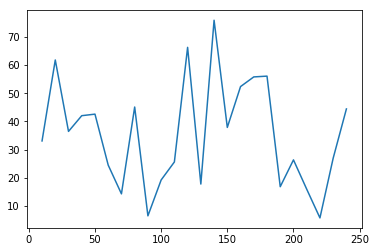

In [91]:
data=pdfDataFromRUL[pdfDataFromRUL.id==800].X.to_numpy()
data=pdfDataFromRUL[pdfDataFromRUL.id==800].Y.to_numpy()
env, dty, meanData=funEnvelope(data,dt,0,12800)
envfft=abs(fft(env))
last=int(envfft.shape[0]/2)
envfft=envfft[0:last]
df=1/data.shape[0]/dt
xplot=np.arange(0,12800,df)
plt.plot(xplot[xplot<(BPFI+20)][1:],envfft[xplot<(BPFI+20)][1:])

In [92]:
Fn=1800/60
BPFO=5.6113*Fn
BPFI=7.3887*Fn
BFF=7.1776*Fn
FTF=0.4316*Fn
envfft[xplot<(BPFI+20)][1:]


array([33.08822882, 61.81415568, 36.47171168, 42.04699177, 42.59849163,
       24.50416592, 14.31038089, 45.1223242 ,  6.51029363, 19.23491948,
       25.62463008, 66.29370466, 17.79006382, 75.91558248, 37.882199  ,
       52.3775723 , 55.80677524, 56.0857357 , 16.84811704, 26.36514552,
       15.97165827,  5.77203477, 26.96591378, 44.44585249])

In [93]:
print(BPFO,BPFI,BFF,FTF)
xplot[xplot<(BPFI+20)][1:]

168.339 221.661 215.328 12.948


array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240.])

In [82]:
xplot[xplot<(BPFI+20)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
xplot.any()

In [27]:
x=np.arange(0,0.1,dt*32)
len(np.arange(0,0.1,1/2560))

256

In [28]:
dt*32*80

0.1

In [29]:
len(env)

NameError: name 'env' is not defined

In [ ]:
env, dty=funEnvelope(data,dt,100,500)


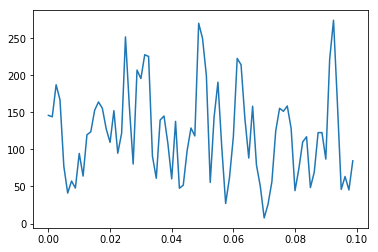

In [60]:
plt.plot(x,env)


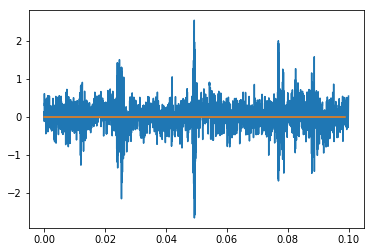

In [51]:
plt.plot(np.arange(0,0.1,1/25600), data)
plt.plot(np.arange(0,0.1,0.1/80),env)

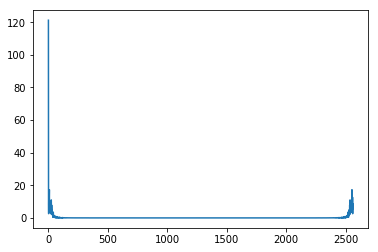

In [95]:
plt.plot(abs(fft(env)))

In [83]:
x=np.arange(0,10,0.1)
A=5
s=A*np.sin(np.pi*x)


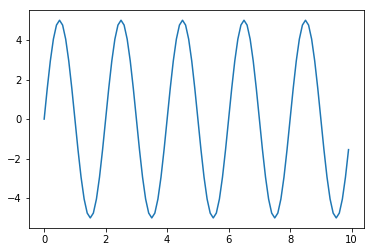

In [92]:
plt.plot(x, s)

In [86]:
D=fft(s)

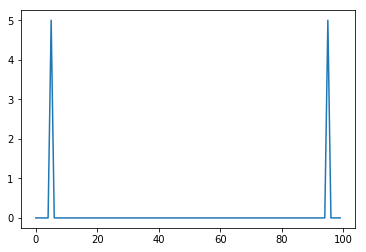

In [94]:
plt.plot(abs(D)*2/len(x))

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


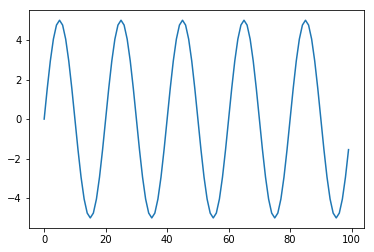

In [91]:
ss=ifft(D)
plt.plot(ss)

In [6]:
from scipy.signal import welch
from scipy.stats import  kurtosis   
    

In [139]:
import math
def funSK(v,sr):
    """
    adapted from E. Bechhoefer, «A QUICK INTRODUATION TO BEARING ENVELOPE ANALYSIS», p. 10.
    """
    lvl=np.array([2,3,4,6,8,12,16,32])
    lw=0
    hi=sr/2
    n=len(lvl)
    S=np.zeros((n,32))
    for i in range(n):
        cLvl=lvl[i]
        dBw=(hi-lw)/cLvl
        cLw=lw
        dix=math.floor(32/cLvl)
        sdix=0
        edix=dix
        for j in range(cLvl):
            cHi=cLw+dBw
            y,dt=funEnvelope(v,1/sr,cLw,cHi)
            frq,P=welch(y,sr,'hanning', detrend=False)
            sk=kurtosis(P)
            S[i,sdix:edix]=sk
            sdix=edix
            edix=edix+dix
            cLw=cLw+dBw
            
    return S,P,y
    
            


In [126]:
S, P, y=funSK(data,25600)




In [140]:
S, P, y=funSK(x,1000)

ValueError: could not broadcast input array from shape (0) into shape (2501)

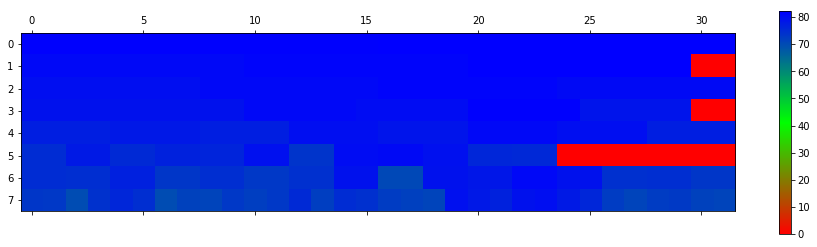

In [141]:
import matplotlib.colors as clr
from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)
print(viridis)
some_matrix = S
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#244162','#DCE6F1'], N=256)
#plt.matshow(some_matrix, cmap=cmap)
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)] 
cmap=clr.LinearSegmentedColormap.from_list('viridis',colors, N=256)
plt.matshow(some_matrix,cmap=cmap)
plt.colorbar()

In [130]:
lvl=np.array([ 2,  3,  4,  6,  8, 12, 16, 32])
n=len(lvl)
(5)

NameError: name 'randn' is not defined

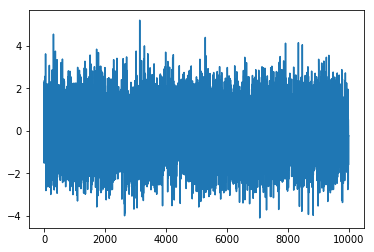

In [131]:
from scipy.signal import chirp 
from numpy.random import normal as randn
fs = 1000;
t = np.arange(0,10,1/fs)
f1 = 300
f2 = 400 
x = chirp(t,f1,10,f2)
x = x + randn(size=t.shape[0]);
plt.plot(x)
#pkurtosis(x, fs)
#xt = timetable(seconds(t'), x');

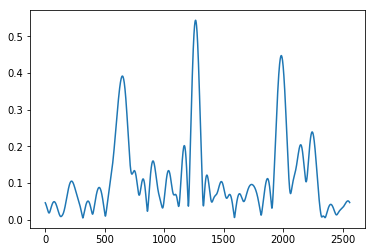

In [115]:
plt.plot(y)

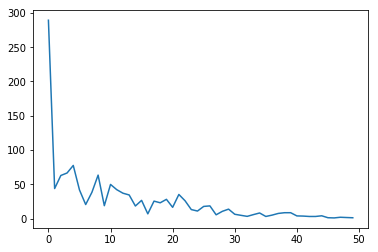

In [123]:
plt.plot(abs(fft(y))[0:50])

In [117]:
P,frq=welch(y,12560,'hanning', nperseg=785, detrend=False)

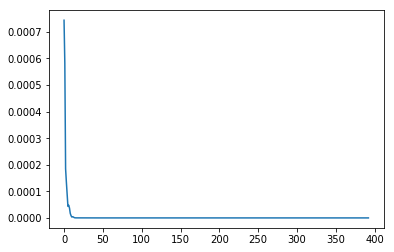

In [124]:
plt.plot(frq)

In [32]:
pdfDataFromRUL[pdfDataFromRUL.H==9][pdfDataFromRUL.m==47].X

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


921600   -0.195
921601    0.213
921602    0.516
921603    0.302
921604    0.315
921605    0.237
921606   -0.064
921607    0.061
921608    0.196
921609    0.683
921610   -0.179
921611    0.058
921612   -0.165
921613   -0.431
921614   -0.515
921615   -0.117
921616    0.007
921617    0.000
921618   -0.128
921619   -0.292
921620   -0.152
921621   -0.320
921622   -0.093
921623    0.313
921624    0.340
921625    0.366
921626   -0.015
921627   -0.081
921628   -0.462
921629   -0.195
          ...  
936930    0.369
936931   -0.015
936932    0.763
936933   -0.273
936934   -0.303
936935   -0.384
936936   -0.317
936937   -0.360
936938   -0.290
936939   -0.835
936940   -0.621
936941   -0.788
936942    0.176
936943    0.170
936944    0.541
936945    0.167
936946    0.659
936947    0.435
936948    0.271
936949    0.018
936950    0.246
936951    0.097
936952   -0.326
936953   -0.324
936954   -0.196
936955   -0.483
936956   -0.496
936957   -0.682
936958   -0.670
936959   -0.232
Name: X, Length: 15360, 

In [ ]:
pdftemp=pdfDataFromRUL.sort_values(by=['H','m','s','microseg'],ascending=True)

In [ ]:
funPlotAcc(pdftemp,fileName)

### Leer datos y crear RUL para cada una de las medidas

In [54]:
df=leerDatosEnCloud('b12aRUL2.parquet','ffy')
pdfDataFromRUL=df.toPandas()
pdfDataFromRUL
pdfDataFromRUL=pdfDataFromRUL.sort_values(by=['id'],ascending=True)

H   m   s  microseg      X      Y           file         time  \
0         8  53  25  237420.0 -0.201 -0.045  acc_00039.csv  32005.23742   
1         8  53  25  237460.0 -0.283 -0.752  acc_00039.csv  32005.23746   
2         8  53  25  237500.0  0.372 -0.204  acc_00039.csv  32005.23750   
3         8  53  25  237540.0  0.232  0.519  acc_00039.csv  32005.23754   
4         8  53  25  237580.0  0.322  1.011  acc_00039.csv  32005.23758   
5         8  53  25  237620.0  0.314  0.534  acc_00039.csv  32005.23762   
6         8  53  25  237660.0  0.462 -0.238  acc_00039.csv  32005.23766   
7         8  53  25  237700.0  0.616 -0.599  acc_00039.csv  32005.23770   
8         8  53  25  237730.0  0.323 -0.256  acc_00039.csv  32005.23773   
9         8  53  25  237770.0 -0.064  0.437  acc_00039.csv  32005.23777   
10        8  53  25  237810.0 -0.681  0.864  acc_00039.csv  32005.23781   
11        8  53  25  237850.0 -0.180 -0.106  acc_00039.csv  32005.23785   
12        8  53  25  237890.0  0.062 -0.903  acc_00039.csv  32005.23789   
13        8  53  25  237930.0 -0.146  0.117  acc_00039.csv  32005.23793   
14        8  53  25  237970.0 -0.793  0.499  acc_00039.csv  32005.23797   
15        8  53  25  238010.0 -0.667  0.317  acc_00039.csv  32005.23801   
16        8  53  25  238050.0 -0.623 -0.391  acc_00039.csv  32005.23805   
17        8  53  25  238080.0 -0.731  0.048  acc_00039.csv  32005.23808   
18        8  53  25  238120.0 -0.282  0.789  acc_00039.csv  32005.23812   
19        8  53  25  238160.0 -0.085  0.804  acc_00039.csv  32005.23816   
20        8  53  25  238200.0  0.135 -0.141  acc_00039.csv  32005.23820   
21        8  53  25  238240.0  0.167 -1.033  acc_00039.csv  32005.23824   
22        8  53  25  238280.0 -0.024 -0.012  acc_00039.csv  32005.23828   
23        8  53  25  238320.0  0.242  0.599  acc_00039.csv  32005.23832   
24        8  53  25  238360.0  0.807  0.398  acc_00039.csv  32005.23836   
25        8  53  25  238400.0  1.072  0.472  acc_00039.csv  32005.23840   
26        8  53  25  238440.0  0.557 -0.658  acc_00039.csv  32005.23844   
27        8  53  25  238480.0 -0.004 -0.727  acc_00039.csv  32005.23848   
28        8  53  25  238520.0 -0.070  0.311  acc_00039.csv  32005.23852   
29        8  53  25  238550.0 -0.042  0.079  acc_00039.csv  32005.23855   
...      ..  ..  ..       ...    ...    ...            ...          ...   
2229730  10  20  25  232770.0 -0.086 -0.118  acc_00561.csv  37225.23277   
2229731  10  20  25  232810.0 -0.283 -0.085  acc_00561.csv  37225.23281   
2229732  10  20  25  232850.0 -0.184  0.029  acc_00561.csv  37225.23285   
2229733  10  20  25  232890.0  0.014 -0.124  acc_00561.csv  37225.23289   
2229734  10  20  25  232930.0 -0.206 -0.046  acc_00561.csv  37225.23293   
2229735  10  20  25  232970.0  0.064 -0.184  acc_00561.csv  37225.23297   
2229736  10  20  25  233010.0 -0.612 -0.103  acc_00561.csv  37225.23301   
2229737  10  20  25  233050.0 -0.106  0.593  acc_00561.csv  37225.23305   
2229738  10  20  25  233080.0 -0.707  0.021  acc_00561.csv  37225.23308   
2229739  10  20  25  233120.0 -0.056 -0.476  acc_00561.csv  37225.23312   
2229740  10  20  25  233160.0 -0.177  0.191  acc_00561.csv  37225.23316   
2229741  10  20  25  233200.0  0.206  0.491  acc_00561.csv  37225.23320   
2229742  10  20  25  233240.0 -0.124 -0.920  acc_00561.csv  37225.23324   
2229743  10  20  25  233280.0 -0.278  0.258  acc_00561.csv  37225.23328   
2229744  10  20  25  233320.0  0.126  1.036  acc_00561.csv  37225.23332   
2229745  10  20  25  233360.0 -0.059 -0.429  acc_00561.csv  37225.23336   
2229746  10  20  25  233400.0  0.123 -0.259  acc_00561.csv  37225.23340   
2229747  10  20  25  233440.0 -0.140  0.834  acc_00561.csv  37225.23344   
2229748  10  20  25  233480.0  0.653 -0.553  acc_00561.csv  37225.23348   
2229749  10  20  25  233520.0  0.208 -1.203  acc_00561.csv  37225.23352   
2229750  10  20  25  233550.0  0.037  0.125  acc_00561.csv  37225.23355   
2229751  10  20  25  233590.0 -0.60

In [20]:
pdfDataFromRUL

NameError: name 'pdfDataFromRUL' is not defined

In [12]:
pdfDataFromRUL=pdfDataFromRUL.sort_values(by=['RUL2'],ascending=False)

In [13]:
pdfDataFromRUL[pdfDataFromRUL.id==1].max().RUL2
pdfDataFromRUL[pdfDataFromRUL.id==1].max()[["RUL2", "RUL"]]

RUL2    1270.08
RUL     1270.08
dtype: object

In [14]:
pdfDataFromRUL[pdfDataFromRUL.id==1][["RUL2", "RUL"]]

RUL2         RUL
229564  1270.07836  1270.07836
229565  1270.07832  1270.07832
229566  1270.07828  1270.07828
229567  1270.07824  1270.07824
229568  1270.07820  1270.07820
229569  1270.07816  1270.07816
229570  1270.07812  1270.07812
229571  1270.07808  1270.07808
229572  1270.07804  1270.07804
229573  1270.07801  1270.07801
229574  1270.07797  1270.07797
229575  1270.07793  1270.07793
229576  1270.07789  1270.07789
229577  1270.07785  1270.07785
229578  1270.07781  1270.07781
229579  1270.07777  1270.07777
229580  1270.07773  1270.07773
229581  1270.07769  1270.07769
229582  1270.07765  1270.07765
229583  1270.07761  1270.07761
229584  1270.07757  1270.07757
229585  1270.07754  1270.07754
229586  1270.07750  1270.07750
229587  1270.07746  1270.07746
229588  1270.07742  1270.07742
229589  1270.07738  1270.07738
229590  1270.07734  1270.07734
229591  1270.07730  1270.07730
229592  1270.07726  1270.07726
229593  1270.07722  1270.07722
...            ...         ...
232094  1269.97953  1269.97953
232095  1269.97949  1269.97949
232096  1269.97945  1269.97945
232097  1269.97941  1269.97941
232098  1269.97937  1269.97937
232099  1269.97933  1269.97933
232100  1269.97929  1269.97929
232101  1269.97925  1269.97925
232102  1269.97922  1269.97922
232103  1269.97918  1269.97918
232104  1269.97914  1269.97914
232105  1269.97910  1269.97910
232106  1269.97906  1269.97906
232107  1269.97902  1269.97902
232108  1269.97898  1269.97898
232109  1269.97894  1269.97894
232110  1269.97890  1269.97890
232111  1269.97886  1269.97886
232112  1269.97883  1269.97883
232113  1269.97879  1269.97879
232114  1269.97875  1269.97875
232115  1269.97871  1269.97871
232116  1269.97867  1269.97867
232117  1269.97863  1269.97863
232118  1269.97859  1269.97859
232119  1269.97855  1269.97855
232120  1269.97851  1269.97851
232121  1269.97847  1269.97847
232122  1269.97843  1269.97843
232123  1269.97840  1269.97840

[2560 rows x 2 columns]

In [18]:
#Crear lista para cada medida
fileName='bearing'

print('Rows: ',end='\r')

idini=pdfDataFromRUL.min()
print('Rows: '+str(idini.id),end='\r')
idmax=pdfDataFromRUL.max()
print('Rows: '+str(idmax.id))
pdfDataAc=pd.DataFrame()
pdfDataAc.columns= pd.DataFrame(columns=['RUL2', 'RUL','id'])

for i in range(idini.id,idmax.id+1):
    pdfDataExtracted=pdfDataFromRUL[pdfDataFromRUL.id==i][['RUL2', 'RUL','id']].head(1)
    pdfDataAc=pdfDataAc.append(pdfDataExtracted)
    print(i, end='\r')
    
    
lb=[]
for i in range(idmax.id):
    lb.append('b12a')
#dfb=pd.DataFrame(lb, columns=['bearing'])
#len(lb)
#pdfDataAc.shape
pdfDataAc[fileName]=lb

Rows: 871


In [ ]:
pdfDataAc

In [34]:
pdfDataAc['bearing']=lb

In [108]:
In [1]: df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
   ...:                     'B': ['B0', 'B1', 'B2', 'B3'],
   ...:                     'C': ['C0', 'C1', 'C2', 'C3'],
   ...:                     'D': ['D0', 'D1', 'D2', 'D3']},
   ...:                    index=[0, 1, 2, 3])
   ...: 

In [2]: df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
   ...:                     'B': ['B4', 'B5', 'B6', 'B7'],
   ...:                     'C': ['C4', 'C5', 'C6', 'C7'],
   ...:                     'D': ['D4', 'D5', 'D6', 'D7']},
   ...:                    index=[4, 5, 6, 7])
   ...: 

In [3]: df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
   ...:                     'B': ['B8', 'B9', 'B10', 'B11'],
   ...:                     'C': ['C8', 'C9', 'C10', 'C11'],
   ...:                     'D': ['D8', 'D9', 'D10', 'D11']},
   ...:                    index=[8, 9, 10, 11])

In [109]:
kk=pd.concat([df1,df3],axis=1)

In [ ]:
kk2=kk.append()

In [38]:
df=leerDatosEnCloud('b12aFFT2.parquet','ffy')

In [39]:
pdfDataFromFFT=df.toPandas()
pdfDataFromFFT=pdfDataFromFFT.sort_values(by=['id'],ascending=True)
pdfDataFromFFT

In [11]:
df=leerDatosEnCloud('b12aRUL2.parquet','ffy')
pdfDataFromRUL=df.toPandas()
pdfDataFromRUL

KeyboardInterrupt: 

In [43]:
pdfDataAc.columns= pd.DataFrame(columns=['RUL2', 'RUL'])

In [43]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)



In [171]:
kk=pdfDataAc.join(pdfDataFromFFT, on='id', lsuffix='l', rsuffix='r',how='outer')

NameError: name 'pdfDataAc' is not defined

In [66]:
kk

id        RUL2         RUL    idl bearing    idr  \
229564     1  1270.07836  1270.07836    1.0    b12a  437.0   
232124     2  1260.07836  1260.07836    2.0    b12a  438.0   
234684     3  1250.07836  1250.07836    3.0    b12a  439.0   
237244     4  1240.07836  1240.07836    4.0    b12a  440.0   
239804     5  1230.07836  1230.07836    5.0    b12a  441.0   
198595     6  1220.07836  1220.07836    6.0    b12a  442.0   
201155     7  1210.07836  1210.07836    7.0    b12a  443.0   
203715     8  1200.07836  1200.07836    8.0    b12a  444.0   
206275     9  1190.07836  1190.07836    9.0    b12a  445.0   
306390    10  1180.07836  1180.07836   10.0    b12a  446.0   
308950    11  1170.07836  1170.07836   11.0    b12a  447.0   
311510    12  1160.07836  1160.07836   12.0    b12a  448.0   
314070    13  1150.07836  1150.07836   13.0    b12a  449.0   
129956    14  1140.07836  1140.07836   14.0    b12a  450.0   
132516    15  1130.07836  1130.07836   15.0    b12a  451.0   
135076    16  1120.07836  1120.07836   16.0    b12a  452.0   
137636    17  1110.07836  1110.07836   17.0    b12a  453.0   
83158     18  1100.07836  1100.07836   18.0    b12a  454.0   
85718     19  1090.07836  1090.07836   19.0    b12a  455.0   
88278     20  1080.07836  1080.07836   20.0    b12a  456.0   
90838     21  1070.07836  1070.07836   21.0    b12a  457.0   
93398     22  1060.07836  1060.07836   22.0    b12a  458.0   
360978    23  1050.07836  1050.07836   23.0    b12a  459.0   
363538    24  1040.07836  1040.07836   24.0    b12a  460.0   
366098    25  1030.07836  1030.07836   25.0    b12a  461.0   
368658    26  1020.07836  1020.07836   26.0    b12a  462.0   
252329    27  1010.07836  1010.07836   27.0    b12a  463.0   
254889    28  1000.07836  1000.07836   28.0    b12a  464.0   
257449    29   990.07836   990.07836   29.0    b12a  465.0   
260009    30   980.07836   980.07836   30.0    b12a  466.0   
...      ...         ...         ...    ...     ...    ...   
469570   843     0.00000 -7149.94840  843.0    b12a  408.0   
473286   844     0.00000 -7159.99356  844.0    b12a  409.0   
475144   845     0.00000 -7169.96614  845.0    b12a  410.0   
338063   846     0.00000 -7179.98446  846.0    b12a  411.0   
341317   847     0.00000 -7190.01157  847.0    b12a  412.0   
341622   848     0.00000 -7199.92348  848.0    b12a  413.0   
345338   849     0.00000 -7209.96864  849.0    b12a  414.0   
349054   850     0.00000 -7220.01379  850.0    b12a  415.0   
670367   851     0.00000 -7229.94457  851.0    b12a  416.0   
673953   852     0.00000 -7239.98465  852.0    b12a  417.0   
675812   853     0.00000 -7249.95727  853.0    b12a  418.0   
677670   854     0.00000 -7259.92985  854.0    b12a  419.0   
680412   855     0.00000 -7269.93696  855.0    b12a  420.0   
1278703  856     0.00000 -7280.02114  856.0    b12a  421.0   
1279677  857     0.00000 -7289.95918  857.0    b12a  422.0   
1283393  858     0.00000 -7300.00434  858.0    b12a  423.0   
445415   859     0.00000 -7309.96680  859.0    b12a  424.0   
447273   860     0.00000 -7319.93938  860.0    b12a  425.0   
450989   861     0.00000 -7329.98453  861.0    b12a  426.0   
452847   862     0.00000 -7339.95711  862.0    b12a  427.0   
395247   863     0.00000 -7349.94164  863.0    b12a  428.0   
398963   864     0.00000 -7359.98680  864.0    b12a  429.0   
402374   865     0.00000 -7370.02004  865.0    b12a  430.0   
402679   866     0.00000 -7379.93196  866.0    b12a  431.0   
405466   867     0.00000 -7389.94082  867.0    b12a  432.0   
177476   868     0.00000 -7400.00942  868.0    b12a  433.0   
178405   869     0.00000 -7409.94571  869.0    b12a  434.0   
180393   870     0.00000 -7419.92336  870.0    b12a  435.0   
184908   871     0.00000 -7429.99973  871.0    b12a    NaN   
184908     0         NaN         NaN    NaN     NaN  436.0   

                                                  features  
229564   [19.78371840681119, 4.518060385812027, 3.39100...  
232124   [19.469426750677588, 3.68970946913

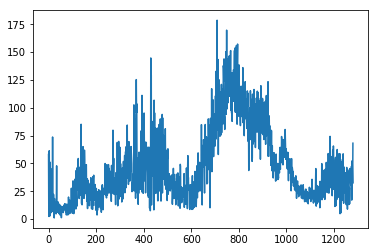

In [53]:
plt.plot(pdfDataFromFFT['features'][700])

In [51]:
pdfDataAc=pdfDataAc.append(pdfDataExtracted)

In [52]:
pdfDataAc

RUL2         RUL
229564  1270.07836  1270.07836
229564  1270.07836  1270.07836
229564  1270.07836  1270.07836

In [46]:
pdfDataExtracted.columns

Index(['RUL2', 'RUL'], dtype='object')

In [ ]:
print('Rows: ',end='\r')

idini=df.selectExpr("min(id) as id").first()
print('Rows: '+str(idini.id),end='\r')
idmax=df.selectExpr("max(id) as id").first()
print('Rows: '+str(idmax.id))
DataAc=[]
    
    #calculation of fft for each sample
for i in range(idini.id,idmax.id+1):
    DataFromRUL=df.filter(df.id==i).select(df.RUL,df.RUL2,df.bearing,df.id).first()
    DataAc.append(DataFromRUL)
    print(i, end='\r')

In [2]:
2+2

4

In [12]:
idini=df.selectExpr("min(id) as id").first()
idmax=df.selectExpr("max(id) as id").first()
print('Rows: '+str(idmax.id))
DataFromRUL=df.filter(df.id==3).select(df.RUL,df.RUL2,df.bearing,df.id).first()

Rows: 871


In [ ]:
DataFromRUL=df.select(df.RUL,df.RUL2,df.bearing,df.id).collect().toDF()

In [ ]:
print('Rows: ',end='\r')

idini=df.selectExpr("min(id) as id").first()
print('Rows: '+str(idini.id),end='\r')
idmax=df.selectExpr("max(id) as id").first()
print('Rows: '+str(idmax.id))
DataAc=[]
    
    #calculation of fft for each sample
for i in range(idini.id,idmax.id+1):
    DataFromRUL=df.filter(df.id==i).select(df.RUL,df.RUL2,df.bearing,df.id).first()
    DataAc.append(DataFromRUL)
    print(i, end='\r')
    

In [9]:
folder='Learning_set/Bearing3_2/'
listaFolder=os.listdir(folder)
listaFolder

['acc_00001.csv',
 'acc_00002.csv',
 'acc_00003.csv',
 'acc_00004.csv',
 'acc_00005.csv',
 'acc_00006.csv',
 'acc_00007.csv',
 'acc_00008.csv',
 'acc_00009.csv',
 'acc_00010.csv',
 'acc_00011.csv',
 'acc_00012.csv',
 'acc_00013.csv',
 'acc_00014.csv',
 'acc_00015.csv',
 'acc_00016.csv',
 'acc_00017.csv',
 'acc_00018.csv',
 'acc_00019.csv',
 'acc_00020.csv',
 'acc_00021.csv',
 'acc_00022.csv',
 'acc_00023.csv',
 'acc_00024.csv',
 'acc_00025.csv',
 'acc_00026.csv',
 'acc_00027.csv',
 'acc_00028.csv',
 'acc_00029.csv',
 'acc_00030.csv',
 'acc_00031.csv',
 'acc_00032.csv',
 'acc_00033.csv',
 'acc_00034.csv',
 'acc_00035.csv',
 'acc_00036.csv',
 'acc_00037.csv',
 'acc_00038.csv',
 'acc_00039.csv',
 'acc_00040.csv',
 'acc_00041.csv',
 'acc_00042.csv',
 'acc_00043.csv',
 'acc_00044.csv',
 'acc_00045.csv',
 'acc_00046.csv',
 'acc_00047.csv',
 'acc_00048.csv',
 'acc_00049.csv',
 'acc_00050.csv',
 'acc_00051.csv',
 'acc_00052.csv',
 'acc_00053.csv',
 'acc_00054.csv',
 'acc_00055.csv',
 'acc_0005

In [39]:
escribirDatosEnCloud(df3,'b12aFFT2','parquet') 

b12aFFT2.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


In [42]:

ListFolders=['1_2','2_1','2_2','3_1','3_2']
ListNames=['12','21','22','31','32']

folder='1_2'   
folder='Learning_set/Bearing'+folder+'/'
FileName='b'+str(12)+'a'
Dato2=CrearPdDfwithFFT(folder)
#df2=spark.createDataFrame(df2)
#escribirDatosEnCloud(df2,FileName,'parquet')
df3 = sc.parallelize(Dato2).toDF()
escribirDatosEnCloud(df3,'b12aFFT2','parquet','ffy') 


ListFolders=['2_1','2_2','3_1','3_2']
ListNames=['21','22','31','32']
for i in range(len(ListNames)):
    folder=ListFolders[i]    
    folder='Learning_set/Bearing'+folder+'/'
    FileName='b'+ListNames[i]+'aFFT2'
    Dato2=CrearPdDfwithFFT(folder)

    df3 = sc.parallelize(Dato2).toDF()
    escribirDatosEnCloud(df3,FileName,'parquet','ffy')
    

b21aFFT2.parquet ing2_1/temp_00151.csvdone in os_9c425c08d1e24a7198e26f7b78813582ffy_configs
b22aFFT2.parquet ing2_2/acc_00797.csvdone in os_9c425c08d1e24a7198e26f7b78813582ffy_configs
b31aFFT2.parquet ing3_1/temp_00089.csvdone in os_9c425c08d1e24a7198e26f7b78813582ffy_configs
b32aFFT2.parquet ing3_2/acc_01637.csvdone in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


In [43]:
folder='1_1'   
folder='Learning_set/Bearing'+folder+'/'
FileName='b'+str(11)+'a'
Dato2=CrearPdDfwithFFT(folder)
#df2=spark.createDataFrame(df2)
#escribirDatosEnCloud(df2,FileName,'parquet')
df3 = sc.parallelize(Dato2).toDF()
escribirDatosEnCloud(df3,'b11aFFT2','parquet','ffy') 

b11aFFT2.parquet ing1_1/temp_00466.csvdone in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


In [87]:
#test
escribirDatosEnCloud(df2,'kkk','parquet') 

kkk.parquet done


### 2. Save files to IBM Cloud

In [ ]:

folder='Learning_set/Bearing1_1/'
df2=CrearPdDf(folder)
df2=spark.createDataFrame(df2)
escribirDatosEnCloud(df2,'b11a','parquet') 
#This doesn't work maybe because it's too big => Try alternative 

In [ ]:
folder='Learning_set/Bearing1_1/'
df2=CrearPdDfT(folder)
df2=spark.createDataFrame(df2)
escribirDatosEnCloud(df2,'b11at','parquet') 

In [ ]:
ListFolders=['1_2','2_1','2_2','3_1','3_2']
ListNames=['12','21','22','31','32']
for i in range(len(ListNames)):
    folder=ListFolders[i]    
    folder='Learning_set/Bearing'+folder+'/'
    FileName='b'+ListNames[i]+'a'
    df2=CrearPdDf(folder)
    df2=spark.createDataFrame(df2)
    escribirDatosEnCloud(df2,FileName,'parquet')
    
     #No temperature data for 2_2   
    
ListFolders=['1_2','2_1','3_1','3_2']
ListNames=['12','21','31','32']
for i in range(len(ListNames)):
    folder=ListFolders[i]    
    folder='Learning_set/Bearing'+folder+'/'
    FileName='b'+ListNames[i]+'at'    
        
    df2=CrearPdDfT(folder)
    df2=spark.createDataFrame(df2)
    escribirDatosEnCloud(df2,'b12at','parquet')




In [15]:
ListFolders=['3_2']
ListNames=['32']
for i in range(len(ListNames)):
    folder=ListFolders[i]    
    folder='Learning_set/Bearing'+folder+'/'
    FileName='b'+ListNames[i]+'a'
    df2=CrearPdDf(folder)
    df2=spark.createDataFrame(df2)
    escribirDatosEnCloud(df2,FileName,'parquet','ffy')

Learning_set/Bearing3_2/acc_01637.csv
b32a.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


In [ ]:
#Test

AX, AY=dataForPlot(df2)
plotGrafSimple(AX, AY)

AX, AY=dataForPlot(dfo)
plotGrafSimple(AX, AY)

In [14]:
df=leerDatosEnCloud('b32a.parquet','ndpy')

AnalysisException: 'Path does not exist: cos://appliedaiwithdeeplearning-donotdelete-pr-frfitpqxjjthic.os_aeb89eda510548c3a6cfb2df38d44579t_configs/b32a.parquet;'

# 3. Aplicación

#### Verification of order in data set

In [15]:
df2=leerDatosEnCloud('b32a.parquet','ffy')
df2.groupby('file').count().show() #it shows if data is ordered
df2.groupBy('H','m','s').count().show() 

+-------------+-----+
|         file|count|
+-------------+-----+
|acc_00105.csv| 2560|
|acc_00420.csv| 2560|
|acc_00436.csv| 2560|
|acc_00778.csv| 2560|
|acc_00883.csv| 2560|
|acc_01017.csv| 2560|
|acc_01213.csv| 2560|
|acc_01412.csv| 2560|
|acc_01427.csv| 2560|
|acc_01440.csv| 2560|
|acc_00217.csv| 2560|
|acc_00500.csv| 2560|
|acc_01014.csv| 2560|
|acc_01393.csv| 2560|
|acc_01521.csv| 2560|
|acc_01123.csv| 2560|
|acc_01392.csv| 2560|
|acc_01505.csv| 2560|
|acc_00174.csv| 2560|
|acc_00389.csv| 2560|
+-------------+-----+
only showing top 20 rows

+---+---+---+-----+
|  H|  m|  s|count|
+---+---+---+-----+
|  9| 27| 22| 2000|
|  9| 37| 51|  560|
| 10|  8| 32| 2000|
| 10| 10|  1|  560|
| 10| 11| 41|  560|
| 10| 18| 31|  560|
| 10| 42| 12| 2000|
| 10| 45| 21|  560|
| 11| 35| 21|  560|
| 11| 37| 31|  560|
| 12|  1| 22| 2000|
| 12| 15| 11|  560|
| 12| 27|  1|  560|
| 12| 34| 32| 2000|
| 12| 35|  2| 2000|
| 12| 38|  1|  560|
| 12| 38| 22| 2000|
| 12| 47| 41|  560|
| 13|  1| 32| 2000|
| 13| 

In [15]:
#Order by time
dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time

In [8]:
#Check if it's ordered
dfo.show() 
dfo.groupby('file').count().show()

+---+---+---+--------+--------------------+--------------------+-------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|
+---+---+---+--------+--------------------+--------------------+-------------+
|  8| 14| 15|884410.0|              -0.391|0.011000000000000001|acc_00001.csv|
|  8| 14| 15|884450.0|               0.292|               0.133|acc_00001.csv|
|  8| 14| 15|884490.0|               0.596|               0.024|acc_00001.csv|
|  8| 14| 15|884530.0|                0.23|               0.272|acc_00001.csv|
|  8| 14| 15|884570.0|              -0.225|               0.272|acc_00001.csv|
|  8| 14| 15|884610.0|              -0.222|              -0.263|acc_00001.csv|
|  8| 14| 15|884650.0|              -0.225|-0.02200000000000...|acc_00001.csv|
|  8| 14| 15|884690.0|               0.025|              -0.134|acc_00001.csv|
|  8| 14| 15|884730.0|               0.083|               -0.04|acc_00001.csv|
|  8| 14| 15|884760.0|              -0.122|         

In [9]:
dfo.take(5000)[2555:2565]

[Row(H=8, m=14, s=15, microseg=984220.0, X=0.925, Y=-0.251, file='acc_00001.csv'),
 Row(H=8, m=14, s=15, microseg=984260.0, X=0.23399999999999999, Y=-0.52, file='acc_00001.csv'),
 Row(H=8, m=14, s=15, microseg=984300.0, X=-0.7859999999999999, Y=-0.015, file='acc_00001.csv'),
 Row(H=8, m=14, s=15, microseg=984340.0, X=-1.125, Y=0.27399999999999997, file='acc_00001.csv'),
 Row(H=8, m=14, s=15, microseg=984370.0, X=-0.527, Y=0.17, file='acc_00001.csv'),
 Row(H=8, m=14, s=25, microseg=884410.0, X=-0.142, Y=-0.755, file='acc_00002.csv'),
 Row(H=8, m=14, s=25, microseg=884450.0, X=0.5529999999999999, Y=-0.652, file='acc_00002.csv'),
 Row(H=8, m=14, s=25, microseg=884490.0, X=0.511, Y=0.602, file='acc_00002.csv'),
 Row(H=8, m=14, s=25, microseg=884530.0, X=0.271, Y=0.767, file='acc_00002.csv'),
 Row(H=8, m=14, s=25, microseg=884570.0, X=-0.12300000000000001, Y=-0.24, file='acc_00002.csv')]

# 4. Representación

In [16]:
#Add column with time (frome first sample timestamp ) and timeX (from cero)
dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
T0=dfo.rdd.map(lambda row: row.time)
time0=T0.first()
dfo=dfo.withColumn('timeX',dfo.time-time0)
dfo.show()

KeyboardInterrupt: 

In [11]:
#Test data for representation
dfo.createOrReplaceTempView('df')
#spark.sql("select _c1,count(_c1) as cn from df group by _c1 order by _c1 asc").show(40)
#X=spark.sql("select X, Y from df")
#X.collect() #rows
#T=spark.sql("select H, m, s, microseg from df")
#XT=spark.sql("select H, m, s, microseg,X, Y from df order by H, m, s, microseg asc")

In [12]:
#DataToPlot=spark.sql("select timeX, X, Y from df")
#DataToPlot=spark.sql("select timeX, X, Y from df where H = 8 and m = 47 and s  >0 AND s < 20")
H1="10"
m1="10"
SQLsentence="select timeX, X, Y from df where H ="+H1+" and m = "+m1+" and s  >0 AND s < 20"

SQLsentence="select timeX, X, Y from df"

DataToPlot=spark.sql(SQLsentence)

AX=DataToPlot.rdd.map(lambda row: row.X)
AY=DataToPlot.rdd.map(lambda row: row.Y)
XT=DataToPlot.rdd.map(lambda row: row.timeX)
plotGraf(XT,AX,AY)






In [14]:
DataToPlot.show()

+--------------------+--------------------+--------------------+
|               timeX|                   X|                   Y|
+--------------------+--------------------+--------------------+
|                 0.0|              -0.391|0.011000000000000001|
|4.000000262749381...|               0.292|               0.133|
|8.000000161700882E-5|               0.596|               0.024|
|1.200000006065238...|                0.23|               0.272|
|1.599999995960388...|              -0.225|               0.272|
|2.000000022235326...|              -0.222|              -0.263|
|2.400000012130476...|              -0.225|-0.02200000000000...|
|2.800000002025626...|               0.025|              -0.134|
|3.200000028300565E-4|               0.083|               -0.04|
|3.500000020721927...|              -0.122|              -0.113|
|3.900000010617077...|              -0.312|              -0.096|
|4.300000000512227...|-0.41700000000000004|               0.276|
|4.700000026787165...|   

In [15]:
#Calculate failure timestamp as TimeFail to calculate RUL as TimeFail-timeX


#Calculo el primer valor donde alguna de las aceleraciones ha llegado a 20 
#Otras alternativas:
#- calcular su valor absoluto (sqrt(X**2+Y**2))
#- cuando ambos valores superen los 20 g => no funciona porque no ocurre simultaneamente
#- max(abs(X)) and max(abs(Y)) >20 en la misma medida
#RUL=spark.sql("select timeX, X, Y from df where abs(X)>20 or abs(Y) >20 ")
RUL=spark.sql("select timeX, X, Y from df where sqrt(X*X+Y*Y)>20")
#RUL=spark.sql("select timeX, X, Y from df where abs(X)>20 and abs(Y)>20")
TimeFail=RUL.first().timeX
TimeFail

8510.028830000003

In [18]:
#New data frame with RUL column => dforul
dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)
dforul.show()

In [91]:
#New data frame with RUL2 and filenumber columns => RUL2
#RUL2 =0 for samples after failure
#file number to have an index for each sample
dforul.createOrReplaceTempView('df')
RUL2=spark.sql("select *, case when RUL> 0 then RUL else 0 end as RUL2 from df")
RUL2=RUL2.withColumn('id',RUL2.file.substr(5,5).cast("integer"))
RUL2.show()

In [ ]:
#All the steps in a single cell
dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time
dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
T0=dfo.rdd.map(lambda row: row.time)
time0=T0.first()
dfo=dfo.withColumn('timeX',dfo.time-time0)
dfo.createOrReplaceTempView('df')
RUL=spark.sql("select timeX, X, Y from df where sqrt(X*X+Y*Y)>20")
TimeFail=RUL.first().timeX
dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)
RUL2=spark.sql("select *, case when RUL> 0 then RUL else 0 end as RUL2 from df")
RUL2=RUL2.withColumn('id',RUL2.file.substr(5,5).cast("integer"))

In [25]:
#Test
RUL2.filter(RUL2.id==1).show()

+---+---+---+--------+--------------------+--------------------+-------------+-----------+--------------------+-----------------+-----------------+---+
|  H|  m|  s|microseg|                   X|                   Y|         file|       time|               timeX|              RUL|             RUL2| id|
+---+---+---+--------+--------------------+--------------------+-------------+-----------+--------------------+-----------------+-----------------+---+
|  8| 14| 15|884410.0|              -0.391|0.011000000000000001|acc_00001.csv|29655.88441|                 0.0|8510.028830000003|8510.028830000003|  1|
|  8| 14| 15|884450.0|               0.292|               0.133|acc_00001.csv|29655.88445|4.000000262749381...|       8510.02879|       8510.02879|  1|
|  8| 14| 15|884490.0|               0.596|               0.024|acc_00001.csv|29655.88449|8.000000161700882E-5|8510.028750000001|8510.028750000001|  1|
|  8| 14| 15|884530.0|                0.23|               0.272|acc_00001.csv|29655.8845

### FFT

In [ ]:
#kk=RUL2.select(RUL2.H).collect()

for i in range(idIni,idFin+1):
    X=RUL2.filter(RUL2.id==i).rdd.map(lambda row: row.X).collect()
    Xfft=abs(fft(X))
    N=Xfft.shape[0]
    if (N%2==0):
        Xfft=Xfft[0:int(N/2)+1]
    else:
        Xfft=Xfft[0:int((N+1)/2)+1]
        
    Y=RUL2.filter(RUL2.id==i).rdd.map(lambda row: row.Y).collect()   
    Yfft=abs(fft(Y))
    N=Yfft.shape[0]
    if (N%2==0):
        Yfft=Yfft[0:int(N/2)+1]
    else:
        Yfft=Yfft[0:int((N+1)/2)+1]

    Afft=np.sqrt(Yfft**2+Xfft**2)
    

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use("seaborn")

plt.plot(Afft, color='b')
plt.ylabel('Amplitude (X)', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [11]:
ListfileName=['b12a']
for fileName in ListfileName:
    RUL2=ReadAndPrepare(fileName, 'ffy')
    print(fileName+': '+'RUL2')
pdfRUL2=RUL2.toPandas()


+---+---+---+--------+--------------------+--------------------+-------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|
+---+---+---+--------+--------------------+--------------------+-------------+
|  9| 59| 35|256910.0|               0.315|              -0.377|acc_00436.csv|
|  9| 59| 35|256950.0|                0.09|               0.311|acc_00436.csv|
|  9| 59| 35|256990.0|               0.083|               0.237|acc_00436.csv|
|  9| 59| 35|257030.0|-0.10800000000000001|               -0.14|acc_00436.csv|
|  9| 59| 35|257070.0|               0.256|                0.48|acc_00436.csv|
|  9| 59| 35|257110.0| 0.16899999999999998|               0.047|acc_00436.csv|
|  9| 59| 35|257150.0|               0.278|              -0.523|acc_00436.csv|
|  9| 59| 35|257190.0|-0.14800000000000002|-0.18100000000000002|acc_00436.csv|
|  9| 59| 35|257230.0|              -0.077|               0.024|acc_00436.csv|
|  9| 59| 35|257260.0|              -0.048|         

+---+---+---+--------+-------------------+------------------+-------------+
|  H|  m|  s|microseg|                  X|                 Y|         file|
+---+---+---+--------+-------------------+------------------+-------------+
|  9| 30|  5|944410.0| 0.5820000000000001|            -1.025|acc_00456.csv|
|  9| 30|  5|944450.0|             -0.198|             0.391|acc_00456.csv|
|  9| 30|  5|944490.0|             -0.047|              0.03|acc_00456.csv|
|  9| 30|  5|944530.0|              0.127|             -0.45|acc_00456.csv|
|  9| 30|  5|944570.0|              0.298|             0.039|acc_00456.csv|
|  9| 30|  5|944610.0|-0.8440000000000001|             1.158|acc_00456.csv|
|  9| 30|  5|944650.0| 0.9940000000000001|             -2.11|acc_00456.csv|
|  9| 30|  5|944690.0|             -0.935|             2.024|acc_00456.csv|
|  9| 30|  5|944730.0|              1.148|            -1.473|acc_00456.csv|
|  9| 30|  5|944760.0|-0.5489999999999999|0.6579999999999999|acc_00456.csv|
+---+---+---

In [14]:
funPlotAcc(pdfRUL2)

NameError: name 'pdfRUL2' is not defined

In [16]:
fileName

'b11a'

In [11]:
ListfileName=['b11a']

for fileName in ListfileName:
    pdfRUL2=funPlotAccLoadFile(fileName)
    funPlotAcc(pdfRUL2,fileName)

+---+---+---+--------+-------------------+--------------------+
|  H|  m|  s|microseg|                  X|                   Y|
+---+---+---+--------+-------------------+--------------------+
| 13| 33|  9|125660.0|              0.537|-0.33899999999999997|
| 13| 33|  9|125700.0|              0.251|               0.225|
| 13| 33|  9|125740.0|              0.233|                0.22|
| 13| 33|  9|125780.0|0.22399999999999998|              -0.387|
| 13| 33|  9|125820.0|              0.023|               0.355|
| 13| 33|  9|125860.0|              0.045|-0.04099999999999...|
| 13| 33|  9|125900.0|             -0.259|              -0.193|
| 13| 33|  9|125940.0|             -0.855|               0.261|
| 13| 33|  9|125980.0|-0.7509999999999999|              -0.221|
| 13| 33|  9|126020.0|-0.8420000000000001|               0.098|
+---+---+---+--------+-------------------+--------------------+
only showing top 10 rows



AttributeError: 'DataFrame' object has no attribute 'file'

+---+---+---+--------+--------------------+--------------------+-------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|
+---+---+---+--------+--------------------+--------------------+-------------+
| 10| 51|  2| 18164.0| 0.17800000000000002|               -0.06|acc_00819.csv|
| 10| 51|  2| 18203.0|               0.001|                0.25|acc_00819.csv|
| 10| 51|  2| 18242.0|              -0.255|               -0.28|acc_00819.csv|
| 10| 51|  2| 18281.0|              -0.129| 0.08900000000000001|acc_00819.csv|
| 10| 51|  2| 18320.0|-0.09300000000000001|               0.226|acc_00819.csv|
| 10| 51|  2| 18359.0|-0.17800000000000002| 0.33899999999999997|acc_00819.csv|
| 10| 51|  2| 18398.0|               -0.28|               0.344|acc_00819.csv|
| 10| 51|  2| 18437.0|              -0.319|              -0.126|acc_00819.csv|
| 10| 51|  2| 18476.0|-0.20600000000000002|-0.41100000000000003|acc_00819.csv|
| 10| 51|  2| 18515.0|              -0.062|-0.181000

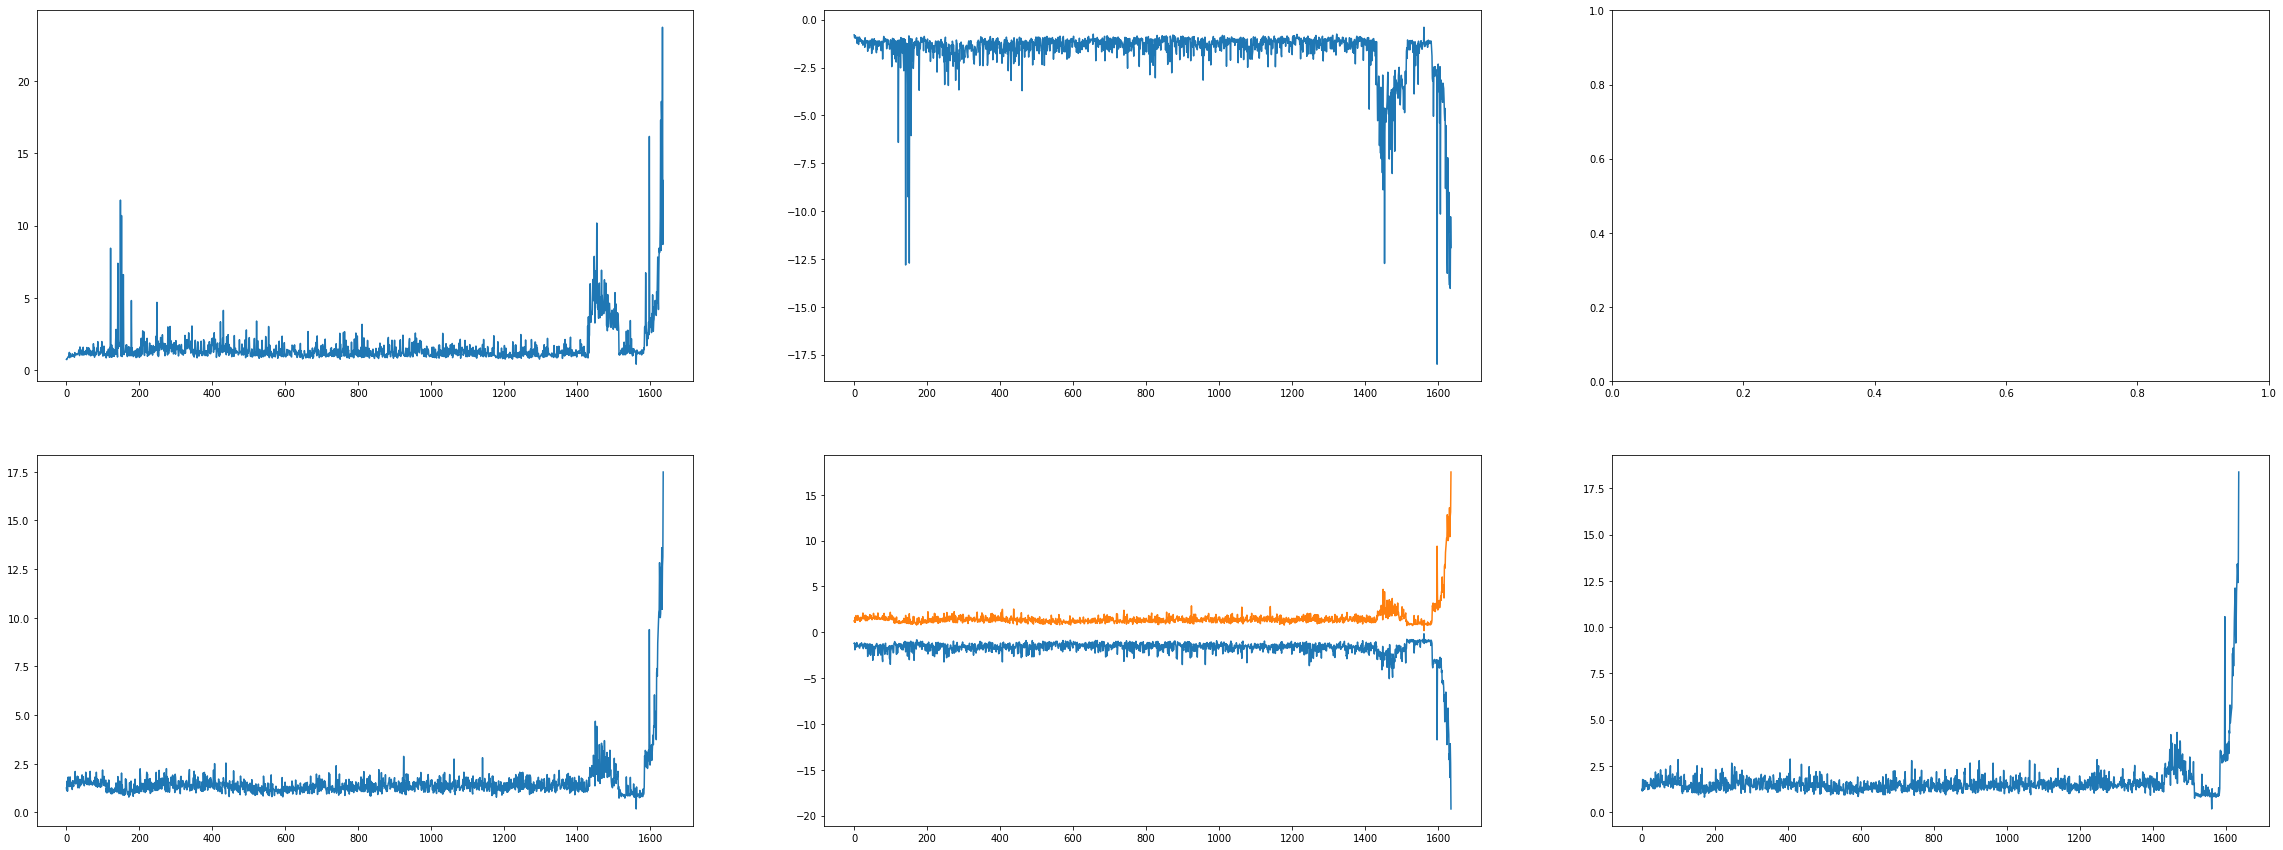

In [14]:
ListfileName=['b12a','b21a', 'b22a','b31a','b32a']
ListfileName=['b32a']
for fileName in ListfileName:
    funPlotAcc(fileName)

In [14]:
fileName='b32a'
df=leerDatosEnCloud(fileName+'.parquet','ffy')


ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:43575)
Traceback (most recent call last):
  File "/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/py4j/java_gateway.py", line 958, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/py4j/java_gateway.py", line 1096, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:43575)

In [90]:
pdfRUL2[pdfRUL2.Y>20]

H   m   s  microseg       X       Y           file         time  \
327126    9   8  15  275270.0  -3.696  25.246  acc_00128.csv  32895.27527   
327129    9   8  15  275390.0  -3.760  31.196  acc_00128.csv  32895.27539   
378770    9  11  35  292620.0  -1.215  20.502  acc_00148.csv  33095.29262   
382685    9  11  55  245550.0  -2.380  24.932  acc_00150.csv  33115.24555   
424176    9  14  35  266290.0 -11.136  26.963  acc_00166.csv  33275.26629   
424179    9  14  35  266410.0   1.252  30.462  acc_00166.csv  33275.26641   
489915    9  18  55  234220.0  -6.811  20.067  acc_00192.csv  33535.23422   
489918    9  18  55  234340.0   0.180  24.630  acc_00192.csv  33535.23434   
491601    9  19   5  200080.0  -2.496  20.425  acc_00193.csv  33545.20008   
515375    9  20  35  228750.0  -8.599  22.713  acc_00202.csv  33635.22875   
515378    9  20  35  228870.0  -2.188  28.014  acc_00202.csv  33635.22887   
518853    9  20  45  264610.0  -8.127  23.007  acc_00203.csv  33645.26461   
518856    9  20  45  264730.0  -0.373  28.746  acc_00203.csv  33645.26473   
569487    9  24   5  242500.0  -0.078  20.254  acc_00223.csv  33845.24250   
584081    9  25   5  212580.0  -1.110  22.326  acc_00229.csv  33905.21258   
588268    9  25  15  276130.0  -1.046  21.552  acc_00230.csv  33915.27613   
592507    9  25  35  241720.0   0.429  21.198  acc_00232.csv  33935.24172   
619011    9  27  15  277030.0 -10.772  23.197  acc_00242.csv  34035.27703   
619014    9  27  15  277150.0  -2.666  34.351  acc_00242.csv  34035.27715   
672223    9  30  45  255620.0  -1.811  24.734  acc_00263.csv  34245.25562   
676997    9  31   5  242110.0  -1.308  23.317  acc_00265.csv  34265.24211   
701238    9  32  35  289020.0   0.173  21.329  acc_00274.csv  34355.28902   
738597    9  35   5  248360.0  -5.824  20.390  acc_00289.csv  34505.24836   
738600    9  35   5  248480.0  -1.955  22.882  acc_00289.csv  34505.24848   
757623    9  36  15  291560.0 -10.407  21.769  acc_00296.csv  34575.29156   
757626    9  36  15  291680.0  -1.203  32.597  acc_00296.csv  34575.29168   
785788    9  38   5  291760.0 -10.384  22.490  acc_00307.csv  34685.29176   
785791    9  38   5  291870.0  -1.635  33.705  acc_00307.csv  34685.29187   
939144    9  48   5  282230.0   0.382  23.451  acc_00367.csv  35285.28223   
957822    9  49  25  211840.0  -1.637  20.160  acc_00375.csv  35365.21184   
...      ..  ..  ..       ...     ...     ...            ...          ...   
1347704  10  14  45  241600.0  -0.692  27.293  acc_00527.csv  36885.24160   
1386877  10  17  15  271800.0  -2.958  23.702  acc_00542.csv  37035.27180   
1406172  10  18  35  225510.0  -2.248  20.888  acc_00550.csv  37115.22551   
1449646  10  21  25  223710.0 -11.163  24.212  acc_00567.csv  37285.22371   
1449649  10  21  25  223830.0  -0.842  32.171  acc_00567.csv  37285.22383   
1466290  10  22  25  273870.0  -3.725  20.724  acc_00573.csv  37345.27387   
1484059  10  23  35  267970.0  -2.796  23.350  acc_00580.csv  37415.26797   
1554479  10  28  15  218750.0  -1.154  25.370  acc_00608.csv  37695.21875   
1585200  10  30  15  218790.0  -2.242  27.490  acc_00620.csv  37815.21879   
1599671  10  31   5  284060.0   0.451  24.643  acc_00625.csv  37865.28406   
1627707  10  32  55  279220.0  -1.858  20.587  acc_00636.csv  37975.27922   
1647405  10  34  15  248670.0  -0.025  24.334  acc_00644.csv  38055.24867   
1664498  10  35  25  216370.0  -2.048  22.800  acc_00651.csv  38125.21637   
1676293  10  36   5  277110.0  -3.718  20.486  acc_00655.csv  38165.27711   
1700224  10  37  45  211910.0  -2.583  24.171  acc_00665.csv  38265.21191   
1738621  10  40  15  211800.0 -10.582  24.002  acc_00680.csv  38415.21180   
1738624  10  40  15  211910.0  -2.711  36.717  acc_00680.csv  38415.21191   
1746103  10  40  45  204060.0  -3.171  22.090  acc_00683.csv  38445.20406   
1760343  10  41  35  260310.0  -8.362  20.570  acc_00688.csv  38495.26031   
1760346  10  41  35  260430.0  -3.864  25.955  acc_00688.csv  38495.26043   
182698

In [25]:
from pyspark.sql import Row
DataFFT=Row('id', 'Afft')
Dato=DataFFT("1",123)

In [27]:
Dato.Afft

123

In [28]:
from pyspark.sql import Row
DataFFT=Row('id', 'Afft')
Dato=DataFFT("1",Afft)
np.ndarray.tolist(Afft)
from  pyspark.ml.param import TypeConverters

In [29]:
VectorAfft=TypeConverters.toVector(Afft)
DataFFT=Row('id', 'features')
Dato=DataFFT(id,VectorAfft)
Dato

Row(id=910, features=DenseVector([49.871, 2.5327, 14.9566, 66.0612, 12.6087, 9.2245, 36.3593, 20.8551, 25.0115, 33.5882, 33.3319, 14.0422, 15.4335, 37.6525, 32.7914, 38.531, 30.1534, 25.5097, 32.3219, 43.178, 18.7509, 9.0227, 44.9825, 117.4044, 22.1154, 59.624, 110.8482, 20.0238, 97.0899, 39.4644, 60.4229, 75.2642, 89.5285, 85.0914, 28.1044, 175.1393, 69.0616, 63.6386, 150.7485, 83.9367, 31.074, 64.6534, 100.9004, 233.4679, 135.0242, 36.1405, 325.4603, 38.7801, 121.7575, 217.2941, 130.1545, 107.9009, 74.2631, 227.462, 27.0151, 244.9821, 218.1657, 108.1506, 286.4332, 133.1475, 119.5861, 194.3921, 136.5193, 170.9968, 362.9345, 95.0304, 362.6043, 266.1829, 166.4678, 339.2507, 55.476, 191.4267, 74.1874, 287.0706, 90.2905, 138.068, 371.2656, 130.3375, 193.8042, 284.0624, 162.3951, 144.0761, 99.7755, 36.2759, 463.7057, 33.8941, 272.8064, 471.2706, 141.6085, 303.2304, 217.3154, 220.4023, 103.7811, 146.4573, 184.074, 60.8108, 286.6089, 182.6791, 97.1788, 230.5394, 178.3926, 125.5486, 102.3063,

In [55]:
df = sc.parallelize([ \
...     Row(name='Alice', age=5, height=80), \
...     Row(name='Alice', age=5, height=80), \
...     Row(name='Alice', age=10, height=80)]).toDF()

df = sc.parallelize([ \
...     Row(name='Alice', age=5, height=80), \
...     Row(name='Alice', age=5, height=80), \
...     Row(name='Alice', age=10, height=80)]).toDF()

In [41]:
Dato

Row(id=910, features=array([49.87101862,  2.53274414, 14.95655623, ..., 35.0012075 ,
       67.48864112, 45.68242448]))

In [71]:
from pyspark.sql.functions import min
RUL2.select(min('id').alias('idmin')).collect()

[Row(idmin=1)]

In [18]:
fileName='b11a2012'
df2=leerDatosEnCloud(fileName+'.parquet','ffy')
df2.show(10)

+---+---+---+--------+--------------------+--------------------+-------------+------------+------------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|        time|             timeX|
+---+---+---+--------+--------------------+--------------------+-------------+------------+------------------+
| 14| 50| 49| 99882.0|              -0.613|               0.153|acc_01868.csv|53449.099882|      18670.034218|
| 14| 50| 49| 99921.0|-0.37799999999999995|               0.256|acc_01868.csv|53449.099921|      18670.034257|
| 14| 50| 49| 99960.0|-0.29600000000000004|-0.02899999999999...|acc_01868.csv| 53449.09996|18670.034295999998|
| 14| 50| 49| 99999.0|               0.142|              -0.057|acc_01868.csv|53449.099999|18670.034334999997|
| 14| 50| 49|100040.0|              -0.741|  0.9640000000000001|acc_01868.csv| 53449.10004|18670.034375999996|
| 14| 50| 49|100080.0|              -0.198|               0.175|acc_01868.csv| 53449.10008|18670.034415999995|
|

In [136]:
RUL2=spark.sql("select *, case when timeX > -1 then "+'"'+fileName+'"'+" else "+'"'+fileName+'"'+" end as bearing from df")

In [138]:
RUL2.show()

+---+---+---+--------+--------------------+--------------------+-------------+-----------+--------------------+------------------+-------+
|  H|  m|  s|microseg|                   X|                   Y|         file|       time|               timeX|               RUL|bearing|
+---+---+---+--------+--------------------+--------------------+-------------+-----------+--------------------+------------------+-------+
|  8| 47|  5|196910.0|                0.05|              -0.253|acc_00001.csv|31625.19691|                 0.0|1270.0783599999995|   b12a|
|  8| 47|  5|196950.0|               0.165|               -0.14|acc_00001.csv|31625.19695|4.000000262749381...| 1270.078319999997|   b12a|
|  8| 47|  5|196990.0|               0.125|               0.542|acc_00001.csv|31625.19699|8.000000161700882E-5| 1270.078279999998|   b12a|
|  8| 47|  5|197030.0|               0.157|              -0.261|acc_00001.csv|31625.19703|1.200000006065238...| 1270.078239999999|   b12a|
|  8| 47|  5|197070.0| 0.42

In [89]:
RUL2.selectExpr("min(id) as id").first().id

1

In [90]:
RUL2.selectExpr("max(id) as id").first().id

2803

In [7]:
fileName='b11a2012'
df2=leerDatosEnCloud(fileName+'.parquet','ffy')


In [9]:
df2.count()

7175680

In [32]:
X=RUL2.filter(RUL2.id==2).select(RUL2.X).collect()


AttributeError: 'list' object has no attribute 'X'

In [35]:
X.X

AttributeError: 'list' object has no attribute 'X'

In [15]:
#test

#df3=FunctionCrearFft(RUL2)



for i in range(1,3):
        print(i, end="\r")
        X=RUL2.filter(RUL2.id==i).rdd.map(lambda row: row.X).collect()
        Xfft=abs(fft(X))
        N=Xfft.shape[0]
        if (N%2==0):
            Xfft=Xfft[0:int(N/2)+1]
        else:
            Xfft=Xfft[0:int((N+1)/2)+1]


NameError: name 'row' is not defined

In [24]:
lista=[1,2,3,4]
A=list(map(lambda x: [x, x**2],lista))
A

[[1, 1], [2, 4], [3, 9], [4, 16]]

In [22]:
A[1][1]

4

In [23]:
A[:][1]

[2, 4]

In [25]:
idini=RUL2.selectExpr("min(id) as id").first()
idmax=RUL2.selectExpr("max(id) as id").first()
print('Rows: '+str(idmax.id))

Dato2=[]
DataFFT=Row('id','features')

Rows: 871


In [ ]:
for i in range(idini.id,idmax.id+1):
    print(i, end="\r")
    X=RUL2.filter(RUL2.id==i).rdd.map(lambda row: row.X).collect()
    Xfft=abs(fft(X))
    N=Xfft.shape[0]
    if (N%2==0):
        Xfft=Xfft[0:int(N/2)+1]
    else:
        Xfft=Xfft[0:int((N+1)/2)+1]

    Y=RUL2.filter(RUL2.id==i).rdd.map(lambda row: row.Y).collect()   
    Yfft=abs(fft(Y))
    N=Yfft.shape[0]
    if (N%2==0):
        Yfft=Yfft[0:int(N/2)+1]
    else:
        Yfft=Yfft[0:int((N+1)/2)+1]

    Afft=np.sqrt(Yfft**2+Xfft**2)


    VectorAfft=TypeConverters.toVector(Afft)


    Dato=DataFFT(i,VectorAfft)

    Dato2.append(Dato)
    #print(Dato2[-1])

df3 = sc.parallelize(Dato2).toDF()
print(df3.count())

In [ ]:
Dato2

In [10]:
RUL2.show()

NameError: name 'RUL2' is not defined

In [ ]:
#test
lista=[1,2,3]
lista[-1]
lista[-2]

In [150]:
#test => DF.append(DF2)
from pyspark.sql import Row
Dato2=[]
DataFFT=Row('id','features')
Dato=DataFFT(1,2)
Dato2.append(Dato)
DataFFT=Row('id','features')
Dato=DataFFT(1,2)
Dato2.append(Dato)
DataFFT=Row('id','features')
Dato=DataFFT(1,2)
Dato2.append(Dato)
Dato2
df3 = sc.parallelize(Dato2).toDF()


In [81]:
Dato2=[Dato,Dato]
Dato2.append(Dato)
Dato2

[Row(id=910), Row(id=910), Row(id=910)]

In [123]:
#Test
ListfileName=['b11a','b12a','b21a','b22a','b31a','32a']
ListfileName=['b12a','b21a','b22a','b31a','32a']
for fileName in ListfileName:
    df2=leerDatosEnCloud(fileName+'.parquet','ndpy')
    escribirDatosEnCloud(df2,fileName,'parquet')
    


b12a.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs
b21a.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs
b22a.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs
b31a.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


In [122]:
ListfileName=['b11a']
for fileName in ListfileName:
    RUL2=ReadAndPrepare(fileName)
    print(fileName+': '+'RUL2')
    df3=FunctionCrearFft(RUL2)
    print(fileName+': '+'FFT')
    escribirDatosEnCloud(df3,fileName+'FFT','parquet') 
    print(fileName+': '+'FFT.parquet')

'b11a'

In [26]:
#Lectura de b11a
#Leer b11a0 (hasta 999)
fileName='b11a0'
df2=leerDatosEnCloud(fileName+'.parquet','ndpy')
#df2.show(10)
dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time
dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
T0=dfo.rdd.map(lambda row: row.time)

time0=T0.first() 
dfo=dfo.withColumn('timeX',dfo.time-time0)

#Guardo los datos en dfoAc 
dfoAc=dfo 



In [27]:
fileName='b11a1'
df2=leerDatosEnCloud(fileName+'.parquet','ndpy')
#df2.show(10)
dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time
dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
T0=dfo.rdd.map(lambda row: row.time)
#time0=T0.first() => time 0 is in b11a0
dfo=dfo.withColumn('timeX',dfo.time-time0)

#Guardo los datos en dfoAc 
dfoAc=dfoAc.unionByName(dfo)

In [34]:
fileName='b11a2'
df2=leerDatosEnCloud(fileName+'.parquet','ndpy')
#df2.show(10)
dfo=df2.orderBy('H','m','s','microseg') #data set ordered by time
dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
T0=dfo.rdd.map(lambda row: row.time)
#time0=T0.first()
dfo=dfo.withColumn('timeX',dfo.time-time0)

#Guardo los datos en dfoAc 
dfoAc=dfoAc.unionByName(dfo)

dfo=dfoAc
dfo.count()

In [39]:
escribirDatosEnCloud(dfoAc,'b11a012','parquet') 
#Written in b11a2012 by mistake

b11a2012.parquet done in os_9c425c08d1e24a7198e26f7b78813582ffy_configs


In [43]:
#No funciona al ser un set de datos muy grandeTimeFail=RUL.first().timeX
    #dfo.createOrReplaceTempView('df')
    # RUL=spark.sql("select timeX, X, Y from df where sqrt(X*X+Y*Y)>20")  
    #TimeFail=RUL.first().timeX
#Alternativa
RUL=dfo.selectExpr("sqrt(X*X+Y*Y)>20 as criteria","timeX", "X", "Y" )
TimeFail=RUL.filter(RUL.criteria==True).first().timeX    
##   
dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)
dforul.createOrReplaceTempView('df')
#No funciona al ser un set de datos muy grandeTimeFail=RUL.first().timeX
#    RUL2=spark.sql("select *, case when RUL> 0 then RUL else 0 end as RUL2 from df")
#    RUL2=spark.sql("select *, case when timeX > -1 then "+'"'+fileName+'"'+" else "+'"'+fileName+'"'+" end as bearing from df")
#Alternativa
RUL2=dforul.selectExpr("*","case when RUL> 0 then RUL else 0 end as RUL2" )
RUL2=RUL2.selectExpr("*","case when timeX > -1 then '"'b11a'"' else '"'b11a'"' end as bearing" )
RUL2=RUL2.withColumn('id',RUL2.file.substr(5,5).cast("integer"))

# A.- Crear archivo RUL2

In [14]:
ListfileName=['b32a']
for fileName in ListfileName:
    RUL2=ReadAndPrepare(fileName,'ffy')
    print(fileName+': '+'RUL2')
    escribirDatosEnCloud(RUL2,fileName+'RUL2','parquet','ffy') 
    print(fileName+': '+'RUL2 saved')

+---+---+---+--------+--------------------+--------------------+-------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|
+---+---+---+--------+--------------------+--------------------+-------------+
| 10| 51|  2| 18164.0| 0.17800000000000002|               -0.06|acc_00819.csv|
| 10| 51|  2| 18203.0|               0.001|                0.25|acc_00819.csv|
| 10| 51|  2| 18242.0|              -0.255|               -0.28|acc_00819.csv|
| 10| 51|  2| 18281.0|              -0.129| 0.08900000000000001|acc_00819.csv|
| 10| 51|  2| 18320.0|-0.09300000000000001|               0.226|acc_00819.csv|
| 10| 51|  2| 18359.0|-0.17800000000000002| 0.33899999999999997|acc_00819.csv|
| 10| 51|  2| 18398.0|               -0.28|               0.344|acc_00819.csv|
| 10| 51|  2| 18437.0|              -0.319|              -0.126|acc_00819.csv|
| 10| 51|  2| 18476.0|-0.20600000000000002|-0.41100000000000003|acc_00819.csv|
| 10| 51|  2| 18515.0|              -0.062|-0.181000

In [ ]:
ListfileName=['b11a2012']
for fileName in ListfileName:
    RUL2=ReadAndPrepare(fileName,'ffy')
    print(fileName+': '+'RUL2')
    escribirDatosEnCloud(RUL2,fileName+'RUL2','parquet','ffy') 
    print(fileName+': '+'RUL2 saved')


##

In [45]:
dfo.count()

7175680

In [170]:
RUL2.count()

2229760

In [112]:
Dato2=FunctionCrearFft(RUL2)

+---+---+---+--------+--------------------+--------------------+-------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|
+---+---+---+--------+--------------------+--------------------+-------------+
|  9| 59| 35|256910.0|               0.315|              -0.377|acc_00436.csv|
|  9| 59| 35|256950.0|                0.09|               0.311|acc_00436.csv|
|  9| 59| 35|256990.0|               0.083|               0.237|acc_00436.csv|
|  9| 59| 35|257030.0|-0.10800000000000001|               -0.14|acc_00436.csv|
|  9| 59| 35|257070.0|               0.256|                0.48|acc_00436.csv|
|  9| 59| 35|257110.0| 0.16899999999999998|               0.047|acc_00436.csv|
|  9| 59| 35|257150.0|               0.278|              -0.523|acc_00436.csv|
|  9| 59| 35|257190.0|-0.14800000000000002|-0.18100000000000002|acc_00436.csv|
|  9| 59| 35|257230.0|              -0.077|               0.024|acc_00436.csv|
|  9| 59| 35|257260.0|              -0.048|         

In [ ]:
fileName='b11a'
df3=FunctionCrearFft(RUL2)
print(fileName+': '+'FFT')
escribirDatosEnCloud(df3,fileName+'FFT','parquet') 
print(fileName+': '+'FFT.parquet')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
100
101
102
103
104
105
106
107
108
109
110
111
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


In [ ]:
ListfileName=['b12a']
for fileName in ListfileName:
    RUL2=ReadAndPrepare(fileName)
    print(fileName+': '+'RUL2')
    df3=FunctionCrearFft(RUL2)
    print(fileName+': '+'FFT')
    escribirDatosEnCloud(df3,fileName+'FFT','parquet') 
    print(fileName+': '+'FFT.parquet')

df3.show()

In [ ]:
#Iteration
ListfileName=['b12a','b21a','b22a','b31a','b32a']
for fileName in ListfileName:
    RUL2=ReadAndPrepare(fileName)
    print(fileName+': '+'RUL2')
    df3=FunctionCrearFft(RUL2)
    print(fileName+': '+'FFT')
    escribirDatosEnCloud(df3,fileName+'FFT','parquet') 
    print(fileName+': '+'FFT.parquet')

In [25]:
#Iteration2
ListfileName=['b12a','b21a','b22a','b31a','b32a']
for fileName in ListfileName:
    RUL2=ReadAndPrepare(fileName)
    print(fileName+': '+'RUL2')
    escribirDatosEnCloud(RUL2,fileName+'RUL2','parquet','ffy') 
    print(fileName+': '+'RUL2 saved')


+---+---+---+--------+--------------------+--------------------+-------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|
+---+---+---+--------+--------------------+--------------------+-------------+
|  9| 59| 35|256910.0|               0.315|              -0.377|acc_00436.csv|
|  9| 59| 35|256950.0|                0.09|               0.311|acc_00436.csv|
|  9| 59| 35|256990.0|               0.083|               0.237|acc_00436.csv|
|  9| 59| 35|257030.0|-0.10800000000000001|               -0.14|acc_00436.csv|
|  9| 59| 35|257070.0|               0.256|                0.48|acc_00436.csv|
|  9| 59| 35|257110.0| 0.16899999999999998|               0.047|acc_00436.csv|
|  9| 59| 35|257150.0|               0.278|              -0.523|acc_00436.csv|
|  9| 59| 35|257190.0|-0.14800000000000002|-0.18100000000000002|acc_00436.csv|
|  9| 59| 35|257230.0|              -0.077|               0.024|acc_00436.csv|
|  9| 59| 35|257260.0|              -0.048|         

AnalysisException: 'Path does not exist: cos://appliedaiwithdeeplearning-donotdelete-pr-frfitpqxjjthic.os_aeb89eda510548c3a6cfb2df38d44579t_configs/b32a.parquet;'

In [12]:
df=leerDatosEnCloud('b32a.parquet','ffy')


In [40]:
from pyspark.ml.feature import VectorAssembler
VectorAssembler(outputCol='features')

VectorAssembler_42478798dde86423953d

In [41]:
vec=VectorAssembler(np.ndarray.tolist(Afft))

TypeError: Method __init__ forces keyword arguments.

In [37]:
DatoSeq=[Dato, Dato]
df3 = spark.createDataFrame(np.ndarray.tolist(Afft))

TypeError: Can not infer schema for type: <class 'float'>

In [ ]:
#kk=RUL2.select(RUL2.H).collect()
X=RUL2.filter(RUL2.id==100).rdd.map(lambda row: row.X).collect()
Xf=abs(fft(X))
plt.plot(Xf)

In [ ]:
#from pyspark.sql.functions import lag
#kk=spark.sql("select * ,lag(RUL,1,0) over (partition by H, m order by time) as prevRUL  from df")                             


#### Selección de máximo por iteración (wip)

In [ ]:
RUL2.createOrReplaceTempView('df')
MaxId=spark.sql("select max(id) as maxid from df")
MaxId=MaxId.first().maxid

In [ ]:
RUL2.createOrReplaceTempView('df')
SQLsentence="select id, timeX, abs(X) as AX, abs(Y) as AY from df where abs(X)> 20 or abs(X)>20 "
#Mini=spark.sql(SQLsentence).first()['timeX']
spark.sql(SQLsentence).first()
Mini=spark.sql(SQLsentence).first()['id']
Mini

In [ ]:
MaxId

In [ ]:
#RUL2tmp.createOrReplaceTempView('df')


for i in range(Mini,MaxId+1): 
    SQLsentence="select timeX, abs(X) as AX, abs(Y) as AY from df where id=="+str(i)
    MaxVal=spark.sql(SQLsentence)
    a=MaxVal.agg({"AX":"max"}).collect()[0]
    a=a['max(AX)']
    b=MaxVal.agg({"AY":"max"}).collect()[0]
    b=b['max(AY)']
    print([a,b,i])



In [ ]:
MaxVal.select("AX").rdd.max()[0]
maxAX=a['max(AX)']

# Zona de pruebas

In [ ]:
df2t.loc[[8,48,7], ['H', 'm','s']]
df2t.iloc[7140:7145]
#df2t.iloc(3)

In [ ]:
unionDF = df2t.unionAll(df2t)
display(unionDF)

In [ ]:
dfo.select(dfo.H>8).show()

In [ ]:
dfo.select(when(dfo.H>8,dfo.H)).show()

#Ejemplo de uso de Spark.DataFrame

In [ ]:
fileName='b12a'
df2=leerDatosEnCloud(fileName+'.parquet')
df2.show(100)

In [ ]:
df2.head(10)

In [ ]:
df2.take(10)

In [ ]:
df2.select('H','m').show()


In [ ]:
df2.orderBy('H','m','s','microseg').show()

In [ ]:
df2.groupby('file').count().show()

In [ ]:
a=df2.take(2565)
a[1000:1026]

In [ ]:
df2.groupBy('H','m','s','microseg').count().orderBy('H','m','s').groupBy('H','m','s').count().count()

In [ ]:
df2.groupBy('H','m','s','microseg').count().orderBy('H','m','s').groupBy('H','m','s').count().show(871)

In [ ]:
dfg=df2.groupBy('H','m','s','microseg')

In [ ]:
dfg.count().count()

In [ ]:
dfg.count().show()

In [ ]:
dfo=df2.orderBy('H','m','s','microseg')

In [94]:
dfo.show()

+---+---+---+--------+--------------------+--------------------+-------------+-----------+--------------------+
|  H|  m|  s|microseg|                   X|                   Y|         file|       time|               timeX|
+---+---+---+--------+--------------------+--------------------+-------------+-----------+--------------------+
|  8| 14| 15|884410.0|              -0.391|0.011000000000000001|acc_00001.csv|29655.88441|                 0.0|
|  8| 14| 15|884450.0|               0.292|               0.133|acc_00001.csv|29655.88445|4.000000262749381...|
|  8| 14| 15|884490.0|               0.596|               0.024|acc_00001.csv|29655.88449|8.000000161700882E-5|
|  8| 14| 15|884530.0|                0.23|               0.272|acc_00001.csv|29655.88453|1.200000006065238...|
|  8| 14| 15|884570.0|              -0.225|               0.272|acc_00001.csv|29655.88457|1.599999995960388...|
|  8| 14| 15|884610.0|              -0.222|              -0.263|acc_00001.csv|29655.88461|2.000000022235

In [ ]:
dfo.groupBy('H','m','s','file').count().orderBy('H','m','s').show()

# Representación

In [ ]:
dfo=dfo.withColumn('time',dfo.H*3600+dfo.m*60+dfo.s+0.000001*dfo.microseg)
dfo.show()

In [ ]:
T0=dfo.rdd.map(lambda row: row.time)
time0=T0.first()
dfo=dfo.withColumn('timeX',dfo.time-time0)
dfo.show()


In [ ]:
dfo.createOrReplaceTempView('df')
#spark.sql("select _c1,count(_c1) as cn from df group by _c1 order by _c1 asc").show(40)
#X=spark.sql("select X, Y from df")
#X.collect() #rows
#T=spark.sql("select H, m, s, microseg from df")
#XT=spark.sql("select H, m, s, microseg,X, Y from df order by H, m, s, microseg asc")

In [ ]:
DataToPlot=spark.sql("select timeX, X, Y from df")

In [ ]:
X=DataToPlot

In [ ]:
dfo.first()

In [ ]:
#DataToPlot=spark.sql("select timeX, X, Y from df")
#DataToPlot=spark.sql("select timeX, X, Y from df where H = 8 and m = 47 and s  >0 AND s < 20")
H1="10"
m1="10"
SQLsentence="select timeX, X, Y from df where H ="+H1+" and m = "+m1+" and s  >0 AND s < 20"
DataToPlot=spark.sql(SQLsentence)

AX=DataToPlot.rdd.map(lambda row: row.X)
AY=DataToPlot.rdd.map(lambda row: row.Y)
XT=DataToPlot.rdd.map(lambda row: row.timeX)

In [ ]:
XT.count()

In [ ]:
def plotGraf(X,Y1,Y2):
    AX=Y1.collect()
    AY=Y2.collect()
    XT=X.collect()
    
    plt.figure(figsize=(20,8))
    plt.style.use("seaborn")
    
    plt.plot(XT, AX, color='b')
    plt.ylabel('Amplitude (X)', fontsize=16)
    plt.xlabel('Time (s)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.figure(figsize=(20,8))
    plt.style.use("seaborn")
    
    plt.plot(XT, AY, color='b')
    plt.ylabel('Amplitude (Y)', fontsize=16)
    plt.xlabel('Time (s)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)



In [ ]:
plotGraf(XT,AX,AY)

In [ ]:
DataToPlot.show()

In [ ]:
RUL=spark.sql("select timeX, X, Y from df where abs(X)>20 or abs(Y) >20 ")

In [ ]:
TimeFail=RUL.first().timeX

In [ ]:
TimeFail

In [ ]:
dforul=dfo.withColumn('RUL', TimeFail-dfo.timeX)

In [ ]:
dforul.show()

In [ ]:
dforul.createOrReplaceTempView('df')



In [ ]:
RUL2=spark.sql("select *, case when RUL> 0 then RUL else 0 end as RUL2 from df")

In [ ]:
RUL2=RUL2.withColumn('id',RUL2.file.substr(5,5).cast("integer"))

In [ ]:
RUL2.show()

In [ ]:
RUL2.filter(RUL2.time>31635.28).show(1000)

In [ ]:
#from pyspark.sql.functions import lag
#kk=spark.sql("select * ,lag(RUL,1,0) over (partition by H, m order by time) as prevRUL  from df")                             
